# About

This notebook is a basic example for looking at individual events, events, creating a solution and submitting it. It walks through some of the library function for accessing the data and writing a submission file. 
This example uses DBScan to solve the tracking problem. 

In [264]:
#import sys
#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install --user git+https://github.com/LAL/trackml-library.gitl-library.git

import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from trackml.dataset import load_event, load_dataset
from trackml.score import score_event

# Change this according to your directory preferred setting
path_to_train = "input/"
# This event is in Train_1
event_prefix = "event000001042"

hits, cells, particles, truth = load_event(os.path.join(path_to_train, event_prefix))
hits.head()

print(type(hits))
subset = hits[['x', 'y', 'z']]
data = [tuple(x) for x in subset.values]
print(len(data))

#I think this was like 50p
#data = [(74.5791, 18.7019, -1498.0), (64.5581, 16.3475, -1298.0), (54.6152, 13.909, -1098.0), (54.7899, 13.9544, -1102.0), (47.6258, 12.1795, -958.0), (47.8209, 12.2584, -962.0), (40.8605, 10.5133, -822.5), (40.6364, 10.4501, -818.0), (40.8193, 10.4947, -822.0), (34.8866, 8.98988, -702.5), (34.6862, 8.97018, -698.0), (34.8622, 9.00137, -702.0), (-147.462, 62.8427, -698.0), (29.9064, 7.7453, -602.5), (29.6804, 7.66555, -598.0), (29.898, 7.75694, -602.0), (-127.871, 49.9292, -598.0), (-128.682, 50.4098, -602.0), (-31.5864, 7.07015, -141.2), (-31.0981, 6.93529, -139.0), (-31.9055, -5.50469, -63.056), (-3.57057, -31.7838, -25.4438), (16.5893, -28.0009, -29.4773), (29.0088, 13.7897, 0.746876), (32.925, 2.58876, -11.5666), (32.6593, 3.34871, 0.128124), (30.0839, 14.2573, 0.803123), (1.47582, 34.3461, -59.9671), (-30.3159, -8.55085, 17.4089), (-19.5865, -25.4608, 16.865), (31.1501, -6.0144, 3.90648), (28.5514, 13.5977, 0.715626), (32.1525, 3.29815, 0.103951), (29.606, 14.0491, 0.771873), (-2.03589, 31.6042, 14.4076), (-2.08934, 32.5751, 14.8907), (7.68493, -31.1432, 135.814), (31.8255, -2.83178, 113.019), (-21.1411, -23.5261, 174.417), (-21.8604, -24.3651, 180.542), (17.5965, -27.1013, 270.624), (-16.4771, -26.9592, 289.262), (-69.3461, 19.6434, -313.023), (-70.0024, -12.808, -137.19), (5.97047, 71.36, -123.526), (-7.51706, -71.9203, -56.0689), (37.3427, -61.3198, -63.551), (72.152, 6.05238, -23.9389), (-69.834, -18.2994, 41.3285), (-44.5631, -56.0451, 39.1781), (69.716, -14.0517, 10.1656), (71.7163, -14.4825, 10.4887), (71.4738, 6.74731, 1.67188), (65.2158, 28.2501, 3.07812), (66.906, 28.8557, 3.19062), (-5.308, 71.8232, 34.1962), (71.6982, -2.209, 255.62), (16.6993, -70.5766, 308.678), (-113.438, -22.1132, -222.173), (14.8566, 114.597, -198.455), (15.3452, 116.702, -201.97), (-11.1975, -115.874, -89.5369), (61.2978, -97.9029, -101.341), (115.369, 10.3137, -37.5852), (-111.846, -26.8988, 66.4089), (-113.899, -27.2742, 67.6278), (-73.9016, -89.6604, 64.318), (113.723, -24.042, 17.3314), (114.955, 9.86314, 3.35938), (107.074, 41.693, 5.66563), (108.899, 42.2025, 5.77813), (-9.66327, 114.996, 55.4422), (116.718, 3.67305, 418.795), (25.3324, -112.367, 490.441), (32.5092, 169.916, -297.225), (93.5895, -144.287, -150.24), (-14.801, -171.251, -131.698), (172.103, 16.6093, -55.5266), (168.085, -37.51, 26.2531), (170.565, 12.6533, 5.53385), (172.625, 12.7341, 5.60938), (162.293, 53.7447, 8.92812), (164.338, 54.0822, 9.04751), (-168.287, -35.8105, 99.624), (-112.526, -130.055, 95.7036), (-16.551, 171.088, 83.1214), (-36.2281, -54.1584, 598.0), (-36.5159, -54.4689, 602.0), (29.9758, -137.168, 598.0), (38.632, -59.836, 598.0), (164.574, 16.7005, 598.0), (-33.9642, 1.51487, 702.5), (-43.2576, -62.3888, 698.0), (-43.5496, -62.6932, 702.0), (34.076, -160.279, 698.0), (45.0206, -69.8784, 698.0), (-33.9371, 1.48858, 702.0), (-33.7288, 1.47588, 697.5), (-39.7507, 1.91209, 822.5), (-51.9625, -72.042, 818.0), (-52.2723, -72.3462, 822.0), (52.6864, -81.9094, 818.0), (-39.7378, 1.90422, 822.0), (-39.5086, 1.88061, 817.5), (-46.5023, 2.38382, 962.5), (-62.8269, -83.2079, 962.0), (61.8011, -96.4148, 962.0), (61.5499, -96.0007, 958.0), (-46.2499, 2.361, 957.5), (-53.2578, 2.9054, 1102.5), (-73.397, -93.2803, 1098.0), (-73.7204, -93.5954, 1102.0), (70.6713, -110.49, 1102.0), (70.4151, -110.092, 1098.0), (-53.027, 2.89437, 1097.5), (-89.3871, -107.527, 1298.0), (82.9998, -130.233, 1298.0), (-62.7204, 3.75757, 1297.5), (-106.085, -120.827, 1498.0), (-72.466, 4.67503, 1497.5), (-339.543, 526.156, -2948.5), (-328.019, 438.452, -2551.5), (-328.416, 437.912, -2545.5), (-315.014, 349.62, -2154.5), (-293.961, 269.244, -1801.5), (-267.869, 203.859, -1498.5), (-595.363, -203.088, -1215.5), (423.613, 499.792, -1218.5), (-232.783, 147.607, -1215.5), (-251.487, -58.841, -496.4), (71.3897, 250.076, -449.0), (-18.2218, -261.228, -200.2), (149.661, -217.461, -229.8), (258.238, 27.7524, -83.2), (254.038, -61.6298, 40.2), (260.243, 14.223, 9.0), (254.24, 61.4543, 13.8), (-259.4, -43.9909, 152.8), (-252.79, -43.6568, 149.2), (-175.053, -188.289, 143.8), (-30.3857, 258.426, 126.4), (-262.385, -44.1464, 154.4), (251.266, 61.4182, 945.8), (-345.633, -90.5301, -687.4), (134.975, 336.012, -633.0), (-18.6429, -358.241, -273.6), (211.855, -290.159, -313.2), (360.138, 43.4876, -115.6), (353.758, 42.3838, -113.2), (360.141, 11.8765, 12.6), (356.521, 53.5245, 18.6), (347.765, -92.1119, 56.8), (-363.175, -44.0939, 212.6), (-356.689, -44.3527, 208.2), (-259.997, -255.487, 204.2), (-255.332, -252.097, 201.4), (-50.525, 356.576, 175.4), (-477.982, -144.993, -963.2), (252.783, 433.151, -897.12), (247.391, 429.853, -886.2), (-12.8838, -499.553, -381.4), (314.379, -393.855, -439.0), (498.102, 69.2952, -159.8), (505.074, 0.476575, 18.6), (500.069, 10.8995, 28.2), (498.996, 1.15838, 17.4), (477.466, -141.625, 78.4), (-88.0956, 494.921, 245.0), (-499.166, -29.7837, 291.0), (-377.146, -330.46, 283.2), (-372.027, -327.627, 279.6), (434.783, -496.117, -575.4), (2.75194, -658.916, -502.8), (653.66, 104.398, -211.4), (656.895, -91.1926, 39.0), (660.821, -22.368, 23.4), (625.805, -209.947, 104.8), (-141.956, 646.558, 324.0), (-139.605, 640.643, 320.4), (-526.492, -401.218, 376.6), (-663.001, 10.4455, 388.0), (50.9648, -280.983, 1218.5), (50.7753, -279.628, 1215.5), (308.433, 109.917, 1215.5), (57.1368, -345.503, 1498.5), (360.011, 171.404, 1501.5), (360.357, 172.015, 1504.5), (61.9471, -415.697, 1801.5), (402.767, 244.127, 1804.5), (65.5342, -496.031, 2151.5), (135.713, -215.951, 2148.5), (438.221, 328.346, 2151.5), (437.357, 327.194, 2148.5), (-201.609, -178.88, 2548.5), (68.3465, -586.732, 2548.5), (160.423, -256.432, 2548.5), (469.558, 417.093, 2548.5), (-239.598, -197.623, 2945.5), (70.7678, -676.223, 2945.5), (70.7017, -676.266, 2948.5), (185.066, -296.957, 2948.5), (-846.07, -365.572, -1802.5), (737.893, 479.623, -1797.5), (738.652, 477.646, -1802.5), (-724.827, -278.868, -1497.5), (580.698, 514.765, -1494.5), (568.955, -589.855, -715.6), (28.9588, -822.146, -630.6), (804.935, 144.934, -260.4), (783.154, -257.786, 48.6), (779.439, -250.895, 48.6), (820.538, -57.7025, 27.0), (764.758, -285.949, 130.0), (781.457, -254.667, 54.4), (777.682, -247.652, 54.4), (-209.383, 797.291, 406.6), (-681.034, -450.247, 466.4), (-814.027, 72.603, 477.2), (753.581, -690.784, -900.0), (747.175, -687.798, -889.2), (74.4463, -1020.52, -786.2), (1000.24, 207.585, -325.2), (1013.01, -117.136, 37.8), (849.482, -565.409, 76.0), (850.036, -555.619, 76.0), (938.461, -399.67, 168.2), (-305.428, 970.799, 498.8), (-903.241, -482.321, 601.8), (-1001.89, 194.612, 612.6)]
#I think this was like 100 particles
#data = [(-166.959, -26.3441, -1498.0), (-82.4397, -37.7466, -1502.0), (11.3996, -149.674, -1498.0), (91.4427, -67.9066, -1502.0), (91.1692, -67.7554, -1498.0), (76.4656, 67.0503, -1502.5), (35.9852, 70.158, -1502.0), (35.8718, 69.9435, -1497.5), (-68.483, 68.2885, -1502.0), (-116.759, 116.511, -1498.0), (-68.2695, 68.0722, -1497.5), (-144.424, -23.4025, -1298.0), (-71.3431, -32.9338, -1302.0), (8.15945, -129.552, -1298.0), (33.391, -149.068, -1298.0), (78.5365, -58.9559, -1297.5), (65.9847, 58.3618, -1302.5), (31.3025, 60.6983, -1302.0), (31.1997, 60.4933, -1297.5), (-68.26, 145.743, -1298.0), (-59.7038, 58.7023, -1302.0), (-102.775, 99.0096, -1298.0), (-59.4812, 58.5278, -1297.5), (-121.895, -20.2598, -1098.0), (-122.341, -20.3248, -1102.0), (-60.2847, -28.0285, -1102.0), (-60.0164, -27.8939, -1097.5), (5.33512, -109.442, -1098.0), (26.0811, -126.505, -1098.0), (66.0135, -50.1671, -1097.5), (66.3347, -50.3551, -1102.5), (55.6115, 49.6337, -1102.5), (26.5606, 51.3335, -1102.0), (26.4398, 51.0924, -1097.5), (-60.0013, 122.212, -1098.0), (-60.169, 122.666, -1102.0), (-50.842, 49.3274, -1102.0), (-88.3853, 81.986, -1098.0), (-50.6346, 49.131, -1097.5), (-88.684, 82.3186, -1102.0), (-106.164, -17.9645, -958.0), (-52.5332, -24.5471, -962.0), (-52.268, -24.4358, -957.5), (3.74647, -95.7176, -962.0), (21.5203, -111.026, -962.0), (21.4063, -110.56, -958.0), (57.3443, -43.8807, -957.5), (57.6683, -44.106, -962.5), (48.3528, 43.4342, -962.5), (23.2221, 44.7371, -962.0), (23.1288, 44.536, -957.5), (-43.7826, 155.687, -958.0), (-44.0339, 156.317, -962.0), (-53.6671, 105.885, -958.0), (-53.8725, 106.327, -962.0), (-44.5788, 42.841, -962.0), (-77.9339, 70.4739, -958.0), (-44.3466, 42.6427, -957.5), (-78.2554, 70.7992, -962.0), (-90.4852, -15.5788, -818.0), (-44.8008, -21.0195, -822.0), (-44.5526, -20.9393, -817.5), (-99.9299, -124.372, -818.0), (2.33615, -81.6214, -822.0), (17.1339, -94.3926, -817.5), (48.7089, -37.588, -817.5), (49.0048, -37.8002, -822.5), (41.144, 37.2116, -822.5), (40.9189, 37.016, -818.0), (19.8835, 38.1407, -822.0), (19.7545, 37.9578, -817.5), (-35.3841, 133.519, -818.0), (-46.9166, 89.7234, -818.0), (-38.2258, 36.4034, -822.0), (-67.1024, 59.1849, -817.5), (-38.0112, 36.2025, -817.5), (-77.5619, -13.5522, -702.5), (-77.0467, -13.4838, -698.0), (-38.1926, -18.0117, -702.0), (-37.9538, -17.8924, -697.5), (-87.5812, -104.1, -698.0), (1.37908, -69.162, -698.0), (13.9942, -81.0088, -702.0), (1.38728, -69.565, -702.0), (13.8958, -80.4765, -697.5), (41.3726, -32.1465, -697.5), (41.6759, -32.3708, -702.5), (35.0465, 31.8722, -702.5), (34.8204, 31.6463, -698.0), (16.8655, 32.3345, -698.0), (16.9754, 32.5339, -702.0), (16.8794, 32.3233, -697.5), (-28.7063, 114.299, -698.0), (-40.7766, 76.0695, -698.0), (-32.7039, 30.9389, -702.0), (-32.5095, 30.6918, -697.5), (-57.6205, 49.7715, -697.5), (-66.3798, -11.7479, -602.5), (-65.8626, -11.6728, -598.0), (-32.4541, -15.3761, -598.0), (-32.6757, -15.456, -602.0), (-32.4521, -15.342, -597.5), (-77.1019, -88.303, -602.0), (-76.6537, -87.6537, -598.0), (0.766391, -59.1268, -598.0), (0.797166, -59.5178, -602.0), (11.403, -69.3715, -602.0), (11.2578, -68.846, -597.5), (35.2902, -27.6092, -597.5), (35.5871, -27.8185, -602.5), (29.9391, 27.3786, -602.5), (14.4536, 27.6629, -598.0), (29.7143, 27.1306, -598.0), (14.5538, 27.8166, -602.0), (14.4425, 27.6159, -597.5), (-23.3735, 98.1072, -597.5), (-35.6752, 65.2879, -602.5), (-35.4422, 64.7742, -598.0), (-28.1226, 26.3448, -602.0), (-27.9051, 26.1675, -597.5), (-49.6169, 42.0152, -597.5), (-31.794, -5.8235, -292.603), (4.41876, -32.2852, -282.185), (-25.4906, 20.6652, -305.032), (-28.9639, -12.4178, -248.428), (-30.4706, -13.0811, -261.077), (4.33607, -31.7896, -277.931), (-8.91165, 30.1898, -237.512), (-16.2306, 27.6575, -264.09), (-22.8202, -22.3894, -168.65), (-24.1468, -23.8129, -178.49), (-5.96162, 31.7457, -196.076), (-5.12579, -31.2002, -69.6604), (7.84926, -30.5612, -73.4409), (24.2054, 20.0954, -85.9693), (27.9975, 15.8499, -90.0559), (-6.94758, 30.8765, -70.3872), (-8.22157, 30.4311, -85.5375), (-20.7565, -25.4467, -19.5857), (-5.21941, -31.6908, -70.6474), (28.2025, -15.0375, -1.62668), (22.9558, 22.2377, -17.2726), (25.7592, 19.0991, -36.8688), (24.416, 23.6832, -17.9468), (5.87785, 31.6537, -30.7121), (9.73474, 31.4361, -27.0609), (2.22037, 31.86, -33.6163), (-11.8875, 29.6738, -9.62351), (-13.5065, 29.1078, -11.0412), (-14.0466, 30.2721, -11.2117), (-12.6304, 31.5371, -9.81203), (-14.2945, 30.0506, -11.0473), (-26.8834, 17.7751, -41.6324), (-31.815, -4.26327, 60.1404), (-31.158, -6.14246, 33.0841), (-22.8945, -21.5631, 61.6473), (-24.4913, -23.0973, 66.464), (-6.39002, -31.1289, 21.0906), (7.20784, -30.7855, 18.2732), (18.7886, -25.3726, 21.0248), (24.8326, -20.8902, 32.0517), (31.2413, -4.39695, 69.5109), (31.5957, 1.88612, 9.7755), (32.4637, 2.40799, 67.8109), (29.889, 9.77194, 51.7491), (32.6387, 1.9075, 10.3262), (23.3061, 21.1022, 17.3915), (26.459, 17.5724, 44.4273), (0.592614, 31.4559, 13.7547), (0.603425, 33.5166, 15.1044), (-8.34827, 30.3868, 46.228), (-22.2582, 22.2736, 45.8321), (-23.5461, 23.56, 48.8637), (-25.159, 20.2129, 25.8742), (-25.1341, 20.2645, 34.5297), (-26.868, 16.6664, 4.27377), (-28.4018, 13.4835, 35.969), (-31.2541, 4.16959, 69.4921), (-30.6704, 14.5183, 39.3), (-18.3643, -26.5994, 135.979), (-10.4696, -31.3947, 78.3911), (25.4306, -20.7898, 83.7112), (31.7329, -4.47379, 70.7185), (24.6587, 20.3311, 76.7729), (-31.7859, 3.53352, 84.8457), (-31.54, 7.89295, 99.0554), (-31.7463, 4.23487, 70.7051), (-28.5184, -13.6921, 169.266), (-31.4154, -5.40631, 148.572), (-28.7996, -12.8877, 166.13), (-29.6405, -10.4826, 148.268), (-28.9639, -12.4178, 175.088), (-29.512, -14.1543, 175.365), (-28.3887, -15.4119, 173.925), (-27.752, -16.1248, 206.7), (-30.4934, -13.0556, 184.644), (-30.13, -13.4625, 174.061), (-9.38942, -30.9597, 174.944), (19.0142, -25.1712, 144.742), (24.9909, -20.5618, 167.787), (-19.6106, 24.6384, 158.1), (-28.1878, -16.3801, 210.064), (-27.9998, -16.5906, 216.078), (-15.1791, 69.9362, -425.885), (-15.6317, 71.6179, -436.08), (-49.9767, -52.7467, -374.894), (-13.5886, -70.2892, -148.823), (-14.0594, -72.1941, -152.698), (19.931, -69.6226, -160.015), (61.6598, 36.8772, -192.78), (54.7425, 46.8534, -187.994), (-15.0074, 69.9779, -150.668), (-20.7679, 69.2342, -188.033), (-15.3516, 71.7479, -154.306), (55.3484, 45.6236, -73.7273), (-58.5021, 40.5306, -83.8266), (-45.5202, -56.0417, -34.9184), (50.8187, 50.462, -30.2346), (52.2502, 51.9412, -30.9118), (13.2881, 70.336, -59.9614), (20.4692, 69.2174, -51.2095), (13.6468, 72.1768, -61.3532), (5.26669, 71.8261, -67.2415), (-26.6872, 66.487, -13.1469), (-30.7777, 66.1152, -16.4536), (-27.5017, 68.5082, -13.3337), (-31.1732, 65.8264, -16.0887), (-14.2391, -69.6868, 55.6486), (-14.6478, -71.7232, 57.4688), (16.1032, -70.8533, 50.8325), (43.2763, -57.9008, 56.9051), (43.8406, -57.2871, 65.7024), (63.196, -34.0463, 4.81239), (72.4455, 2.7451, 31.1509), (55.1401, 45.8151, 48.3998), (0.195628, 71.1184, 39.7558), (0.147464, 73.1477, 41.0813), (-55.4922, 45.4706, 65.854), (-62.4998, 35.9484, 18.4025), (-70.3065, -18.4574, 84.7313), (44.1305, -57.7033, 74.5387), (55.3468, -46.6608, 79.882), (68.7539, 21.8027, 127.646), (59.3035, 40.103, 108.638), (60.8849, 41.2045, 111.746), (-18.8796, 70.1105, 115.334), (-51.111, 50.1131, 112.852), (-52.4685, 51.3847, 115.968), (-56.0637, 45.4841, 85.5664), (-65.0195, 30.5049, 90.8531), (-72.1573, -3.93205, 144.706), (-51.3167, -49.3314, 148.228), (-19.4946, -68.8682, 178.37), (56.1747, -44.3504, 190.236), (71.5602, -10.7538, 168.223), (72.1315, 4.03822, 158.968), (56.4961, 44.5681, 181.582), (-71.4486, 8.08594, 199.17), (-71.5219, 9.83822, 167.81), (-69.3606, 19.55, 228.032), (-70.3398, -11.4182, 340.781), (-67.506, -23.3154, 345.331), (-38.9907, -59.4403, 307.199), (-39.947, -61.0362, 315.392), (42.156, -59.1189, 342.033), (68.3159, 21.5704, 324.463), (-66.7485, -29.9108, 393.994), (-65.7037, -31.3411, 398.341), (-63.1633, -34.8189, 396.792), (-21.9972, -68.9794, 399.872), (57.7354, -42.7405, 381.476), (-46.5867, 55.0326, 370.083), (-61.6399, -36.0651, 468.193), (-61.2064, -36.6586, 481.652), (98.0137, 61.9456, -306.877), (86.5435, 76.4733, -297.206), (87.9765, 77.8525, -302.215), (-36.8072, 109.934, -297.959), (-25.871, -113.647, -237.928), (35.079, -110.205, -252.129), (-23.0255, 113.135, -239.017), (85.7326, 78.9223, -115.878), (31.307, 111.021, -77.8878), (21.9262, 113.81, -92.8441), (8.96635, 115.697, -104.192), (-93.2168, 67.7554, -131.781), (-73.2386, -90.616, -52.1845), (81.3131, 82.8699, -44.8462), (-49.4251, 104.926, -21.5936), (-43.6789, 108.552, -17.1668), (-49.1008, 105.131, -22.1469), (101.122, -55.047, 11.8044), (116.627, 1.63171, 54.4022), (-1.66896, 116.62, 69.693), (-101.583, 53.9677, 33.6188), (-103.445, 54.7536, 34.3324), (-109.867, -36.9489, 139.152), (-23.1552, -114.255, 95.5577), (24.9165, -113.027, 85.0203), (70.2191, -93.0422, 95.8863), (70.5072, -92.7428, 123.702), (70.9421, -92.2909, 110.226), (89.3155, -75.4862, 133.246), (93.0363, 70.2247, 83.1562), (-1.69986, 117.118, 70.0155), (-89.5736, 75.0402, 111.63), (110.723, 33.9843, 209.063), (94.6661, 65.27, 178.504), (96.2657, 66.4298, 181.686), (-29.7306, 112.736, 189.23), (-83.4222, 79.7564, 186.187), (-89.9283, 73.4386, 141.71), (-105.217, 48.6601, 150.825), (-83.0277, -81.5788, 246.519), (114.456, -18.2945, 273.511), (116.58, 4.35162, 261.008), (111.208, 34.116, 210.008), (-114.539, 16.2738, 272.95), (-115.754, 3.46212, 237.222), (-25.9003, -113.646, 295.92), (92.1008, -69.6842, 311.198), (92.8076, 69.7577, 297.533), (-114.173, 13.1463, 322.361), (-116.048, 13.3711, 327.77), (-110.882, 35.222, 372.595), (142.808, 96.71, -453.645), (126.856, 117.258, -441.611), (-60.2641, 160.537, -438.118), (-61.1578, 162.302, -443.103), (58.0488, -161.087, -371.063), (-32.0189, 168.138, -350.936), (-45.2645, -166.832, -349.316), (117.861, 124.319, -167.343), (118.818, 125.888, -169.048), (14.2292, 171.713, -151.461), (-135.736, 105.125, -193.391), (-106.932, -133.166, -73.3535), (-108.065, -134.606, -74.0675), (43.9618, 166.468, -112.966), (33.0724, 167.578, -133.606), (33.4568, 169.401, -134.985), (118.118, 124.117, -62.9694), (119.344, 125.539, -63.5855), (-72.8304, 155.261, -29.4824), (-64.6626, 160.188, -22.0906), (-72.6773, 155.353, -28.6927), (-73.5277, 157.208, -28.9531), (-73.6944, 157.088, -29.7434), (149.979, -82.8044, 20.8912), (-154.981, 74.2248, 54.0418), (35.4865, -167.58, 129.218), (35.8249, -169.411, 130.705), (171.727, -3.10069, 83.4281), (143.591, 95.8592, 127.62), (-5.88372, 171.421, 105.953), (-6.07716, 173.436, 107.287), (-157.869, -69.5317, 209.982), (-33.5966, -167.525, 143.222), (-33.9602, -169.391, 144.887), (104.141, -136.343, 144.297), (103.436, -137.047, 185.635), (104.835, -135.65, 165.575), (131.361, -111.391, 199.458), (-130.673, 112.526, 168.095), (-158.248, -69.8562, 210.591), (140.495, 99.2216, 270.25), (-126.067, 116.773, 280.604), (-133.06, 109.543, 213.636), (-156.49, 71.0572, 226.956), (164.699, 48.3854, 313.306), (-42.6501, 166.138, 281.553), (-125.688, 116.452, 279.773), (-120.755, -122.048, 366.824), (169.102, -29.043, 408.192), (172.924, 2.46867, 390.228), (-171.081, 25.2928, 411.429), (-171.053, 23.8188, 358.401), (-27.7075, -169.523, 440.294), (140.131, -99.9943, 467.089), (139.838, 99.2043, 443.008), (-170.486, 20.0646, 484.76), (-122.586, -18.3873, 598.0), (-116.378, -38.9269, 598.0), (-101.319, -45.5839, 602.0), (-98.8086, -46.935, 602.0), (-75.6377, -45.5006, 597.5), (-78.3596, -45.9957, 597.5), (-98.16, -46.6335, 598.0), (-94.3129, -52.7895, 598.0), (-69.9686, -117.265, 598.0), (-33.8591, -102.202, 598.0), (69.5278, -104.727, 598.0), (92.7809, -61.6398, 598.0), (123.344, 43.371, 598.0), (-78.189, 86.1371, 602.0), (-77.6124, 85.638, 598.0), (-142.958, -20.7516, 698.0), (-135.789, -44.8001, 698.0), (-117.931, -53.1376, 702.0), (-115.088, -54.5605, 702.0), (-109.681, -61.922, 698.0), (-114.432, -54.2663, 698.0), (-91.331, -53.7613, 698.0), (-91.837, -54.0916, 702.0), (-79.5986, -137.615, 698.0), (-40.0905, -118.906, 698.0), (79.3027, -123.067, 698.0), (109.394, -69.3305, 698.0), (110.061, -69.6312, 702.0), (143.171, 52.1258, 698.0), (-92.3803, 98.8225, 702.0), (-91.7987, 98.3333, 698.0), (-167.428, -23.3299, 818.0), (-159.142, -51.6778, 818.0), (-134.634, -63.6826, 822.0), (-106.781, -63.1112, 818.0), (-128.06, -72.9599, 818.0), (-102.97, -62.5337, 818.0), (-107.303, -63.4133, 822.0), (-103.461, -62.8422, 822.0), (-47.8246, -138.834, 818.0), (90.7585, -146.143, 822.0), (90.409, -145.385, 818.0), (130.704, -77.9812, 822.0), (-109.375, 112.946, 818.0), (-157.475, -74.26, 962.0), (-120.245, -73.4148, 958.0), (-124.793, -74.0595, 958.0), (-149.379, -86.0367, 958.0), (-120.722, -73.7567, 962.0), (-57.199, -161.927, 958.0), (-142.774, -85.0478, 1098.0), (-137.463, -84.4362, 1098.0), (-137.97, -84.7238, 1102.0), (-331.637, -43.7732, -2945.5), (-176.561, -534.851, -2945.5), (-176.405, -535.179, -2948.5), (46.6967, -294.772, -2948.5), (118.285, -329.197, -2948.5), (-118.538, 349.537, -2945.5), (-208.778, 435.884, -2951.5), (-208.936, 435.927, -2954.5), (-210.912, 254.591, -2948.5), (-286.091, -39.4789, -2545.5), (-176.684, -456.971, -2554.5), (35.6828, -254.982, -2548.5), (94.542, -285.481, -2548.5), (-106.903, 298.86, -2545.5), (-174.16, 383.981, -2551.5), (-185.181, 215.089, -2548.5), (-240.6, -34.8695, -2145.5), (-173.934, -377.58, -2154.5), (72.4989, -242.415, -2145.5), (72.562, -242.401, -2148.5), (-137.697, 331.071, -2145.5), (-96.1306, 249.147, -2145.5), (-165.638, -306.907, -1795.5), (439.13, 519.653, -1798.5), (-106.943, 282.245, -1795.5), (-441.138, 521.116, -1795.5), (-152.613, -249.361, -1498.5), (434.2, -520.557, -1495.5), (391.511, 410.914, -1495.5), (366.975, 461.503, -1498.5), (-81.9996, 237.689, -1495.5), (-339.904, 465.827, -1498.5), (-338.79, 465.025, -1495.5), (-322.249, -500.185, -1215.5), (320.841, -456.743, -1218.5), (339.404, 319.242, -1224.5), (314.009, 365.003, -1221.5), (-52.0028, 597.898, -1215.5), (-253.291, 401.816, -1224.5), (-252.279, 400.968, -1221.5), (205.397, 153.697, -673.0), (186.306, 184.36, -667.6), (103.912, -240.644, -566.6), (184.387, 182.045, -660.0), (-106.857, 239.915, -669.3), (-84.2322, -247.683, -525.6), (-81.5116, -242.765, -514.8), (102.169, -238.019, -560.4), (-43.6451, 259.376, -535.2), (-42.9262, 252.853, -522.0), (-196.754, 167.719, -288.6), (159.164, 211.158, -255.8), (60.1103, 254.655, -168.2), (52.8831, 257.588, -201.8), (23.7022, 259.953, -225.8), (172.983, 190.677, -91.6), (229.052, -129.404, 35.4), (-110.565, 238.997, -40.2), (-112.661, 238.478, -41.4), (-98.2176, 242.054, -29.4), (258.403, -17.2722, 130.0), (-240.171, 96.6888, 85.6), (-50.9187, -258.386, 224.6), (50.4282, -255.186, 200.2), (159.72, -205.141, 222.2), (159.856, -205.056, 254.6), (228.006, 124.704, 197.0), (-17.0425, 260.445, 165.4), (-193.835, 174.172, 258.2), (-220.429, -135.016, 321.36), (153.357, -205.608, 280.8), (-198.89, 165.868, 324.8), (-235.771, 103.985, 343.8), (214.191, 157.399, 421.4), (209.158, 153.268, 410.8), (-195.77, 172.496, 430.0), (250.666, 68.4058, 478.4), (-249.043, 81.9773, 556.1), (-244.501, 77.2371, 542.6), (258.822, -49.8439, 631.2), (264.013, -6.24812, 600.0), (-262.343, 41.1713, 636.0), (-256.147, 40.0653, 620.4), (-16.0644, -258.684, 675.4), (215.661, -140.704, 702.1), (218.162, 140.381, 675.4), (-255.204, 31.025, 729.4), (-239.3, 103.877, 844.2), (273.804, 228.963, -936.4), (244.967, 259.967, -907.6), (-165.921, 316.544, -913.2), (164.99, -320.052, -779.3), (-138.554, -330.39, -719.8), (162.92, -317.656, -772.6), (-51.4223, 353.593, -724.6), (-260.355, 248.496, -400.2), (180.29, 308.487, -349.2), (74.4021, 348.706, -271.8), (35.3615, 354.746, -306.0), (72.1313, 352.577, -229.4), (233.947, 273.277, -124.4), (-155.451, 326.69, -54.4), (-149.898, 328.065, -53.2), (-152.868, 321.381, -54.4), (312.16, -180.377, 51.6), (-151.085, 330.827, -53.4), (-136.486, 334.442, -39.0), (309.632, -178.799, 50.8), (-340.119, 108.76, 121.0), (361.578, -44.816, 187.4), (356.169, -43.0471, 183.8), (-36.4876, 362.459, 234.2), (-67.8677, -350.859, 307.2), (64.1402, -353.36, 279.0), (223.641, -284.215, 356.4), (225.499, -283.278, 312.0), (221.554, -278.65, 306.6), (219.97, -279.687, 350.8), (330.939, 138.289, 278.4), (-260.172, 244.797, 356.4), (-269.97, -240.242, 462.657), (225.592, -286.553, 359.8), (214.699, -292.047, 400.0), (-262.132, 247.025, 359.8), (-277.014, 234.705, 457.6), (-329.37, 140.243, 480.4), (349.067, 87.1567, 666.0), (288.853, 221.032, 579.4), (-279.879, 232.333, 603.0), (351.589, -75.1326, 863.6), (360.401, -22.8048, 824.6), (-309.738, 183.531, 798.543), (-356.796, 59.3284, 868.4), (21.0987, -358.03, 954.72), (307.91, -181.04, 979.6), (311.865, 178.548, 940.0), (310.812, -182.132, 988.2), (-361.328, 45.5758, 1036.0), (-240.676, -438.463, -1014.1), (-55.1281, 500.901, -1020.4), (164.512, 469.448, -502.4), (-332.958, 371.583, -555.2), (111.135, 490.596, -380.2), (55.8431, 496.238, -425.8), (78.9275, 492.378, -315.6), (309.711, 392.328, -170.2), (-204.855, 456.166, -71.2), (-189.208, 460.208, -50.8), (-217.752, 452.835, -73.6), (-214.967, 447.181, -72.4), (-190.345, 462.978, -51.0), (427.228, -254.87, 73.6), (-491.693, 99.4173, 174.44), (489.228, -97.5253, 261.0), (-72.0554, 492.132, 322.8), (-92.3178, -491.188, 431.8), (78.6162, -495.026, 392.8), (320.482, -390.565, 438.2), (316.284, -385.923, 433.0), (490.417, 118.738, 404.2), (484.214, 120.582, 398.8), (290.888, -403.149, 551.0), (312.295, -391.608, 496.4), (-350.046, 352.608, 500.0), (-377.859, 326.779, 631.8), (-268.678, -419.381, 683.527), (-460.645, 186.477, 669.2), (389.601, 315.252, 801.2), (-400.547, 306.225, 839.4), (488.08, 106.434, 928.2), (48.1217, 655.622, -710.3), (-393.641, 530.838, -740.5), (154.188, 641.302, -497.0), (82.8768, 652.961, -560.0), (70.4195, 659.532, -419.8), (385.16, 537.065, -222.2), (-253.23, 610.606, -65.2), (-289.148, 594.203, -94.0), (-264.63, 601.285, -91.6), (562.778, -348.416, 101.2), (557.833, -344.843, 100.0), (-662.348, 46.1927, 239.6), (631.046, -185.295, 351.6), (-133.713, 649.813, 434.2), (87.1695, -653.676, 519.2), (659.499, 31.2273, 553.657), (-118.292, -651.37, 574.2), (416.412, -514.37, 658.2), (429.672, -506.644, 578.6), (-447.088, 487.893, 669.0), (379.472, -537.964, 731.8), (-494.059, 437.542, 836.6), (-613.146, 233.75, 886.8), (501.084, 432.405, 1062.2), (-248.884, -29.8818, 1218.5), (-248.788, -29.8958, 1215.5), (-237.943, -73.4066, 1218.5), (-120.773, -246.183, 1215.5), (46.9203, -669.061, 1215.5), (76.1173, -442.502, 1221.5), (122.232, -221.28, 1215.5), (391.193, -210.492, 1221.5), (491.849, -120.553, 1221.5), (526.272, -70.2261, 1224.5), (640.808, 118.139, 1215.5), (243.435, 103.701, 1218.5), (416.173, 209.947, 1224.5), (-309.681, 386.573, 1224.5), (-330.72, 174.776, 1215.5), (-500.991, 90.0717, 1224.5), (-306.4, -32.9914, 1498.5), (-292.685, -87.2065, 1498.5), (-249.493, -113.894, 1495.5), (-244.199, -114.05, 1495.5), (-230.668, -138.072, 1498.5), (-137.428, -306.975, 1495.5), (-96.281, -249.092, 1498.5), (152.276, -518.301, 1504.5), (140.647, -276.487, 1495.5), (488.905, -237.119, 1501.5), (254.572, -105.15, 1495.5), (490.221, -237.52, 1504.5), (597.867, -160.364, 1495.5), (635.352, -114.237, 1498.5), (516.994, 229.776, 1495.5), (295.138, 135.326, 1498.5), (518.271, 229.998, 1498.5), (-244.86, 491.843, 1495.5), (-216.261, 182.585, 1495.5), (-216.409, 182.554, 1498.5), (-394.911, 237.668, 1501.5), (-610.765, 116.053, 1498.5), (-368.788, -35.0223, 1798.5), (-352.346, -101.31, 1798.5), (-293.402, -136.319, 1795.5), (-298.38, -136.898, 1795.5), (-232.446, -140.992, 1798.5), (-222.951, -140.637, 1798.5), (-275.113, -167.89, 1798.5), (-151.138, -375.332, 1804.5), (-119.978, -296.656, 1798.5), (244.166, -579.595, 1798.5), (156.566, -335.634, 1795.5), (595.711, -257.993, 1798.5), (311.155, -107.1, 1798.5), (629.133, 242.359, 1795.5), (349.366, 171.699, 1798.5), (-140.498, 565.92, 1795.5), (-266.03, 206.33, 1798.5), (-455.868, 308.969, 1798.5), (-441.675, -36.0216, 2154.5), (-423.567, -116.991, 2154.5), (-357.854, -165.113, 2151.5), (-356.962, -164.695, 2145.5), (-351.452, -162.318, 2145.5), (-326.653, -203.42, 2148.5), (-276.992, -169.436, 2148.5), (-264.739, -169.059, 2148.5), (-161.591, -452.831, 2154.5), (-148.953, -351.237, 2148.5), (376.508, -104.285, 2148.5), (412.439, 216.704, 2154.5), (-521.114, 397.284, 2145.5), (-325.36, 230.267, 2154.5), (-524.601, -36.1114, 2554.5), (-503.716, -133.546, 2554.5), (-422.934, -196.14, 2551.5), (-418.156, -191.996, 2551.5), (-313.361, -202.443, 2548.5), (-327.513, -201.93, 2548.5), (-384.552, -244.309, 2551.5), (-183.772, -413.77, 2554.5), (-170.268, -541.793, 2548.5), (453.074, -99.8636, 2554.5), (482.035, 266.754, 2548.5), (-388.555, 253.183, 2554.5), (-607.151, -35.9451, 2948.5), (-582.168, -149.407, 2948.5), (-489.062, -227.774, 2951.5), (-483.972, -221.25, 2951.5), (-377.9, -234.543, 2954.5), (-361.228, -235.706, 2951.5), (-443.179, -286.104, 2951.5), (-218.537, -474.704, 2954.5), (-177.835, -631.698, 2948.5), (528.701, -98.9183, 2954.5), (554.151, 315.53, 2948.5), (-449.595, 275.995, 2951.5), (519.712, 799.638, -2555.5), (513.46, 852.029, -2552.5), (-707.713, 606.029, -2555.5), (-769.447, -629.3, -2152.5), (724.906, -601.563, -2152.5), (464.543, 697.937, -2144.5), (482.43, 648.462, -2144.5), (-562.718, 566.31, -2144.5), (-563.224, 566.237, -2147.5), (-593.621, -608.372, -1797.5), (562.402, -566.587, -1794.5), (565.29, -569.139, -1797.5), (-18.66, 890.0, -1802.5), (-19.4382, 891.036, -1797.5), (-609.589, 513.367, -1497.5), (-434.22, 705.691, -1217.5), (-424.986, 699.018, -921.6), (114.415, 809.311, -694.0), (202.42, 794.481, -612.6), (45.4869, 820.334, -520.4), (447.72, 689.408, -271.2), (445.358, 682.99, -271.2), (-324.556, 753.39, -108.4), (-316.053, 755.496, -76.0), (-362.335, 735.738, -119.2), (687.241, -440.309, 130.0), (-815.041, -51.1442, 303.6), (763.508, -306.846, 449.8), (-210.356, 794.23, 542.0), (87.8263, -820.641, 655.8), (87.9427, -814.104, 645.0), (-141.645, -807.395, 715.6), (540.412, -616.889, 715.6), (804.255, -150.717, 737.2), (520.051, -633.06, 818.6), (-530.442, 626.591, 829.4), (464.712, -674.009, 910.8), (-610.691, 553.963, 1046.2), (160.736, 1006.74, -861.8), (268.157, 982.945, -769.6), (-10.6116, 1019.92, -645.0), (505.069, 884.033, -336.0), (-397.133, 939.147, -97.6), (-394.337, 939.839, -140.8), (-454.569, 909.473, -140.8), (849.384, -569.869, 157.4), (-984.944, -270.373, 406.6), (895.249, -495.612, 580.2), (-332.853, 966.373, 683.2), (-328.295, 960.816, 672.4), (77.1358, -1020.76, 807.8), (-168.793, -1007.77, 889.2), (-167.997, -1001.44, 889.2), (688.368, -754.267, 889.2), (657.312, -785.099, 1024.6), (-621.29, 813.203, 1046.2), (718.876, -702.768, 1225.5), (562.686, 503.757, 1214.5), (-708.375, 655.562, 1222.5), (-707.735, 654.95, 1225.5), (-847.777, 294.139, 1214.5), (-851.01, 294.616, 1222.5), (788.478, 120.316, 1494.5), (674.593, 646.065, 1505.5), (673.939, 645.099, 1502.5), (-760.608, 464.348, 1494.5), (-760.389, 462.802, 1502.5), (746.593, -170.958, 1797.5), (954.033, 114.39, 1802.5), (958.226, 114.99, 1805.5), (868.578, -243.645, 2144.5), (721.118, -273.617, 2144.5), (877.199, -247.671, 2155.5), (847.868, -270.631, 2155.5), (757.831, 246.351, 2147.5), (-871.102, 184.713, 2147.5), (-870.762, 184.981, 2155.5), (493.628, -678.504, 2547.5), (874.89, -288.433, 2555.5), (899.261, 247.08, 2552.5), (-591.775, 502.134, 2547.5), (609.128, -721.819, 2952.5), (608.716, -720.615, 2955.5), (-666.615, 606.073, 2947.5), (-666.616, 606.76, 2955.5)]
#400 particles, 3700 hits (limit of visual readability)
#data = [(-59.3881, 1.21922, -1502.5), (-135.549, -79.5927, -1498.0), (-22.9595, -50.2417, -1502.0), (-69.7653, -141.128, -1498.0), (-22.8734, -50.0605, -1497.5), (-69.8923, -141.518, -1502.0), (-35.9532, -136.375, -1502.0), (-7.03257, -78.2049, -1498.0), (-16.212, -169.963, -1498.0), (-16.2136, -170.436, -1502.0), (4.10806, -121.877, -1498.0), (50.857, -162.2, -1502.0), (75.7288, -114.311, -1498.0), (54.0372, -29.0385, -1502.5), (53.877, -28.9462, -1498.0), (109.91, -49.7051, -1498.0), (83.5498, -10.8136, -1497.5), (88.4462, 4.57852, -1502.5), (59.5926, 6.21975, -1502.5), (59.4123, 6.21628, -1498.0), (98.3682, 124.369, -1498.0), (-2.42426, 67.7773, -1498.0), (18.2418, 171.124, -1498.0), (-2.46442, 67.9568, -1502.0), (-36.0921, 89.1592, -1502.5), (-47.0464, 72.2273, -1498.0), (-50.2103, 45.2179, -1497.5), (-52.9934, 32.6796, -1502.5), (-50.0772, 24.4499, -1498.0), (-75.5973, 17.3523, -1502.0), (-59.1959, 1.22323, -1497.5), (-126.51, 6.9751, -1498.0), (-51.5189, 0.885602, -1302.5), (-118.274, -67.9098, -1298.0), (-20.1298, -43.4231, -1302.0), (-98.3309, -143.413, -1302.0), (-61.8798, -121.628, -1298.0), (-20.0675, -43.2862, -1297.5), (-62.0376, -121.996, -1302.0), (-32.063, -115.839, -1298.0), (-8.14832, -64.6754, -1302.5), (-32.1415, -116.238, -1302.0), (-8.15241, -64.3938, -1298.0), (-15.3072, -147.192, -1298.0), (5.32345, -105.942, -1298.0), (49.0231, -139.578, -1302.0), (64.6006, -99.8995, -1302.0), (64.3723, -99.59, -1298.0), (46.7099, -25.4866, -1302.5), (94.9708, -44.2848, -1302.0), (46.533, -25.363, -1298.0), (94.6492, -44.1693, -1298.0), (72.8201, -8.921, -1302.0), (72.585, -8.89738, -1297.5), (76.7345, 4.20849, -1302.5), (51.6336, 5.54322, -1302.5), (51.4747, 5.54474, -1298.0), (86.4379, 106.872, -1298.0), (10.4267, 64.2379, -1302.5), (5.29279, 67.3248, -1298.0), (-1.71197, 58.8626, -1298.0), (14.8958, 148.223, -1298.0), (14.9578, 148.687, -1302.0), (-1.71286, 59.0445, -1302.0), (-30.9724, 77.4525, -1302.5), (-40.6377, 62.6305, -1298.0), (-112.505, 103.631, -1298.0), (-45.7771, 28.1492, -1297.5), (-44.0382, 38.4999, -1297.5), (-112.794, 104.018, -1302.0), (-45.9474, 28.2446, -1302.5), (-43.5334, 21.9567, -1302.5), (-137.205, 99.3511, -1298.0), (-43.3488, 21.8793, -1298.0), (-65.518, 15.241, -1302.0), (-51.3195, 0.854114, -1297.5), (-166.228, 22.6072, -1302.0), (-110.053, 8.41015, -1302.0), (-109.72, 8.4012, -1298.0), (-43.5976, 0.606241, -1102.5), (-135.253, -63.1909, -1102.0), (-100.724, -56.5319, -1098.0), (-87.8717, -117.599, -1098.0), (-17.2232, -36.6703, -1102.0), (-88.0827, -118.101, -1102.0), (-53.5611, -102.314, -1098.0), (-17.1628, -36.535, -1097.5), (-53.7433, -102.716, -1102.0), (-9.08932, -50.8178, -1102.5), (-27.6256, -96.3281, -1102.5), (-17.2176, -36.6977, -1102.5), (-9.07053, -50.5097, -1098.0), (-14.0428, -124.374, -1098.0), (-14.0551, -124.831, -1102.0), (6.01979, -90.1901, -1102.0), (45.7746, -117.142, -1102.0), (45.6974, -116.678, -1098.0), (53.4268, -84.7444, -1098.0), (39.4189, -21.7809, -1102.5), (79.7159, -38.2961, -1098.0), (39.2272, -21.6875, -1098.0), (61.7919, -7.14752, -1102.0), (61.5525, -7.12632, -1097.5), (43.4785, 4.8286, -1097.5), (170.189, -11.7474, -1098.0), (65.0313, 3.78898, -1102.5), (43.6786, 4.81683, -1102.5), (43.4942, 4.81145, -1098.0), (136.449, 61.0406, -1102.0), (74.1584, 89.5795, -1098.0), (42.2143, 154.261, -1102.0), (-1.06343, 49.8966, -1098.0), (11.8119, 125.391, -1098.0), (11.8994, 125.84, -1102.0), (-1.10642, 50.0644, -1102.0), (-25.9474, 65.7131, -1102.5), (-34.2365, 53.046, -1098.0), (-37.8111, 32.2224, -1102.0), (-38.7204, 23.7661, -1097.5), (-37.6817, 32.0846, -1097.5), (-97.6369, 85.6585, -1102.0), (-37.8257, 32.2397, -1102.5), (-36.7978, 19.0605, -1102.5), (-38.9062, 23.8711, -1102.5), (-116.939, 82.7413, -1098.0), (-36.6831, 19.0101, -1098.0), (-38.7354, 23.7568, -1098.0), (-55.4619, 13.0324, -1102.0), (-92.7664, 9.13152, -1097.5), (-43.3913, 0.581233, -1097.5), (-141.133, 17.2387, -1102.0), (-38.1111, 0.436184, -962.5), (-118.711, -54.2469, -962.0), (-88.2806, -48.7327, -957.5), (-79.5741, -100.249, -958.0), (-47.6506, -89.2898, -962.0), (-15.1749, -31.988, -962.0), (-15.1115, -31.8442, -957.5), (-9.56759, -40.8021, -957.5), (-15.1607, -31.9852, -962.5), (-9.55561, -41.1404, -962.5), (-23.9614, -82.3507, -962.5), (-37.5154, -153.937, -962.0), (-9.55739, -40.8229, -958.0), (-12.8834, -108.463, -958.0), (-12.918, -108.897, -962.0), (6.18389, -78.8924, -962.0), (14.2986, -80.0125, -957.5), (42.4821, -101.34, -962.0), (42.3866, -100.886, -958.0), (45.929, -74.2316, -958.0), (34.1485, -19.0722, -957.5), (69.5696, -34.1586, -962.5), (34.3443, -19.1404, -962.5), (34.1697, -19.0514, -958.0), (69.2511, -34.0155, -958.0), (54.04, -6.00635, -962.0), (37.9045, 4.26419, -957.5), (53.801, -5.96456, -957.5), (56.513, 3.40153, -957.5), (148.288, -11.8361, -958.0), (172.747, -13.1671, -958.0), (56.8206, 3.44371, -962.5), (38.1349, 4.28022, -962.5), (37.9472, 4.30248, -958.0), (159.341, 67.1586, -962.0), (119.482, 52.5106, -962.0), (65.3454, 77.6259, -958.0), (38.2563, 133.572, -958.0), (38.3572, 134.148, -962.0), (-0.760192, 43.5533, -958.0), (9.82618, 109.347, -958.0), (9.90739, 109.819, -962.0), (11.7197, 153.349, -962.0), (-0.76128, 43.7672, -962.0), (-22.4786, 57.4693, -962.5), (-29.7703, 46.3319, -958.0), (-29.8915, 46.5082, -962.0), (-33.4009, 27.8286, -962.0), (-33.7911, 20.7032, -957.5), (-33.2261, 27.6874, -957.5), (-31.9155, 16.8364, -957.5), (-86.4427, 73.1784, -962.0), (-33.9615, 20.7823, -962.5), (-32.0937, 16.9402, -962.5), (-33.4035, 27.8292, -962.5), (-102.489, 71.3881, -958.0), (-31.9587, 16.8367, -958.0), (-33.7951, 20.6909, -958.0), (-48.2173, 11.4484, -958.0), (-48.4259, 11.4975, -962.0), (-170.861, 34.3564, -958.0), (-37.8969, 0.39959, -957.5), (-80.8479, 9.29691, -957.5), (-48.2108, 11.4428, -957.5), (-123.537, 13.8755, -962.0), (-123.03, 13.8217, -958.0), (-32.5724, 0.320385, -822.5), (-101.986, -45.605, -822.0), (-75.7423, -41.1079, -817.5), (-70.2802, -83.7352, -818.0), (-9.93176, -31.3747, -822.0), (-41.3861, -76.0048, -822.0), (-9.92084, -31.0718, -817.5), (-19.6093, -67.9193, -817.5), (-19.7934, -68.4165, -822.5), (-9.93323, -31.4154, -822.5), (-33.0593, -131.278, -822.0), (-11.5696, -92.5181, -818.0), (12.7022, -68.6734, -822.0), (5.99464, -67.5659, -822.0), (12.6152, -68.2887, -817.5), (40.9064, -147.389, -818.0), (38.5491, -85.8143, -822.5), (41.0229, -148.12, -822.0), (38.6714, -63.6323, -818.0), (84.8696, -141.221, -822.0), (95.2378, -137.216, -818.0), (121.107, -119.021, -818.0), (29.0594, -16.3696, -817.5), (29.2909, -16.4541, -822.5), (59.186, -29.7307, -822.5), (58.8438, -29.5964, -818.0), (29.1244, -16.3662, -818.0), (164.489, -57.6361, -822.0), (46.3027, -4.92008, -822.0), (48.2546, 3.04838, -817.5), (32.3605, 3.74757, -817.5), (46.0417, -4.9025, -817.5), (127.016, -11.5337, -822.0), (126.395, -11.5247, -818.0), (175.312, -4.62646, -818.0), (147.623, -9.90333, -818.0), (48.5577, 3.04418, -822.5), (32.5492, 3.74031, -822.5), (48.3164, 3.03818, -818.0), (32.3607, 3.73259, -818.0), (137.168, 55.5646, -822.0), (102.413, 44.2085, -822.0), (56.4153, 65.8614, -818.0), (113.263, 129.549, -818.0), (33.8908, 113.625, -818.0), (34.0228, 114.191, -822.0), (7.97052, 93.3092, -818.0), (-0.502383, 37.2699, -818.0), (10.4875, 130.374, -818.0), (10.5368, 131.011, -822.0), (-0.5166, 37.4719, -822.0), (-18.9613, 48.887, -817.5), (-0.482889, 37.2445, -817.5), (-19.0953, 49.1705, -822.5), (-25.4897, 39.7832, -822.5), (-25.3284, 39.5619, -818.0), (-25.5025, 39.7526, -822.0), (-28.8121, 23.6106, -822.0), (-93.5044, 120.469, -822.0), (-74.5042, 60.7723, -817.5), (-27.1697, 14.6846, -817.5), (-28.6734, 23.4702, -817.5), (-28.8582, 17.6444, -817.5), (-27.3678, 14.7479, -822.5), (-28.8287, 23.6183, -822.5), (-29.0215, 17.7551, -822.5), (-87.941, 60.2713, -818.0), (-27.2029, 14.7044, -818.0), (-28.8418, 17.6563, -818.0), (-41.191, 9.89101, -818.0), (-32.5675, 0.285615, -822.0), (-41.4014, 9.9139, -822.0), (-69.3713, 9.07, -822.0), (-145.501, 33.5794, -818.0), (-69.0119, 9.06756, -817.5), (-32.4093, 0.318785, -817.5), (-41.1919, 9.88735, -817.5), (-105.829, 10.9005, -822.0), (-105.326, 10.8009, -818.0), (-65.3568, -34.892, -702.0), (-87.5344, -38.4498, -702.0), (-64.963, -34.6782, -697.5), (-130.191, -98.7864, -702.0), (-129.505, -98.1487, -698.0), (-61.5098, -70.2094, -698.0), (-35.8645, -64.6978, -702.0), (-15.5683, -56.2036, -697.5), (-35.6377, -64.2826, -697.5), (-28.8762, -111.25, -698.0), (-15.7467, -56.7012, -702.5), (-46.9088, -165.855, -702.0), (-29.014, -111.894, -702.0), (-10.2478, -78.9097, -698.0), (5.5214, -57.7291, -702.0), (11.1087, -58.622, -702.0), (5.52281, -57.3805, -697.5), (11.0781, -58.2451, -697.5), (37.2263, -125.409, -698.0), (34.6128, -72.6528, -702.5), (34.4551, -72.1587, -698.0), (32.5295, -54.4708, -698.0), (69.9667, -122.411, -702.0), (81.6997, -117.011, -698.0), (102.96, -102.006, -698.0), (50.3262, -25.8635, -702.5), (127.35, -90.6608, -698.0), (49.9974, -25.7156, -698.0), (140.995, -47.7051, -702.0), (39.6188, -4.08673, -702.0), (39.336, -4.07383, -697.5), (41.1778, 2.70256, -697.5), (108.286, -10.8393, -702.0), (150.051, -8.11355, -698.0), (126.048, -7.40424, -698.0), (107.655, -10.8084, -698.0), (41.4725, 2.73733, -702.5), (39.639, -4.07753, -702.5), (41.2189, 2.72259, -698.0), (87.728, 37.2852, -702.0), (117.277, 45.9088, -698.0), (117.929, 46.1949, -702.0), (48.5939, 55.8568, -698.0), (99.0379, 109.538, -702.0), (98.5421, 108.847, -698.0), (30.0126, 97.275, -702.5), (-2.30962, 53.1806, -698.0), (6.53673, 79.552, -698.0), (-0.278066, 31.8356, -698.0), (9.32701, 111.197, -698.0), (9.35006, 111.838, -702.0), (-16.0579, 41.7197, -697.5), (-0.256405, 31.8032, -697.5), (-16.1993, 42.0484, -702.5), (-21.6858, 33.9918, -702.5), (-21.5546, 33.7863, -698.0), (-16.1228, 41.7647, -698.0), (-83.5807, 137.216, -702.0), (-71.5723, 133.789, -702.0), (-24.8458, 20.0446, -702.0), (-21.692, 33.9823, -702.0), (-81.0388, 101.935, -702.0), (-24.7175, 19.8943, -697.5), (-64.2717, 50.7179, -697.5), (-24.8649, 20.0165, -702.5), (-75.816, 51.2394, -702.5), (-142.167, 85.8542, -702.0), (-35.1957, 8.49009, -698.0), (-35.3732, 8.51807, -702.0), (-59.2349, 8.64188, -702.0), (-123.733, 31.6442, -698.0), (-35.1501, 8.50908, -697.5), (-58.8396, 8.61807, -697.5), (-89.9907, 8.51183, -697.5), (-151.377, -40.7142, -602.0), (-56.2691, -29.6665, -602.0), (-75.4028, -32.6129, -602.0), (-55.8575, -29.4502, -597.5), (-112.327, -83.8248, -602.0), (-111.581, -83.2647, -598.0), (-54.0008, -59.1849, -598.0), (-31.0649, -55.3345, -602.0), (-30.8393, -54.9194, -597.5), (-11.9613, -46.4504, -597.5), (-12.1678, -46.9344, -602.5), (-9.11491, -68.059, -602.5), (-25.456, -95.8581, -602.5), (-12.0102, -46.4979, -598.0), (-9.0529, -67.5511, -598.0), (5.031, -49.5863, -602.0), (9.74611, -50.2308, -602.0), (5.00581, -49.2299, -597.5), (9.6836, -49.8662, -597.5), (33.6096, -107.193, -598.0), (46.8091, -163.532, -598.0), (30.9383, -61.822, -602.5), (27.7705, -47.1188, -602.5), (45.2516, -151.29, -602.0), (47.1779, -164.596, -602.0), (33.7734, -107.925, -602.0), (27.5696, -46.7598, -598.0), (30.7674, -61.3561, -598.0), (58.1549, -106.206, -602.0), (70.3268, -100.231, -598.0), (87.9396, -87.7628, -598.0), (43.0462, -22.4791, -602.5), (108.534, -78.8627, -598.0), (42.7084, -22.3717, -598.0), (129.427, -50.3641, -602.0), (121.279, -39.9367, -602.0), (34.0298, -3.41341, -602.0), (33.7668, -3.38474, -597.5), (35.301, 2.41275, -597.5), (91.9842, -9.97274, -597.5), (53.6231, -3.0416, -597.5), (129.671, -10.0866, -602.0), (128.821, -10.1352, -598.0), (108.038, -5.5705, -598.0), (34.0572, -3.41343, -602.5), (35.583, 2.42428, -602.5), (35.3401, 2.39106, -598.0), (75.4574, 31.6614, -602.0), (101.07, 38.4369, -598.0), (101.727, 38.7135, -602.0), (41.9428, 47.6074, -598.0), (86.3197, 92.719, -602.0), (85.7854, 92.0763, -598.0), (96.2273, 135.476, -602.0), (26.2283, 82.4618, -597.5), (26.4194, 83.1649, -602.5), (8.27018, 95.2048, -598.0), (-2.15977, 45.5254, -598.0), (5.38483, 68.1021, -598.0), (-2.17993, 45.861, -602.0), (-15.5034, 125.892, -602.0), (-13.7057, 35.7772, -597.5), (-13.8378, 36.0858, -602.5), (-18.55, 29.1702, -602.5), (-18.4136, 28.9478, -598.0), (-13.697, 35.7964, -598.0), (-67.9428, 120.08, -602.0), (-62.7854, 114.006, -602.0), (-18.5361, 29.1323, -602.0), (-70.2965, 86.7289, -602.0), (-55.3957, 42.611, -597.5), (-65.2371, 43.5838, -602.5), (-55.8489, 42.9912, -602.5), (-123.336, 71.588, -602.0), (-143.013, 81.6321, -602.0), (-30.1578, 7.32333, -598.0), (-106.402, 29.3606, -602.0), (-50.727, 7.93627, -602.0), (-30.3842, 7.37174, -602.0), (-105.684, 29.2482, -598.0), (-50.3563, 7.90026, -597.5), (-30.1523, 7.31327, -597.5), (-77.2183, 6.80445, -597.5), (-174.897, 4.56215, -598.0), (-28.7131, -13.1352, -357.867), (-6.77157, -31.1074, -383.735), (21.0266, -23.3737, -361.628), (23.1853, -24.3087, -361.628), (-31.3049, 3.26939, -371.821), (-29.5139, -14.8955, -310.886), (-16.1843, -27.6499, -301.802), (-4.63946, -31.7235, -282.264), (16.3286, -28.2338, -281.398), (21.6234, 23.7293, -303.05), (22.4404, 24.6352, -314.517), (2.18786, 31.8618, -280.512), (-29.1834, -11.7899, -226.798), (-22.8443, -21.6192, -231.569), (-30.9628, -12.5301, -241.086), (-24.3469, -23.1669, -247.784), (-4.57697, -31.2312, -277.961), (16.0974, -27.7764, -276.913), (29.228, 11.6626, -227.912), (31.0652, 12.4154, -242.704), (10.5738, 29.8039, -219.969), (2.15057, 31.368, -276.19), (10.9486, 30.8717, -227.78), (-26.6313, 17.1575, -244.518), (-26.0107, 18.4455, -274.251), (-31.3755, 2.01761, -239.804), (-26.636, -18.1174, -139.364), (-9.19007, -31.4668, -200.385), (12.7041, -29.3883, -156.602), (11.4022, -29.8435, -167.595), (12.1516, -31.9647, -179.562), (18.7225, -26.0955, -152.171), (22.2377, -22.9558, -152.014), (13.404, -30.8461, -164.595), (25.5986, -20.4412, -140.808), (23.6761, -24.4308, -161.962), (31.7375, -4.39117, -208.684), (31.9481, -0.657533, -178.355), (31.6432, -6.06334, -146.44), (31.4726, -9.08704, -155.916), (34.0841, -0.72638, -190.147), (30.2959, 10.1082, -172.253), (23.3222, 21.8275, -149.813), (24.9314, 23.4349, -160.674), (3.09806, 31.8105, -201.297), (-11.0809, 29.9559, -140.775), (-17.1101, 27.5358, -151.318), (-21.0751, 23.9942, -173.58), (-12.0067, 32.0941, -150.93), (-29.9809, 11.3471, -169.839), (-31.3195, 11.8024, -177.64), (-32.1248, -3.37733, -82.3295), (-30.5578, -7.85916, -70.495), (-32.7605, -1.55916, -113.833), (-28.8335, -12.7908, -125.05), (-30.2748, -13.3003, -130.797), (-27.7644, -16.1109, -86.0524), (-28.5469, -15.2348, -86.2223), (-26.2215, -17.8383, -136.953), (-20.0672, -25.2292, -99.5568), (-16.7362, -26.8344, -81.3542), (-2.60132, -31.3426, -95.5754), (-8.79563, -30.9932, -99.0029), (7.42723, -30.7088, -108.56), (14.5123, -29.1923, -120.779), (17.2152, -26.778, -104.814), (18.7711, -25.3882, -79.2347), (29.6548, -10.8832, -74.4239), (25.1984, -20.1312, -138.535), (30.8485, -11.3608, -77.5465), (31.5433, 5.04048, -81.4517), (25.7919, 18.3193, -83.0476), (11.4296, 29.3915, -86.718), (20.1012, 25.2128, -114.962), (11.9534, 30.8151, -91.0122), (0.406683, 31.4664, -105.5), (-12.1346, 29.0629, -86.1415), (-10.8723, 29.5043, -138.63), (0.363168, 33.4326, -111.939), (-3.90256, 31.9411, -69.2902), (-22.7803, 21.8073, -108.964), (-12.9033, 30.6294, -91.0347), (-26.3512, 17.7389, -97.4695), (-23.92, 22.784, -114.443), (-28.4478, 13.3881, -133.29), (-31.2537, 4.17797, -107.871), (-31.576, -1.53668, -109.801), (-33.6691, -0.460565, -65.1559), (-32.7901, -2.97469, -34.9695), (-33.1944, -1.81828, -38.7653), (-30.2794, -10.1554, -12.0516), (-29.0583, -13.6481, -51.6282), (-30.1795, -14.1503, -53.8426), (-27.2545, -17.425, -30.8541), (-26.2579, -18.5407, -8.48434), (-26.4997, -18.27, -59.7174), (-20.0271, -25.7981, -11.4392), (-16.8004, -27.353, -46.124), (-3.5244, -31.7864, -52.6908), (-0.914814, -31.9336, -36.0455), (-6.76024, -31.6039, -12.897), (-5.91408, -31.6516, -60.9635), (10.8914, -30.0221, 0.119885), (-1.04695, -34.1962, -38.4411), (7.76704, -31.1145, -13.9564), (9.92231, -30.3609, -27.5706), (15.2964, -29.1557, -0.0968742), (21.2681, -23.8218, -23.0099), (14.8435, -29.5603, -13.6609), (30.3933, -10.4913, -36.2058), (28.3584, -14.7142, -0.00627692), (31.9003, -1.50618, -2.30697), (31.782, -3.60285, -46.7614), (31.3751, -10.8159, -37.5703), (34.379, -1.56985, -2.68438), (29.3494, 12.8154, -35.3255), (31.2309, 7.43421, -56.6912), (24.4546, 20.5596, -36.5791), (30.8446, 13.4056, -37.4116), (27.2222, 17.4611, -32.2421), (12.6984, 29.3297, -2.23438), (-1.12813, 32.0489, -65.8963), (-1.28937, 32.058, -29.3144), (2.72737, 31.8314, -66.4864), (10.2394, 31.4076, -2.74063), (4.73001, 31.7184, -5.42249), (13.4751, 31.2251, -2.23438), (9.86172, 31.4289, -4.35406), (4.98642, 31.704, -9.98497), (-0.403822, 32.008, -32.6895), (-1.34702, 33.3591, -30.4236), (-6.46929, 31.5682, -58.0972), (-14.0729, 28.9097, -28.5439), (-11.1551, 29.9299, -0.0406265), (-0.323929, 33.7169, -34.3263), (-9.8305, 30.393, -9.23037), (-4.07317, 32.406, -24.3902), (-3.99453, 32.4335, -70.3407), (-4.10803, 32.3938, -68.3806), (-1.13974, 33.4316, -68.6405), (-15.3479, 29.1097, -12.8068), (-14.5368, 29.8343, -29.3888), (-11.9543, 32.141, 0.128124), (-19.835, 25.1019, -19.7078), (-29.5272, 12.2885, -16.3479), (-28.7964, 13.8051, -3.37184), (-29.5902, 12.1579, -58.5617), (-30.3716, 10.5363, -45.8268), (-29.0913, 13.1931, -44.807), (-31.3955, 10.4546, -39.7108), (-31.2607, 12.8449, -61.7467), (-31.2505, 13.0255, -17.4653), (-31.3731, 10.8509, -47.521), (-31.8442, 2.4998, -66.6733), (-32.0857, -1.78169, -37.5412), (-31.1868, 14.155, -48.281), (-32.0101, -0.440721, -62.0576), (-31.8604, 2.21231, -0.0968742), (-29.7139, -10.2728, 40.2034), (-32.0252, -3.66202, 38.5386), (-31.6587, -4.71025, 14.4207), (-22.0737, -22.482, 25.3344), (-23.4638, -20.9256, 64.2321), (-21.4637, -23.165, 48.7058), (-15.8766, -27.2486, 16.9794), (-10.3036, -29.9341, 9.23731), (-23.2759, -23.683, 26.8103), (-16.5015, -26.9475, 20.2085), (-22.4035, -24.1034, 50.8551), (-20.9807, -24.789, 67.8429), (-2.96782, -31.3219, 20.7276), (-3.59579, -31.2865, 39.605), (-5.98671, -31.1516, 68.2202), (-5.81223, -31.1615, 66.7082), (-4.01882, -31.2626, 17.311), (-3.15708, -31.3112, 2.18272), (-10.6192, -30.8903, 9.45075), (-2.21011, -31.3647, 26.4984), (1.23716, -31.5591, 19.1539), (-0.224523, -31.4767, 68.882), (1.23716, -31.5591, 19.0228), (7.68242, -30.6196, 32.6826), (10.7442, -29.549, 0.153126), (1.29609, -32.8525, 19.8857), (13.9281, -28.4359, 43.1694), (3.04041, -32.2426, 24.6547), (8.84689, -30.2124, 62.3585), (1.27328, -32.8604, 20.0265), (15.064, -28.6995, -0.0490643), (11.4724, -31.9075, -0.0554303), (23.3769, -21.2743, 46.0433), (15.4999, -28.3101, 43.1791), (20.6174, -23.7391, 50.9464), (20.8922, -23.4937, 13.115), (14.3438, -29.3428, 44.5926), (25.1372, -20.2582, 2.90937), (28.1203, -14.0677, 18.3714), (26.347, -17.7477, 60.242), (24.2587, -22.0812, 47.8567), (27.4935, -15.3684, 25.6651), (27.9214, -14.4804, -0.0384404), (31.3151, -3.08913, 14.0353), (31.3382, -2.67959, 12.1877), (31.1181, -6.58058, 20.2855), (31.5732, 1.48676, 9.07101), (31.1742, -5.58623, 60.3209), (30.9711, 6.6769, 22.638), (28.4359, 13.9281, 31.4255), (30.4381, 8.2015, 2.4386), (28.4155, 13.9862, 62.2732), (32.7735, 1.52192, 9.30988), (28.5844, 13.5033, 28.0754), (29.3275, 14.3609, 32.2166), (29.2379, 14.4612, 64.0555), (26.8889, 17.091, 45.32), (21.5408, 23.0786, 49.1727), (29.6455, 14.0048, 29.2001), (15.772, 27.299, 51.5523), (15.4604, 27.4492, 13.5605), (22.4494, 24.0813, 51.3844), (-0.837789, 31.5366, 10.7498), (-1.08739, 31.5507, 69.6158), (4.57651, 31.2312, 15.1998), (-1.93604, 31.5985, 21.8858), (-1.88612, 31.5957, 7.3019), (-11.993, 29.1124, 19.1959), (-2.70898, 32.3585, 56.3224), (-13.7865, 28.4854, 12.7484), (-12.6066, 28.8979, 9.64144), (-1.99042, 32.6097, 7.60427), (-1.99082, 32.6096, 22.6631), (-0.898869, 32.9913, 11.348), (-11.0012, 29.4592, -0.0718765), (-13.2265, 30.3407, 10.2226), (-21.3773, 23.0604, -0.548646), (-19.7417, 24.5213, 9.80435), (-14.2447, 29.4313, 13.2425), (-12.7294, 30.7848, 20.4343), (-21.3666, 23.07, -0.566442), (-11.7732, 31.6389, 0.0968742), (-29.0008, 12.2404, 34.8072), (-29.4349, 11.3396, 30.0964), (-31.2147, 4.86877, 8.84166), (-30.8225, 11.8207, 31.353), (-31.1359, 6.26572, 38.2677), (-30.7622, 12.89, 36.6882), (-31.3648, 2.20737, -0.128124), (-28.9263, -14.0257, 132.793), (-23.4887, -21.641, 111.059), (-22.0689, -23.2306, 127.921), (-25.1563, -19.774, 77.6983), (-21.6901, -23.6547, 100.302), (-29.851, -14.518, 137.03), (-22.5178, -24.5979, 104.303), (-23.1509, -24.2928, 133.814), (-18.0876, -26.7328, 116.546), (-25.2786, -23.2676, 119.614), (-1.0569, -31.9256, 72.5109), (-0.232819, -31.9721, 69.9921), (-6.06328, -31.6432, 69.2437), (3.57905, -32.5787, 74.1935), (-0.242904, -33.915, 74.3837), (9.96917, -30.3445, 84.009), (12.7513, -29.3718, 138.698), (2.21302, -33.0564, 132.14), (-1.11622, -34.2204, 77.8795), (7.46955, -31.2185, 133.06), (15.3435, -29.1137, 78.1698), (17.3366, -27.3334, 73.9178), (18.2572, -26.5111, 91.8679), (17.2062, -27.4499, 115.527), (27.7145, -16.0503, 123.071), (32.058, 1.28937, 131.082), (31.8604, -2.21352, 103.245), (33.3494, 1.37482, 136.227), (29.3766, 15.0491, 83.8876), (23.6256, 21.4877, 73.1332), (11.6782, 29.8213, 133.268), (21.1119, 25.2754, 126.133), (14.6839, 28.3729, 80.8304), (13.1488, 29.1127, 117.126), (14.256, 28.5792, 100.694), (19.7336, 25.9396, 118.172), (15.7654, 27.8518, 112.712), (5.2761, 31.6876, 86.3183), (1.91239, 31.8774, 76.8228), (14.1033, 31.1897, 125.663), (12.2741, 31.2929, 139.973), (-1.13961, 32.0495, 70.7653), (6.97607, 31.5917, 78.7445), (10.4398, 31.3963, 111.15), (9.99865, 31.4212, 107.767), (-1.24136, 33.3961, 73.826), (-3.92499, 32.4578, 128.538), (-21.6449, 23.4852, 129.126), (-29.0116, 13.3586, 82.387), (-23.2232, 25.3706, 138.604), (-31.1793, 14.2881, 88.6379), (-31.8036, 3.21953, 92.834), (-31.5633, 7.4802, 108.46), (-24.9962, -19.2101, 195.893), (-26.9569, -17.0149, 206.213), (-19.3462, -25.5767, 171.496), (-21.3939, -24.5899, 206.543), (-15.9647, -27.2062, 145.488), (-22.9695, -23.8306, 202.208), (-14.5827, -27.8721, 166.6), (-13.7776, -28.2601, 145.633), (-9.07717, -30.9773, 152.735), (0.837789, -31.5366, 178.04), (-6.05654, -31.1477, 170.301), (-8.82209, -30.9917, 159.075), (0.935871, -32.9784, 186.324), (11.0002, -29.4596, 186.742), (11.786, -31.6274, 195.379), (13.1944, -30.3694, 143.213), (31.4042, -1.50848, 179.44), (30.6676, 7.54498, 151.552), (33.8662, -1.60342, 193.663), (18.6793, 25.898, 155.698), (11.4747, 29.3698, 155.66), (16.7104, 26.8468, 141.318), (-1.73636, 31.5873, 161.077), (9.10251, 30.9759, 169.912), (-1.73636, 31.5873, 177.973), (11.9713, 30.814, 163.306), (-3.82599, 31.9679, 209.215), (-2.69619, 32.3629, 180.117), (-5.83683, 31.2649, 161.729), (-1.7881, 32.6804, 166.719), (-1.83104, 32.6654, 184.44), (-8.6195, 30.2919, 156.243), (-19.2904, 24.9244, 154.99), (-31.3231, 2.94645, 180.988), (-31.2657, 3.96444, 152.422), (-27.3701, -17.2955, 209.63), (-21.7447, -24.9704, 209.949), (-16.3949, -27.5484, 272.376), (0.740244, -32.027, 225.259), (0.809326, -33.5471, 236.06), (3.09315, 31.8108, 265.272), (5.24737, 31.6892, 261.707), (-9.91679, 30.3629, 232.287), (-3.88714, 32.471, 212.46), (-22.7224, 22.5228, 247.239), (-27.4083, 16.6856, 268.589), (-24.0582, 23.6377, 248.783), (-32.5084, -2.28003, 287.473), (-31.3711, -5.53306, 285.217), (-29.0629, -12.1346, 311.782), (-31.004, -6.58304, 303.078), (-29.5363, -10.7807, 299.88), (12.1346, -29.0629, 291.753), (12.8041, -30.718, 307.956), (-7.92975, 30.5331, 318.17), (-12.6066, 28.8979, 285.953), (-13.221, 30.3456, 300.321), (-11.6337, 31.7634, 320.655), (-25.7582, 18.9695, 316.814), (-31.6014, -1.98596, 311.897), (-30.9646, 9.30274, 308.686), (-11.285, 29.36, 458.231), (-12.2515, 31.2117, 459.844), (-19.1661, -69.4204, -437.999), (71.9628, -8.53187, -468.715), (6.52342, 71.8787, -452.054), (-39.2128, -59.305, -383.622), (-39.6515, -61.1444, -383.566), (23.5764, -67.3849, -378.406), (31.4994, -64.9749, -357.206), (42.0659, -59.2168, -352.204), (58.2436, -40.9549, -361.628), (51.3697, -52.2366, -351.654), (71.2182, -2.58039, -394.971), (67.18, 24.0178, -392.9), (-46.1601, 54.765, -386.86), (-65.1712, 28.6498, -394.55), (-68.459, 22.1215, -390.424), (-59.613, -42.3743, -314.505), (50.2125, -51.09, -343.762), (57.0141, -43.9244, -317.435), (69.1164, -21.1179, -341.61), (72.0392, -10.3577, -334.507), (50.7716, 50.5053, -338.933), (52.1268, 52.0164, -348.605), (-29.6015, 66.9744, -319.586), (-36.6222, 61.8461, -333.123), (-64.2186, 32.693, -303.393), (-72.5861, -2.16598, -249.32), (-66.8218, -24.7896, -275.844), (-45.2416, -55.6317, -224.622), (-21.0261, -68.6296, -218.576), (-7.18249, -71.4108, -226.017), (28.3756, -65.1575, -268.139), (17.8981, -70.0202, -252.355), (37.7562, -60.4046, -238.527), (28.9304, -66.8515, -274.956), (43.6175, 56.6213, -257.54), (-1.62205, 72.7181, -240.537), (-55.347, 45.7089, -255.153), (-61.3413, 39.1135, -220.526), (-71.5831, 11.3007, -245.216), (-71.339, -9.40108, -190.931), (-73.2337, -1.59717, -139.254), (-70.937, -17.0988, -160.145), (-62.2532, -36.0649, -189.874), (-60.8916, -37.9289, -196.652), (-35.9913, -63.0113, -183.411), (42.8031, -59.1467, -186.473), (65.8951, -28.1125, -170.93), (67.86, -29.1835, -176.284), (72.1603, 6.01806, -182.882), (58.3623, 43.5245, -199.421), (25.5256, 68.4298, -204.011), (-0.6711, 71.5776, -144.493), (5.73389, 71.8457, -147.484), (-6.03806, 72.1555, -148.253), (-11.4966, 70.8302, -157.854), (-33.104, 64.4159, -200.202), (-71.8636, 6.16272, -158.63), (-72.7278, -1.58235, -138.272), (-71.1454, -8.10008, -78.8795), (-72.2765, -3.44115, -81.9631), (-66.573, -29.3116, -125.322), (-59.3038, -39.2632, -75.3272), (-58.9649, -39.7272, -129.328), (-60.9792, -40.4451, -77.6712), (-60.6092, -40.7854, -132.823), (-37.3017, -62.0045, -101.152), (-10.7568, -71.5604, -134.712), (-4.23316, -71.2873, -77.6096), (-8.69771, -71.4742, -116.016), (68.1265, -24.2557, -89.4105), (71.2914, -4.32979, -112.295), (69.7348, 13.91, -128.524), (71.7532, 14.1641, -132.267), (66.476, 25.5348, -85.8799), (62.4012, 35.0229, -74.4466), (53.2797, 47.5261, -79.1951), (4.04679, 71.2795, -70.5421), (-12.2977, 70.1262, -125.415), (-64.5931, 30.2292, -104.096), (-65.5323, 27.6635, -127.653), (-67.4615, 28.5251, -131.377), (-68.282, 23.2579, -83.999), (-68.2899, 23.2072, -110.706), (-66.5211, -26.6137, -24.3161), (-68.4311, -27.6072, -24.983), (-55.7079, -45.9656, -22.7259), (-42.0567, -58.152, -22.8478), (-17.8116, -69.6314, -25.9229), (20.8029, -69.2179, -2.91058), (19.4477, -69.8469, -34.9754), (24.459, -67.5211, -66.0829), (33.6269, -64.034, -27.2299), (32.2963, -65.006, -4.14688), (46.9563, -54.6307, -59.8326), (71.7052, -2.37625, -8.50813), (27.4573, 66.1349, -2.40313), (28.1845, 68.0156, -2.40313), (25.5958, 68.4189, -7.52188), (18.109, 69.5851, -29.4329), (24.2063, 68.6353, -3.24688), (12.9787, 70.3842, -9.71563), (13.4234, 72.1675, -9.91747), (12.3886, 72.1242, -19.9469), (-12.7599, 70.5235, -61.0187), (-3.14606, 72.8576, -63.9429), (-13.4056, 72.6511, -63.0805), (-21.0447, 69.1057, -18.1098), (-32.4968, 64.8595, -25.5282), (-31.0675, 65.9035, -61.9181), (-44.4084, 57.4011, -41.9229), (-65.756, 28.4926, -39.9897), (-64.9169, 30.785, -15.5422), (-69.967, -12.9538, 24.0903), (-73.3016, 0.781331, 2.45302), (-72.0687, -13.4843, 24.6213), (-60.1522, -38.1018, 34.9608), (-50.9922, -49.6298, 60.1121), (-52.6387, -51.1248, 62.0489), (-37.8473, -61.8048, 30.7418), (-38.834, -61.4436, 43.0834), (-22.4149, -68.4133, 17.5808), (-12.7521, -69.9184, 7.72435), (-3.52835, -71.2578, 62.9519), (-13.3251, -71.6678, 7.97187), (-6.72644, -71.3917, 50.0209), (-9.41247, -71.5041, 42.2516), (4.18419, -72.0961, 57.8532), (6.74496, -71.4744, 48.6388), (2.5207, -72.4999, 46.4242), (2.84074, -72.4222, 46.6981), (32.1148, -64.5254, 63.4912), (46.9658, -53.8889, 26.5081), (57.092, -42.8449, 3.13438), (63.0255, -34.5122, 2.719), (61.8674, -37.6761, 61.8011), (62.7151, -35.3602, 38.3539), (69.494, -15.4768, 41.9453), (71.078, 0.770079, 17.149), (71.3998, -6.92105, 34.7255), (72.9516, 0.660296, 17.5261), (69.4948, 19.0302, 8.33758), (66.2977, 25.919, 44.1634), (70.7159, 16.3991, 43.6747), (64.7494, 31.8082, 66.7672), (64.6519, 31.9417, 63.4314), (33.4435, 63.4167, 33.7764), (10.0185, 71.5295, 37.5914), (-2.44157, 72.5192, 27.5472), (-4.21772, 72.0879, 52.7149), (-5.92777, 71.6728, 19.2547), (-23.8278, 67.2682, 2.62812), (-28.2371, 65.2218, 24.4241), (-31.5359, 64.9483, 31.8374), (-29.9575, 66.1012, 46.7617), (-28.9299, 66.8518, 25.0885), (-45.3725, 55.6214, 25.1491), (-45.3727, 55.6212, 25.1498), (-68.094, 24.4649, 64.6949), (-71.1497, 0.944972, 2.29063), (-71.4974, 9.25176, 23.1062), (-71.064, -10.5338, 82.5487), (-66.3002, -27.0895, 93.5705), (-68.1088, -28.0485, 96.2821), (-51.4967, -49.8385, 112.795), (-53.9216, -47.6084, 138.821), (-7.40712, -71.9157, 93.5282), (18.3298, -70.3657, 140.058), (16.9362, -71.0125, 78.3865), (30.171, -66.5584, 102.254), (47.4057, -54.142, 119.354), (59.5407, -39.7776, 138.455), (53.6361, -49.4685, 108.975), (70.3147, -13.4245, 132.896), (72.1842, -13.8232, 136.369), (62.1465, 36.2109, 138.099), (62.5567, 35.6494, 117.247), (58.6958, 43.2178, 96.3516), (47.2749, 54.9726, 115.267), (32.8922, 64.1457, 120.987), (-2.69241, 72.9678, 123.64), (-68.5499, 24.7547, 76.9636), (-72.0871, 11.5032, 90.8663), (-8.94681, -71.4846, 147.937), (-0.315638, -71.1234, 158.27), (-1.98147, -71.1931, 164.282), (-12.4204, -71.63, 155.717), (7.34914, -71.3277, 164.868), (-0.312812, -73.1879, 162.919), (18.2123, -69.8744, 139.195), (20.0292, -69.0312, 191.627), (34.6512, -62.6727, 172.775), (38.6949, -59.7189, 165.025), (39.9249, -61.5448, 170.188), (42.9842, -58.2184, 210.563), (60.7956, -40.6044, 141.408), (64.3235, 32.3912, 175.408), (54.9786, 45.9637, 167.065), (34.9555, 62.8632, 184.452), (14.2146, 69.6906, 175.9), (5.71785, 71.3495, 164.35), (14.5642, 71.7197, 181.055), (10.3621, 71.5438, 196.927), (-5.97295, 71.6618, 161.599), (-65.4756, 27.8182, 186.723), (-67.4603, 28.5331, 192.331), (-71.5199, 9.79096, 206.178), (-53.0007, -48.4553, 252.385), (-48.9045, -53.9797, 230.37), (-40.8548, -58.8844, 261.221), (6.46728, -72.0513, 280.627), (38.5408, -60.4446, 247.924), (43.3031, -58.603, 212.058), (63.3153, -35.161, 274.359), (71.7863, -4.31555, 235.269), (42.3374, 57.981, 253.205), (46.8253, 55.2466, 269.734), (32.494, 64.2914, 229.768), (30.2004, 65.1309, 265.98), (21.4179, 69.0697, 239.004), (23.1655, 68.7974, 246.473), (-69.6653, 17.594, 237.623), (-63.924, -32.9381, 293.493), (-51.018, -49.6061, 279.536), (-31.7375, -64.0411, 333.695), (-35.2282, -62.7634, 334.673), (-22.1581, -68.4533, 336.81), (25.6883, -66.4047, 336.202), (27.6384, -65.4997, 300.314), (15.6959, -71.0423, 304.598), (28.3483, -67.2767, 308.219), (26.514, 65.953, 298.505), (36.8533, 62.1686, 300.813), (37.1985, 62.0422, 326.318), (27.2328, 67.6628, 306.343), (-45.1837, 55.8267, 283.222), (-50.8209, 49.6971, 281.744), (-45.638, 55.3327, 349.357), (-52.0763, 51.077, 283.393), (-71.4496, 8.10974, 340.035), (-42.5575, -57.8469, 386.579), (-29.8401, -65.2628, 383.544), (-13.739, -70.2658, 386.868), (-19.5239, -69.3647, 358.315), (-14.123, -72.1968, 397.58), (5.74426, -72.2268, 412.889), (71.3719, 16.1617, 353.7), (19.427, 69.3798, 382.385), (23.1319, 68.8027, 360.857), (-3.72063, 72.7181, 372.842), (-6.85794, 71.9564, 413.049), (-16.787, 71.0817, 372.003), (-38.3218, 60.6046, 357.927), (-45.9771, 55.6954, 351.77), (-63.2183, 35.426, 401.54), (-71.9764, 8.85763, 415.28), (-51.0786, -49.5504, 432.726), (-58.5442, -42.6845, 462.083), (-59.3263, -41.9652, 453.969), (-47.8985, -54.0129, 460.343), (3.46301, 71.2551, 444.717), (5.39042, 71.3358, 440.356), (-8.60137, 71.0237, 461.654), (-27.0452, 65.775, 487.739), (-27.7186, 67.7366, 489.264), (-110.855, -34.8628, -446.743), (39.7816, -108.527, -438.835), (-96.5982, 66.8968, -423.933), (-101.273, 55.9531, -487.741), (-104.452, 53.0654, -419.268), (-116.815, -0.708689, -399.896), (-74.5622, -89.2781, -365.956), (-51.7521, -104.318, -381.934), (-36.4253, -110.184, -352.432), (-13.6403, -114.152, -366.192), (-13.9749, -116.096, -372.582), (30.3085, -112.463, -408.539), (59.9739, -98.9817, -389.565), (97.4133, -63.7287, -361.741), (68.698, 92.6714, -417.119), (-6.73338, 115.591, -380.278), (-94.2683, 65.9383, -414.742), (-99.1186, 59.737, -349.923), (-104.008, 52.8172, -419.002), (-113.852, 20.901, -390.521), (-114.916, -0.815033, -393.432), (-115.147, -18.5468, -313.033), (-95.8922, -64.549, -319.164), (-97.657, -62.3833, -305.428), (-97.5292, -65.9009, -324.981), (-53.2522, -102.427, -291.072), (-53.947, -104.195, -295.828), (66.631, -94.1958, -296.124), (67.644, -95.7179, -300.849), (104.672, -52.3058, -281.091), (115.52, -0.523296, -292.647), (117.677, -1.0499, -298.207), (91.1886, 72.0029, -322.089), (39.1953, 110.232, -328.407), (-61.6081, 98.2887, -323.633), (-116.247, -3.50227, -219.718), (-112.402, -25.2285, -251.6), (-12.6284, -114.194, -212.913), (-12.6393, -115.989, -216.199), (104.245, -52.0026, -279.838), (115.009, 17.3933, -212.426), (-3.7914, 116.188, -236.502), (-23.9417, 112.83, -256.073), (-115.849, 10.8732, -259.885), (-108.378, -43.9551, -205.948), (-96.7039, -63.553, -208.968), (-58.8338, -100.043, -160.768), (-15.3613, -114.577, -185.021), (108.246, -40.0147, -146.599), (109.983, -40.7202, -149.079), (115.412, 0.82612, -185.897), (117.226, 1.17184, -188.949), (110.312, 36.0086, -144.086), (-16.5997, 115.795, -204.197), (-106.363, 46.4904, -206.886), (-105.068, 50.9438, -172.603), (-110.628, 36.7744, -182.934), (-116.042, -4.50977, -130.239), (-115.372, -16.3015, -129.643), (-94.7192, -65.2049, -125.615), (-96.2935, -66.4029, -127.885), (-10.6646, -115.832, -124.803), (43.4225, -108.129, -109.36), (73.3842, -89.0393, -99.5782), (103.756, 50.3514, -121.44), (84.1098, 80.1443, -127.315), (15.3171, 114.083, -113.296), (-5.38293, 115.865, -100.433), (-26.9722, 111.822, -102.856), (-27.7354, 113.68, -104.789), (-47.8513, 105.334, -97.0849), (-109.844, 38.5045, -134.167), (-105.185, -49.0147, -37.5521), (-103.262, -55.5054, -14.8223), (-84.0294, -80.8245, -39.286), (-64.6689, -97.55, -36.362), (-34.11, -111.064, -40.177), (26.3503, -112.55, -6.14761), (34.0358, -111.246, -57.6702), (48.9737, -105.211, -8.45885), (56.6645, -102.317, -42.7633), (115.644, -2.07702, -15.2844), (54.6923, 101.812, -52.6368), (41.2434, 107.888, -3.64063), (45.5386, 106.64, -10.7281), (42.6212, 107.488, -2.57188), (42.1075, 109.756, -3.69688), (21.2429, 114.334, -30.3848), (25.8887, 114.142, -14.5251), (-31.8206, 112.295, -27.7331), (-49.5993, 104.816, -39.5015), (-70.1853, 93.0773, -66.0507), (-105.93, 47.9806, -66.6782), (-105.517, 49.4017, -29.1864), (-115.983, -4.80096, 5.38438), (-112.309, -25.5077, 35.0409), (-63.5855, -97.4745, 67.632), (-63.0482, -97.704, 45.5751), (-34.1254, -110.56, 26.7825), (-29.8889, -111.252, 13.9344), (-15.2915, -114.084, 68.6593), (74.7442, -87.6262, 41.1029), (94.4598, -65.6073, 3.41563), (97.833, -62.7462, 60.1455), (96.1962, -66.5776, 3.41563), (99.8893, -57.9328, 5.60937), (111.835, -26.3231, 65.9413), (113.609, -26.798, 66.9475), (115.25, -3.36383, 26.2558), (115.858, -10.9872, 57.687), (115.825, -10.5728, 50.8247), (111.587, 27.6775, 65.4329), (113.451, 28.2204, 66.428), (112.028, 31.2265, 14.779), (111.479, 32.386, 23.4235), (107.116, 41.6048, 59.2498), (113.051, 29.0648, 7.79519), (108.881, 42.2306, 59.8987), (51.4301, 104.411, 56.2947), (15.1154, 114.091, 61.1081), (15.3193, 116.203, 62.235), (-12.269, 114.466, 32.0685), (-4.6975, 116.004, 45.3752), (-36.5782, 109.495, 5.48165), (-45.7657, 106.65, 41.2424), (-50.5231, 103.648, 52.1333), (-90.6868, 72.1278, 42.1045), (-115.927, 11.857, 38.7982), (-114.192, -21.4166, 131.967), (-85.9228, -79.3989, 100.462), (-2.96617, -115.715, 103.416), (-10.8268, -116.342, 82.8691), (12.0356, -115.019, 79.6269), (4.6137, -116.527, 76.4332), (3.43405, -116.766, 76.1085), (1.81044, -117.096, 95.5423), (25.6153, -112.795, 125.473), (47.2372, -106.307, 86.1648), (97.284, -65.2916, 101.519), (102.797, 52.8001, 108.144), (109.004, 42.9627, 108.88), (103.531, 51.6363, 97.8922), (104.612, 53.8486, 110.136), (-6.44199, 116.155, 86.2435), (-51.7218, 103.477, 75.8902), (-110.611, 36.8781, 102.299), (-111.313, 32.5881, 121.344), (-104.213, -49.6277, 151.812), (-87.4848, -74.8803, 182.853), (-10.3177, -115.804, 151.857), (45.0639, -107.093, 163.669), (76.1817, -86.1324, 191.967), (84.1997, -78.7238, 173.442), (87.5548, 74.8129, 149.805), (71.9062, 90.815, 185.321), (47.0701, 105.679, 195.911), (0.973963, 115.059, 193.404), (-114.161, 13.4278, 144.942), (-116.052, 13.42, 147.36), (-87.0181, -76.0166, 219.102), (-88.6118, -77.3741, 222.951), (-18.1748, -114.461, 249.276), (-0.143012, -115.49, 258.238), (-2.55391, -115.682, 268.154), (-6.5754, -116.003, 236.139), (-0.130931, -117.49, 262.753), (10.9054, -115.248, 267.629), (25.6947, -112.768, 220.73), (63.9405, -96.3881, 269.742), (97.6052, -64.5398, 227.553), (114.254, -23.1755, 214.748), (103.792, 51.2224, 278.019), (95.1302, 65.4842, 222.24), (96.4867, 66.9042, 225.975), (92.0243, 71.1987, 272.198), (12.1167, 116.444, 264.774), (-15.1461, 114.387, 261.685), (-15.6125, 116.124, 265.821), (27.9022, -111.512, 307.711), (28.1888, -113.466, 313.013), (58.3614, -100.296, 281.296), (71.7965, -90.6892, 339.094), (59.8477, 99.0713, 298.259), (13.5251, 114.157, 314.685), (21.0839, 113.845, 287.717), (13.6075, 116.067, 319.948), (-79.5044, 84.9596, 321.626), (-107.225, 41.7504, 304.001), (-109.215, 42.3505, 309.547), (-113.887, 20.0634, 328.361), (-85.5197, -77.4586, 406.756), (-86.8919, -78.6692, 413.227), (-77.0688, -86.0657, 366.781), (-78.4151, -87.6207, 373.336), (63.0875, -97.0832, 396.508), (66.1051, 94.7438, 404.1), (52.6424, 102.688, 369.351), (67.1633, 96.4844, 411.112), (53.5152, 104.321, 375.319), (33.4058, 111.179, 385.143), (37.7023, 110.477, 397.706), (-33.6302, 111.438, 394.227), (-111.692, 30.2679, 381.539), (-102.063, -56.1925, 474.262), (-85.8253, -76.4773, 449.443), (-87.4527, -77.6272, 457.147), (-66.7364, -93.8065, 420.91), (13.2562, -114.266, 442.884), (22.7284, -113.234, 485.314), (13.6402, -116.258, 450.588), (43.9336, -107.806, 487.983), (101.635, -53.846, 433.829), (103.463, -54.6919, 441.367), (76.0444, 88.4205, 430.405), (44.0352, 106.561, 485.652), (51.737, 104.322, 460.772), (50.0793, 104.804, 431.695), (-67.4937, 95.1602, 456.906), (-106.688, 43.5987, 473.07), (-168.972, -33.8825, -465.513), (-139.266, -100.557, -453.076), (-137.76, -102.192, -476.177), (-139.189, -103.611, -481.797), (-71.2027, -157.475, -435.823), (96.9595, -141.426, -441.691), (98.0308, -143.141, -446.926), (171.011, -21.6668, -442.86), (131.047, 111.137, -479.035), (54.4277, 163.407, -484.774), (-107.157, 134.032, -485.281), (-154.323, 77.9886, -449.447), (-168.345, -34.1679, -374.35), (-71.6327, -156.846, -379.909), (142.293, -95.6769, -361.684), (147.948, -87.8377, -415.432), (6.05392, 172.603, -350.561), (-45.972, 164.805, -382.028), (-46.9077, 166.638, -386.603), (-170.439, 17.6374, -385.773), (-172.089, -7.0539, -324.427), (-162.017, -59.3337, -307.179), (-144.527, -92.0675, -308.336), (-146.196, -93.0297, -311.783), (-10.1239, -171.469, -317.598), (172.282, 15.9357, -319.058), (172.195, 16.263, -282.209), (5.7056, 171.206, -347.683), (-17.9353, 170.778, -298.363), (-156.428, 71.2552, -305.464), (-84.6605, -148.38, -235.591), (-85.517, -150.039, -238.136), (-25.4538, -169.57, -273.432), (160.312, -62.1262, -221.777), (167.359, 42.4604, -217.794), (-153.864, 77.7961, -256.502), (-164.208, 53.112, -274.038), (-172.497, -4.81332, -192.422), (-170.335, -30.0457, -193.522), (-139.192, -100.637, -190.843), (-22.8491, -170.12, -182.829), (70.8799, -156.438, -162.919), (105.474, -135.711, -151.181), (160.164, 62.7057, -182.774), (119.028, 123.403, -187.357), (120.188, 124.98, -189.465), (40.7962, 167.288, -169.618), (-8.7711, 172.832, -148.783), (-53.1973, 164.057, -159.219), (-68.2291, 158.036, -143.466), (-161.636, 58.521, -197.184), (-157.366, -70.2945, -75.06), (55.5428, -162.336, -86.33), (105.464, 136.042, -81.3329), (-101.582, 138.896, -96.4495), (-155.105, 73.8283, -99.8333), (-151.148, -83.5987, -54.6375), (-111.3, -130.867, -60.5798), (-87.3282, -147.72, -52.5458), (-60.8504, -160.259, -58.1547), (-61.9648, -162.018, -58.8157), (25.3237, -170.736, -10.4554), (67.9358, -158.213, -14.028), (87.9659, -149.061, -62.4116), (171.407, 0.0922437, -23.7258), (173.337, 0.205294, -24.0203), (169.448, 32.5438, -15.7681), (77.0333, 153.598, -14.8906), (67.1076, 158.576, -4.03437), (59.9607, 160.499, -2.57188), (60.5046, 162.287, -2.57188), (34.1982, 167.961, -43.8375), (46.9034, 166.665, -20.3997), (34.7028, 169.87, -44.3262), (-42.8205, 166.603, -39.6307), (-69.1905, 157.457, -57.5567), (-156.192, 72.0104, -46.1566), (-171.244, -17.9075, 8.41305), (-165.493, -46.6172, 49.1698), (-97.0795, -140.671, 63.8306), (-98.3633, -142.197, 64.4942), (-62.1649, -159.393, 21.4373), (-46.9026, -164.29, 38.5428), (-47.3, -166.127, 38.9432), (109.015, -131.478, 59.9307), (110.138, -132.96, 60.56), (144.612, -91.0436, 3.97813), (145.043, -90.1825, 8.98437), (146.34, -91.8221, 4.00216), (146.541, -91.3229, 9.09687), (170.355, -13.2305, 37.6961), (170.534, -22.6006, 49.3333), (172.04, -11.2041, 57.7678), (172.288, -13.6832, 38.1026), (165.271, 47.1114, 22.8585), (162.84, 52.5268, 49.6095), (-8.46685, 172.393, 68.3869), (-23.8333, 170.68, 49.0235), (-50.8862, 164.656, 9.15313), (-67.1233, 158.125, 62.0813), (-148.701, 85.9714, 63.8498), (-172.095, 11.7572, 58.5706), (-96.3999, -141.612, 98.4679), (-97.557, -143.104, 99.5342), (-23.2608, -170.112, 103.401), (-15.6996, -171.801, 123.398), (6.84697, -171.285, 113.356), (3.90419, -171.7, 112.945), (6.9263, -173.246, 114.674), (20.0431, -170.305, 119.078), (20.3575, -172.278, 120.49), (60.9036, -160.218, 114.538), (61.2789, -162.229, 115.588), (137.435, -102.321, 87.5235), (138.751, -103.858, 88.5128), (166.329, -41.768, 96.9166), (168.284, -42.3506, 98.0282), (170.907, -16.2415, 76.0757), (170.898, -15.7378, 86.1027), (162.313, 54.9104, 98.9581), (166.708, 45.1181, 95.1439), (164.18, 55.3969, 98.6104), (162.311, 58.7971, 79.3775), (71.0272, 157.522, 84.5), (20.8326, 170.163, 92.0395), (21.0168, 172.117, 93.1205), (-8.90074, 172.803, 129.29), (-76.1202, 155.344, 79.263), (-84.4572, 149.35, 113.666), (-85.7261, 150.963, 115.035), (-166.445, -39.5163, 193.553), (-168.341, -40.2719, 195.838), (-129.51, -111.884, 148.367), (-5.63295, -170.706, 140.819), (-5.99391, -172.595, 142.424), (0.627936, -171.662, 154.295), (35.3064, -167.117, 186.32), (35.6085, -168.964, 188.387), (136.818, -102.383, 149.469), (138.205, -103.842, 151.251), (152.841, 77.1554, 141.827), (151.437, 82.4249, 162.127), (-164.732, 49.4407, 149.272), (-168.288, 34.2116, 178.924), (-149.516, -85.6863, 228.599), (-138.638, -101.238, 273.941), (-12.3073, -171.599, 226.03), (60.7678, -160.286, 242.341), (61.2661, -162.237, 245.194), (124.688, -118.683, 260.178), (118.022, 126.415, 224.217), (99.7467, 139.764, 275.843), (-129.68, -111.726, 321.5), (5.48885, -170.977, 349.091), (31.3341, -168.351, 325.767), (114.559, -127.773, 287.44), (143.318, -93.6283, 333.827), (168.135, -36.6955, 315.579), (131.097, 110.417, 333.403), (58.9184, 162.076, 294.703), (11.2891, 171.042, 287.83), (-23.7205, -170.102, 370.762), (-2.55281, -172.61, 401.113), (0.47613, -172.183, 386.046), (5.63739, -171.456, 350.093), (6.29135, -173.388, 354.18), (14.3355, -171.585, 399.499), (96.7397, -141.613, 401.116), (90.9318, -146.543, 418.754), (97.9453, -143.226, 405.847), (155.128, 74.5878, 410.337), (140.913, 98.7679, 403.441), (-33.784, 168.109, 392.478), (-34.5795, 169.911, 397.008), (-108.627, 132.564, 370.815), (-109.556, 134.407, 372.63), (33.6739, -167.624, 459.677), (33.7863, -169.696, 465.274), (53.4695, -163.369, 450.762), (169.623, 23.9805, 444.168), (96.1053, 143.216, 445.835), (27.4009, 169.529, 428.037), (14.7376, 171.248, 471.932), (-18.6341, 170.114, 436.837), (-161.713, 55.9358, 454.325), (-168.006, 38.8026, 488.49), (-36.961, -7.54819, 602.5), (-65.6151, -13.1135, 602.5), (-61.4479, -2.00232, 602.5), (-47.7532, -0.372821, 602.5), (-36.6612, -7.49035, 598.0), (-65.1218, -13.036, 598.0), (-60.9255, -13.2129, 598.0), (-50.1121, -18.4327, 598.0), (-58.7468, -21.277, 598.0), (-51.7917, -23.1035, 602.0), (-59.1458, -21.3871, 602.0), (-56.1584, -23.917, 602.0), (-36.9322, -7.53165, 602.0), (-50.4533, -18.5443, 602.0), (-51.4003, -22.9072, 597.5), (-79.1022, -53.3705, 597.5), (-127.452, -73.308, 598.0), (-74.3983, -58.512, 602.5), (-72.9048, -66.9022, 602.5), (-126.211, -112.96, 598.0), (-117.755, -97.2952, 598.0), (-62.4956, -69.747, 598.0), (-28.2954, -37.8644, 598.0), (-64.4533, -90.2454, 598.0), (-36.7534, -60.2153, 602.0), (-28.476, -38.0955, 602.0), (-64.8737, -90.8552, 602.0), (-96.9093, -132.667, 602.0), (-59.7946, -113.671, 598.0), (-57.7055, -113.928, 598.0), (-44.5989, -120.998, 602.0), (-41.2456, -104.244, 602.0), (-58.0978, -114.682, 602.0), (-41.0506, -103.519, 598.0), (-44.2235, -120.223, 598.0), (-32.1258, -115.596, 598.0), (-32.3272, -116.372, 602.0), (-21.4752, -109.106, 602.0), (-21.3037, -108.387, 598.0), (4.54566, -84.8423, 602.0), (12.4212, -103.565, 598.0), (12.6054, -104.225, 602.0), (21.9906, -155.097, 602.0), (26.4069, -140.628, 602.0), (26.2813, -139.679, 598.0), (25.1371, -60.7518, 602.5), (19.8684, -37.9715, 602.5), (53.3717, -133.672, 602.0), (57.0537, -128.286, 598.0), (23.9923, -27.0465, 598.0), (19.7336, -37.7048, 598.0), (20.593, -24.6573, 598.0), (97.373, -145.996, 598.0), (20.7524, -24.7983, 602.0), (24.143, -27.2285, 602.0), (41.7239, -26.9889, 597.5), (20.5832, -24.6483, 597.5), (23.9654, -27.0109, 597.5), (42.0672, -27.2155, 602.5), (142.745, -72.097, 602.0), (141.743, -71.6863, 598.0), (104.512, -3.20169, 602.0), (120.957, 24.4707, 598.0), (41.1064, 5.89105, 598.0), (121.774, 24.609, 602.0), (107.086, 122.58, 598.0), (12.4978, 34.2223, 602.0), (12.6838, 29.3584, 602.0), (94.5173, 144.57, 602.0), (70.8957, 144.185, 598.0), (65.1568, 114.667, 598.0), (12.634, 29.1292, 597.5), (12.4072, 33.9385, 597.5), (71.3802, 145.135, 602.0), (60.9276, 142.506, 602.0), (55.3069, 131.633, 602.0), (32.4897, 115.895, 598.0), (28.8279, 108.589, 598.0), (14.1218, 72.2078, 602.5), (12.514, 34.2404, 602.5), (12.7029, 29.3936, 602.5), (9.93186, 72.3186, 602.5), (32.6057, 116.683, 602.0), (28.9738, 109.321, 602.0), (9.23984, 96.6919, 598.0), (9.83693, 71.7776, 598.0), (13.9918, 71.6763, 598.0), (-11.3354, 92.7288, 602.0), (-5.75945, 116.455, 598.0), (-10.646, 104.005, 602.0), (-29.5228, 113.621, 598.0), (-27.4456, 77.3001, 602.5), (-29.7534, 114.37, 602.0), (-22.5518, 26.6098, 598.0), (-82.0258, 128.723, 598.0), (-22.6945, 26.7643, 602.0), (-25.4969, 22.9625, 602.0), (-82.8644, 92.472, 602.0), (-82.2536, 91.9056, 598.0), (-22.5299, 26.574, 597.5), (-48.5147, 36.997, 597.5), (-25.2697, 22.7988, 597.5), (-60.5644, 38.6093, 602.5), (-25.4899, 22.9797, 602.5), (-48.9198, 37.3376, 602.5), (-31.5197, 7.07566, 598.0), (-43.0399, 11.7392, 598.0), (-39.4387, 13.3865, 598.0), (-39.6946, 13.4635, 602.0), (-31.7159, 7.12583, 602.0), (-43.3172, 11.8136, 602.0), (-60.9758, 15.8474, 602.0), (-42.9907, 11.7342, 597.5), (-60.9167, -2.0017, 597.5), (-47.3625, -0.360092, 597.5), (-31.4832, 7.06693, 597.5), (-104.077, 15.3512, 602.0), (-127.818, 12.131, 602.0), (-126.959, 12.1013, 598.0), (-43.0734, -9.03234, 702.5), (-71.688, -1.65468, 702.5), (-55.658, -0.292778, 702.5), (-68.554, -24.7628, 698.0), (-58.474, -21.9314, 698.0), (-32.4293, -10.1784, 698.0), (-71.0636, -15.5146, 698.0), (-42.8093, -8.96637, 698.0), (-75.7521, -15.744, 698.0), (-28.7136, -11.0329, 698.0), (-60.3556, -26.9755, 702.0), (-28.8704, -11.1197, 702.0), (-58.7819, -22.1023, 702.0), (-68.9455, -24.9051, 702.0), (-65.4483, -28.0567, 702.0), (-32.5706, -10.2711, 702.0), (-43.0642, -9.04334, 702.0), (-32.3947, -10.205, 697.5), (-28.708, -11.0537, 697.5), (-93.1665, -60.7931, 698.0), (-147.455, -87.7121, 698.0), (-93.7286, -61.0844, 702.0), (-85.5086, -76.0422, 698.0), (-84.5556, -69.7916, 698.0), (-32.928, -44.2107, 698.0), (-86.0556, -76.4036, 702.0), (-73.5988, -81.5537, 702.0), (-73.1688, -81.109, 698.0), (-43.0413, -69.9977, 702.0), (-33.1411, -44.4642, 702.0), (-74.9881, -106.417, 702.0), (-67.7334, -132.651, 698.0), (-68.4084, -133.349, 698.0), (-54.1711, -140.202, 702.0), (-45.3769, -121.777, 698.0), (-53.775, -139.439, 698.0), (-37.2839, -134.919, 698.0), (-35.1173, -151.384, 702.0), (-37.4886, -135.697, 702.0), (-35.6468, -151.67, 702.0), (-25.0933, -127.164, 702.0), (-24.933, -126.443, 698.0), (6.05412, -98.9109, 702.0), (17.6003, -120.925, 702.0), (28.9988, -164.275, 702.0), (22.9041, -44.3855, 702.5), (29.2638, -70.9758, 702.5), (61.0217, -155.593, 698.0), (70.9982, -150.831, 698.0), (22.768, -44.0918, 698.0), (27.9358, -31.6635, 698.0), (24.1463, -28.7333, 698.0), (24.2594, -28.9045, 702.0), (28.0884, -31.848, 702.0), (24.1271, -28.7271, 697.5), (48.9388, -31.2441, 697.5), (27.9251, -31.6422, 697.5), (49.299, -31.4712, 702.5), (121.142, -3.22319, 698.0), (141.407, 27.2223, 698.0), (142.22, 27.3633, 702.0), (14.5873, 34.3294, 702.0), (84.1461, 135.61, 702.0), (81.3351, 131.074, 698.0), (74.8878, 134.295, 698.0), (9.03261, 28.9274, 697.5), (14.5285, 34.0949, 697.5), (14.2485, 39.6905, 697.5), (65.2818, 153.11, 702.0), (12.5366, 84.2392, 702.5), (9.07269, 29.116, 702.5), (14.6032, 34.3751, 702.5), (17.0711, 84.0645, 702.5), (14.3566, 39.9878, 702.5), (34.9517, 136.649, 702.0), (32.8653, 127.614, 702.0), (12.4307, 83.7046, 698.0), (-0.0142976, 31.3634, 698.0), (16.2371, 114.395, 698.0), (-0.0176274, 31.5302, 702.0), (-12.7419, 120.244, 698.0), (-6.65798, 135.89, 698.0), (-13.2076, 107.581, 698.0), (-12.8535, 120.915, 702.0), (-13.2996, 108.19, 702.0), (-0.00810613, 31.3422, 697.5), (-35.377, 132.397, 698.0), (-32.5775, 89.8203, 702.5), (-26.331, 31.1501, 698.0), (-61.634, 92.8746, 698.0), (-26.4542, 31.3204, 702.0), (-98.241, 106.372, 702.0), (-97.6029, 105.841, 698.0), (-56.4429, 43.6369, 697.5), (-29.5383, 26.1157, 697.5), (-26.3053, 31.1136, 697.5), (-56.8401, 43.9504, 702.5), (-70.3418, 45.4805, 702.5), (-29.7327, 26.2834, 702.5), (-36.8406, 8.19725, 698.0), (-46.0605, 15.7505, 698.0), (-50.0749, 14.1662, 698.0), (-46.3146, 15.8241, 702.0), (-71.2151, 17.5857, 702.0), (-50.3619, 14.2762, 702.0), (-37.0565, 8.25371, 702.0), (-36.8124, 8.18851, 697.5), (-71.1627, -1.69687, 697.5), (-55.2525, -0.290834, 697.5), (-121.18, 19.5039, 702.0), (-149.403, 13.0915, 702.0), (-148.542, 13.0491, 698.0), (-84.0458, -0.972153, 822.5), (-50.419, -10.939, 822.5), (-65.1408, -0.0861576, 822.5), (-50.1361, -10.8796, 818.0), (-88.4585, -19.2573, 818.0), (-37.9116, -12.1613, 818.0), (-33.6861, -12.8951, 818.0), (-83.2344, -18.3116, 818.0), (-70.5911, -31.6625, 822.0), (-33.832, -12.9583, 822.0), (-68.7512, -26.6106, 822.0), (-80.7503, -29.0371, 822.0), (-38.0901, -12.2326, 822.0), (-76.5198, -33.1297, 822.0), (-33.669, -12.8624, 817.5), (-110.333, -69.0958, 818.0), (-110.889, -69.3848, 822.0), (-101.849, -86.9463, 818.0), (-96.4092, -85.159, 818.0), (-38.5322, -51.8519, 818.0), (-86.5546, -95.0752, 822.0), (-86.1368, -94.6126, 818.0), (-50.674, -81.6877, 822.0), (-38.7144, -52.1235, 822.0), (-86.8393, -125.31, 822.0), (-78.1469, -157.101, 818.0), (-79.9668, -155.025, 818.0), (-66.4225, -162.873, 822.0), (-49.2905, -143.995, 818.0), (-43.6156, -158.908, 822.0), (-29.4328, -148.836, 822.0), (6.5747, -32.8761, 822.0), (8.05551, -115.234, 818.0), (8.15035, -115.791, 822.0), (24.4432, -140.665, 822.0), (6.5355, -32.684, 817.5), (6.56078, -32.8898, 822.5), (34.1819, -83.2411, 822.5), (26.4532, -52.1699, 822.5), (26.3107, -51.8825, 818.0), (28.3921, -33.6523, 818.0), (32.6417, -37.2376, 818.0), (32.7825, -37.421, 822.0), (28.5546, -33.7795, 822.0), (32.615, -37.2258, 817.5), (28.3862, -33.6141, 817.5), (57.9775, -36.4962, 822.5), (33.9858, -3.45426, 822.0), (33.8001, -3.43752, 817.5), (141.935, -3.08335, 818.0), (34.005, -3.46769, 822.5), (165.965, 30.1432, 818.0), (16.7478, 40.3921, 822.0), (16.4033, 46.5911, 817.5), (16.7053, 40.1341, 817.5), (10.6706, 33.9272, 817.5), (16.475, 46.8838, 822.5), (10.7428, 34.1449, 822.5), (20.863, 98.1454, 822.5), (16.7677, 40.3923, 822.5), (16.1275, 98.5536, 822.5), (37.2132, 149.559, 822.0), (36.6231, 160.626, 822.0), (15.9646, 98.0178, 818.0), (-0.340648, 36.7759, 818.0), (19.3296, 137.303, 818.0), (-0.326342, 36.9662, 822.0), (-7.68622, 159.213, 818.0), (-15.6299, 141.18, 822.0), (-15.6871, 126.752, 822.0), (-0.31609, 36.7639, 817.5), (-42.5528, 154.826, 818.0), (-17.4567, 27.7068, 822.5), (-38.9748, 104.721, 822.0), (-38.7273, 104.234, 818.0), (-17.332, 27.5655, 818.0), (-17.4431, 27.6987, 822.0), (-34.8042, 30.2415, 822.0), (-116.496, 121.905, 818.0), (-30.7974, 36.594, 817.5), (-34.6092, 30.0522, 817.5), (-65.9282, 51.6723, 817.5), (-81.9379, 53.9353, 822.5), (-34.8345, 30.2308, 822.5), (-58.5047, 17.3332, 818.0), (-53.9458, 18.6379, 818.0), (-43.294, 9.51738, 818.0), (-43.5142, 9.54698, 822.0), (-54.2057, 18.747, 822.0), (-83.6415, 19.3349, 822.0), (-58.7856, 17.4298, 822.0), (-140.845, 24.8312, 818.0), (-83.5375, -0.973723, 817.5), (-43.2924, 9.50097, 817.5), (-64.7175, -0.0976267, 817.5), (-141.527, 25.0178, 822.0), (-174.393, 13.6937, 818.0), (-98.4381, 0.302566, 962.5), (-76.1825, 0.248558, 962.5), (-44.3, -14.4663, 958.0), (-58.6981, -13.1409, 958.0), (-97.4239, -21.6154, 958.0), (-39.4845, -15.0071, 958.0), (-103.56, -23.7151, 962.0), (-82.5446, -37.1947, 962.0), (-80.252, -32.0042, 962.0), (-89.4195, -39.1224, 962.0), (-39.6442, -15.0952, 962.0), (-44.4511, -14.5427, 962.0), (-94.4834, -33.8055, 962.0), (-39.4758, -15.0134, 957.5), (-130.666, -78.2463, 958.0), (-121.437, -98.9226, 958.0), (-44.9824, -60.8417, 958.0), (-101.817, -110.691, 962.0), (-109.241, -104.539, 962.0), (-101.392, -110.244, 958.0), (-45.1555, -61.1033, 962.0), (-59.6945, -95.2386, 962.0), (-59.443, -94.8527, 958.0), (7.61972, -38.5071, 962.0), (10.9138, -134.835, 958.0), (11.0374, -135.401, 962.0), (7.57959, -38.318, 957.5), (33.5319, -162.77, 958.0), (7.65091, -38.5267, 962.5), (30.4358, -61.2621, 962.5), (39.8701, -97.4798, 962.0), (39.7207, -97.0765, 958.0), (30.3456, -60.9549, 958.0), (33.3801, -39.3039, 958.0), (38.1652, -43.9543, 962.0), (33.5443, -39.4678, 962.0), (33.3606, -39.3092, 957.5), (68.2202, -42.1865, 962.5), (39.8879, -3.68856, 962.0), (39.7039, -3.70154, 957.5), (166.231, -2.65495, 958.0), (39.8919, -3.70654, 962.5), (18.9983, 47.2378, 957.5), (12.555, 39.7831, 957.5), (18.7545, 54.7499, 957.5), (19.0871, 47.483, 962.5), (12.6057, 39.9767, 962.5), (18.8468, 55.0495, 962.5), (20.6899, 115.158, 962.0), (25.6155, 114.479, 962.0), (-0.75448, 42.9886, 958.0), (20.5645, 114.669, 958.0), (-0.765608, 43.1849, 962.0), (-18.9748, 164.798, 962.0), (-18.5532, 148.385, 962.0), (-20.2345, 32.5837, 962.5), (-46.734, 122.05, 962.0), (-46.4839, 121.554, 958.0), (-20.1431, 32.44, 958.0), (-20.2248, 32.5723, 962.0), (-40.5901, 34.6344, 957.5), (-76.8337, 61.2495, 957.5), (-94.9692, 63.7524, 958.0), (-68.3016, 21.1206, 958.0), (-63.1222, 22.0601, 958.0), (-63.3879, 22.1856, 962.0), (-51.0229, 11.0411, 962.0), (-68.5908, 21.2236, 962.0), (-98.2127, 20.8278, 962.0), (-164.508, 31.9889, 958.0), (-50.8084, 10.9953, 957.5), (-75.8068, 0.22342, 957.5), (-97.9222, 0.258684, 957.5), (-87.2625, 0.630404, 1102.5), (-112.711, 1.92169, 1102.0), (-50.5927, -16.8512, 1098.0), (-67.1901, -15.591, 1098.0), (-45.2829, -17.1191, 1098.0), (-111.976, -25.0782, 1102.0), (-118.131, -28.272, 1102.0), (-91.7029, -37.5787, 1102.0), (-45.4755, -17.1859, 1102.0), (-107.873, -38.3965, 1098.0), (-102.235, -45.2232, 1102.0), (-151.384, -86.4095, 1098.0), (-51.3833, -69.8242, 1098.0), (-120.128, -124.477, 1102.0), (-117.285, -126.159, 1102.0), (-51.5894, -70.0714, 1102.0), (-68.7974, -108.704, 1102.0), (-68.5491, -108.324, 1098.0), (8.6669, -44.1655, 1102.0), (14.3227, -154.438, 1098.0), (14.4267, -154.994, 1102.0), (8.62713, -43.9665, 1097.5), (34.2529, -70.3467, 1102.5), (45.5164, -111.809, 1102.0), (45.338, -111.408, 1098.0), (43.7463, -73.0622, 1098.0), (34.1512, -70.0359, 1098.0), (43.8771, -73.1799, 1098.0), (38.5536, -45.102, 1102.0), (43.4928, -50.5001, 1102.0), (78.6042, -47.7289, 1102.5), (45.8017, -3.87424, 1102.0), (45.6154, -3.86586, 1097.5), (45.831, -3.89114, 1102.5), (20.9456, 62.9141, 1097.5), (21.1871, 54.3512, 1097.5), (14.4856, 45.6198, 1097.5), (21.0109, 63.2071, 1102.5), (14.5266, 45.8361, 1102.5), (21.2661, 54.6316, 1102.5), (30.6507, 130.865, 1102.0), (25.6517, 131.668, 1102.0), (-1.2205, 49.1755, 1098.0), (25.4947, 131.194, 1098.0), (-1.203, 49.3797, 1102.0), (-21.4191, 170.015, 1102.0), (-23.0269, 37.4959, 1102.5), (-54.8748, 139.258, 1102.0), (-54.6362, 138.779, 1098.0), (-22.9117, 37.3406, 1098.0), (-22.9684, 37.4785, 1102.0), (-46.614, 39.1217, 1097.5), (-87.8894, 71.2602, 1102.0), (-108.251, 74.1235, 1098.0), (-72.3124, 25.5961, 1098.0), (-78.0364, 25.1529, 1098.0), (-72.5585, 25.6728, 1102.0), (-58.5432, 12.4867, 1102.0), (-78.3168, 25.2555, 1102.0), (-112.457, 21.7499, 1098.0), (-58.3014, 12.4376, 1097.5), (-86.851, 0.641231, 1097.5), (-112.884, 21.7795, 1102.0), (-112.29, 1.86294, 1098.0), (-53.6274, -20.0994, 1298.0), (-79.2159, -19.1466, 1298.0), (-59.4842, -20.3742, 1298.0), (-138.852, -35.2515, 1302.0), (-132.174, -29.9828, 1302.0), (-59.6743, -20.4695, 1302.0), (-53.8067, -20.1497, 1302.0), (-127.55, -45.097, 1298.0), (-107.823, -45.9414, 1302.0), (-120.497, -53.9972, 1302.0), (-111.507, -50.6836, 1302.0), (-82.0045, -127.807, 1302.0), (10.0501, -52.1817, 1302.0), (9.99637, -52.0257, 1297.5), (39.575, -83.3262, 1302.5), (53.384, -131.858, 1298.0), (50.6915, -84.9699, 1298.0), (52.23, -87.0019, 1298.0), (45.8323, -53.1623, 1302.0), (51.0433, -59.8795, 1302.0), (93.1949, -55.3248, 1298.0), (93.5124, -55.4914, 1302.0), (53.9579, -3.97073, 1297.5), (54.1891, -3.98566, 1302.5), (17.1969, 53.9947, 1297.5), (24.2177, 64.5422, 1297.5), (24.0309, 74.5437, 1297.5), (17.3069, 54.2043, 1302.5), (24.1128, 74.842, 1302.5), (33.4972, 154.979, 1302.0), (38.223, 154.325, 1302.0), (-1.94573, 58.1798, 1302.0), (-26.8296, 44.586, 1302.5), (-26.7308, 44.4341, 1298.0), (-55.2483, 45.444, 1297.5), (-102.99, 85.4247, 1302.0), (-127.021, 89.3446, 1298.0), (-85.3481, 30.7251, 1298.0), (-91.9148, 31.3345, 1298.0), (-69.2462, 14.4392, 1302.0), (-133.79, 22.2726, 1302.0), (-132.773, 4.81203, 1298.0), (-118.89, 2.38678, 1502.0), (-61.9708, -23.0281, 1498.0), (-68.2995, -24.1361, 1498.0), (-91.0586, -23.0696, 1498.0), (-152.343, -34.9832, 1502.0), (-159.358, -42.8996, 1502.0), (-62.1379, -23.1136, 1502.0), (-68.4421, -24.2095, 1502.0), (-147.255, -51.7541, 1498.0), (-128.492, -58.7297, 1502.0), (-123.754, -54.6699, 1502.0), (-138.635, -62.9896, 1502.0), (-69.4357, -95.6321, 1498.0), (-95.4315, -146.7, 1502.0), (-69.6141, -95.9175, 1502.0), (11.3835, -60.2018, 1502.0), (11.3525, -60.0303, 1497.5), (61.3368, -152.346, 1498.0), (44.4157, -96.0738, 1498.0), (60.5645, -101.182, 1502.0), (58.3602, -97.0188, 1502.0), (44.5293, -96.3345, 1502.0), (60.4205, -100.899, 1498.0), (58.2105, -96.7882, 1498.0), (58.4834, -69.2836, 1502.0), (53.202, -61.1752, 1502.0), (108.546, -62.9492, 1502.0), (62.3683, -3.93047, 1497.5), (20.0007, 62.3314, 1497.5), (26.9612, 74.8241, 1497.5), (27.0269, 86.0885, 1497.5), (27.0911, 86.3908, 1502.5), (20.0482, 62.5705, 1502.5), (-2.64374, 66.7789, 1498.0), (-2.63863, 66.9838, 1502.0), (-30.5547, 51.5354, 1498.0), (-63.9187, 51.5999, 1497.5), (-117.72, 99.8007, 1502.0), (-98.3189, 36.0607, 1498.0), (-105.588, 37.7947, 1498.0), (-98.5829, 36.1793, 1502.0), (-105.878, 37.9324, 1502.0), (-79.9476, 16.3399, 1502.0), (-154.616, 21.9971, 1502.0), (-153.241, 8.56133, 1498.0), (-118.573, 2.35363, 1498.0), (-239.937, -18.3822, -2948.5), (-491.271, -70.8655, -2951.5), (-341.501, -201.172, -2954.5), (-340.746, -200.61, -2948.5), (-253.957, -172.308, -2945.5), (-478.853, -488.187, -2945.5), (-116.469, -287.717, -2948.5), (-119.472, -367.075, -2948.5), (-65.1155, -482.104, -2954.5), (-41.3513, -286.94, -2948.5), (-14.64, -336.6, -2945.5), (4.03976, -522.796, -2954.5), (31.682, -311.025, -2948.5), (318.709, -503.915, -2948.5), (165.957, -218.688, -2945.5), (447.156, -366.578, -2945.5), (545.418, -287.736, -2945.5), (592.709, -276.86, -2945.5), (518.737, -93.0868, -2954.5), (262.292, 26.6961, -2945.5), (460.898, 14.746, -2954.5), (560.885, 214.775, -2945.5), (451.054, 277.076, -2954.5), (355.923, 187.48, -2954.5), (179.49, 251.791, -2945.5), (273.999, 536.255, -2948.5), (64.1707, 420.188, -2954.5), (46.4872, 337.082, -2945.5), (16.1629, 470.434, -2951.5), (-179.205, 613.938, -2945.5), (-265.068, 481.547, -2945.5), (-443.764, 526.71, -2945.5), (-296.761, 247.644, -2945.5), (-297.571, 248.362, -2948.5), (-369.832, 86.837, -2945.5), (-370.321, 86.9871, -2948.5), (-437.852, -39.8933, -2554.5), (-222.63, -145.994, -2548.5), (-298.22, -168.667, -2548.5), (-222.663, -146.019, -2545.5), (-422.058, -414.308, -2545.5), (-104.745, -246.176, -2545.5), (-204.544, -552.387, -2545.5), (-105.111, -247.155, -2548.5), (-122.159, -311.186, -2548.5), (-42.4342, -244.607, -2545.5), (-63.2878, -415.469, -2554.5), (-42.3553, -244.536, -2548.5), (-15.9244, -289.912, -2548.5), (-16.0, -289.8, -2545.5), (20.4422, -458.175, -2554.5), (40.0572, -273.801, -2548.5), (278.647, -435.228, -2551.5), (372.32, -332.833, -2551.5), (479.203, -242.269, -2551.5), (506.706, -250.054, -2545.5), (452.375, -75.3198, -2554.5), (398.195, 7.69907, -2554.5), (498.04, 166.253, -2554.5), (394.155, 232.421, -2554.5), (306.979, 158.297, -2545.5), (157.337, 217.528, -2545.5), (251.364, 461.837, -2551.5), (289.406, 633.455, -2548.5), (38.6703, 290.877, -2545.5), (61.1531, 361.948, -2545.5), (16.0713, 406.739, -2551.5), (-166.501, 526.652, -2545.5), (-237.102, 412.134, -2554.5), (-400.518, 439.745, -2545.5), (-449.663, 401.976, -2548.5), (-400.958, 440.499, -2548.5), (-449.772, 401.483, -2545.5), (-258.412, 210.533, -2548.5), (-319.921, 68.7582, -2548.5), (-377.457, -10.0041, -2148.5), (-482.468, -91.631, -2151.5), (-255.054, -137.833, -2148.5), (-365.112, -342.7, -2154.5), (-387.078, -578.275, -2145.5), (-121.435, -256.593, -2145.5), (-235.461, -615.071, -2145.5), (-124.939, -502.45, -2151.5), (-60.1273, -347.706, -2145.5), (-60.2563, -348.763, -2148.5), (-16.7489, -243.905, -2148.5), (34.9564, -387.965, -2148.5), (240.861, -582.149, -2148.5), (236.779, -558.009, -2148.5), (237.831, -365.606, -2151.5), (297.848, -299.111, -2151.5), (422.477, -223.349, -2151.5), (411.426, -195.703, -2154.5), (381.773, -56.5939, -2145.5), (334.774, 0.13484, -2148.5), (333.558, 0.114848, -2145.5), (431.903, 114.064, -2154.5), (260.673, 130.391, -2148.5), (336.633, 186.134, -2145.5), (260.733, 130.397, -2145.5), (228.527, 383.967, -2151.5), (261.52, 527.799, -2148.5), (58.5414, 306.152, -2148.5), (30.5355, 244.71, -2145.5), (16.08, 342.6, -2148.5), (-154.574, 441.462, -2154.5), (-154.307, 440.262, -2151.5), (-289.034, 564.06, -2145.5), (-208.41, 341.614, -2154.5), (-357.208, 353.946, -2151.5), (-220.025, 173.677, -2148.5), (-429.288, 311.904, -2154.5), (-376.858, 244.784, -2154.5), (-561.349, 293.474, -2145.5), (-599.76, 169.526, -2145.5), (-675.903, 142.678, -2145.5), (-270.508, 51.8407, -2148.5), (-677.03, 142.586, -2148.5), (-433.025, -18.8296, -1804.5), (-557.838, -308.295, -1798.5), (-216.164, -111.593, -1798.5), (-418.042, -379.648, -1798.5), (-312.946, -280.416, -1804.5), (-413.459, -397.451, -1795.5), (-417.787, -379.547, -1795.5), (-302.217, -502.463, -1795.5), (-329.113, -527.206, -1795.5), (-290.226, -576.472, -1798.5), (-174.539, -525.344, -1795.5), (-56.0726, -290.705, -1795.5), (-59.9057, -444.039, -1804.5), (25.3727, -671.392, -1795.5), (43.7237, -326.532, -1798.5), (189.026, -585.217, -1795.5), (188.256, -585.633, -1798.5), (186.988, -473.485, -1801.5), (216.222, -483.889, -1801.5), (201.526, -304.804, -1798.5), (233.964, -265.012, -1795.5), (348.037, -196.787, -1801.5), (347.091, -154.251, -1795.5), (321.112, -41.2675, -1795.5), (279.142, -5.68027, -1798.5), (369.478, 71.0383, -1798.5), (220.046, 106.419, -1798.5), (286.493, 148.179, -1795.5), (204.571, 312.855, -1795.5), (350.699, 514.618, -1795.5), (233.786, 435.904, -1801.5), (55.0141, 255.192, -1798.5), (104.923, 621.032, -1795.5), (15.7448, 286.308, -1795.5), (15.76, 287.4, -1798.5), (-140.851, 363.125, -1795.5), (-209.497, 497.932, -1801.5), (-181.249, 279.36, -1795.5), (-315.375, 281.3, -1801.5), (-304.082, 243.635, -1798.5), (-247.844, 150.922, -1795.5), (-398.467, 232.062, -1801.5), (-485.096, 221.672, -1804.5), (-512.657, 115.516, -1801.5), (-563.642, 153.636, -1795.5), (-512.458, 115.715, -1804.5), (-319.657, 11.7663, -1795.5), (-681.008, -10.0416, -1498.5), (-486.882, -229.902, -1501.5), (-413.542, -214.709, -1504.5), (-342.108, -328.222, -1504.5), (-369.583, -337.397, -1504.5), (-264.817, -227.295, -1498.5), (-313.474, -423.759, -1504.5), (-295.033, -460.626, -1495.5), (-235.566, -432.178, -1501.5), (-131.902, -233.304, -1495.5), (-128.763, -445.984, -1501.5), (-50.8759, -241.373, -1495.5), (-33.0624, -571.253, -1498.5), (-12.6, -379.8, -1495.5), (48.0031, -272.872, -1498.5), (47.904, -271.676, -1495.5), (146.438, -398.061, -1501.5), (190.688, -399.215, -1501.5), (241.571, -489.186, -1504.5), (191.182, -400.494, -1504.5), (169.763, -253.162, -1498.5), (183.15, -232.458, -1495.5), (227.383, -212.765, -1498.5), (285.426, -171.627, -1498.5), (293.058, -121.969, -1495.5), (268.322, -29.6846, -1495.5), (269.324, -29.7902, -1498.5), (320.645, -15.43, -1498.5), (312.854, 39.7301, -1498.5), (242.757, 117.392, -1498.5), (428.959, 480.38, -1495.5), (430.463, 480.348, -1498.5), (319.663, 417.897, -1504.5), (181.502, 254.777, -1495.5), (205.797, 358.139, -1501.5), (105.201, 519.113, -1504.5), (-147.092, 430.713, -1504.5), (-126.471, 298.123, -1495.5), (-156.238, 228.304, -1495.5), (-445.166, 419.201, -1498.5), (-239.119, 230.052, -1495.5), (-274.243, 221.421, -1498.5), (-506.248, 176.877, -1504.5), (-413.746, 165.015, -1504.5), (-360.742, 170.683, -1504.5), (-505.061, 176.559, -1501.5), (-466.639, 153.876, -1501.5), (-432.783, 76.0078, -1504.5), (-643.863, 121.863, -1498.5), (-268.393, 25.1282, -1495.5), (-358.603, 10.3752, -1495.5), (-373.614, 34.7025, -1495.5), (-296.116, -23.8179, -1218.5), (-339.825, -3.43489, -1218.5), (-658.336, -29.9223, -1218.5), (-555.006, -33.5327, -1218.5), (-641.704, -85.6389, -1215.5), (-319.154, -52.3762, -1215.5), (-364.971, -92.1959, -1218.5), (-630.711, -281.406, -1215.5), (-602.016, -209.198, -1215.5), (-411.559, -164.022, -1221.5), (-613.694, -288.54, -1218.5), (-628.896, -277.207, -1218.5), (-218.511, -179.73, -1215.5), (-270.25, -273.995, -1218.5), (-283.849, -325.971, -1221.5), (-279.555, -356.6, -1224.5), (-177.667, -360.661, -1221.5), (-89.6379, -365.377, -1215.5), (-70.5942, -467.784, -1224.5), (19.68, -312.6, -1215.5), (19.386, -313.67, -1218.5), (111.833, -326.438, -1218.5), (228.762, -586.794, -1218.5), (162.602, -319.846, -1215.5), (139.421, -197.713, -1218.5), (139.41, -204.902, -1218.5), (263.999, -383.823, -1221.5), (182.746, -174.392, -1218.5), (228.866, -145.992, -1218.5), (239.993, -93.5033, -1215.5), (564.265, -230.526, -1218.5), (319.417, -24.1413, -1218.5), (256.888, 16.2842, -1215.5), (417.398, 87.7566, -1221.5), (280.664, 327.209, -1221.5), (156.575, 202.28, -1218.5), (374.956, 485.151, -1218.5), (175.024, 284.891, -1215.5), (296.17, 468.473, -1215.5), (99.3812, 418.65, -1221.5), (163.845, 665.262, -1218.5), (-95.2991, 357.869, -1218.5), (-110.207, 239.404, -1218.5), (-179.96, 206.938, -1218.5), (-328.543, 400.295, -1224.5), (-394.249, 326.304, -1221.5), (-231.772, 169.955, -1218.5), (-575.444, 369.405, -1218.5), (-313.198, 120.725, -1218.5), (-409.102, 149.049, -1224.5), (-375.732, 145.993, -1224.5), (-340.298, 116.451, -1215.5), (-308.145, 68.7398, -1218.5), (-353.284, 45.3968, -1218.5), (-529.152, 89.0951, -1224.5), (-262.223, -41.8723, -1027.0), (-255.876, -42.3884, -1002.76), (35.1455, -261.741, -1016.44), (-251.279, 84.0134, -1001.46), (78.9006, -249.765, -923.2), (76.7238, -244.319, -903.0), (141.341, 215.124, -934.4), (-84.598, 242.37, -892.32), (-249.983, 80.4188, -909.0), (-244.275, 77.793, -883.2), (-258.05, 18.7916, -883.8), (-175.534, -192.263, -822.8), (-99.8806, -241.71, -791.8), (-49.4362, -258.988, -848.6), (-44.1313, 255.727, -849.0), (-232.951, 114.404, -785.4), (-250.833, 69.5242, -877.4), (-250.91, -65.563, -705.6), (-196.084, -168.655, -684.7), (-196.116, -168.604, -722.8), (-89.7355, -244.364, -732.4), (189.442, 179.323, -730.8), (74.1485, 245.754, -724.4), (-242.381, 93.0238, -737.8), (-262.368, -43.9071, -579.6), (-255.788, -43.414, -565.4), (-88.229, -248.737, -668.7), (208.059, -161.849, -645.9), (-95.8879, 242.63, -588.0), (-258.304, 30.7929, -589.2), (-257.318, -14.9053, -484.4), (-252.832, -43.1653, -559.2), (-250.006, -76.0976, -470.0), (-220.871, -133.97, -464.0), (3.95996, -256.535, -475.6), (167.144, -197.025, -543.2), (262.445, 0.103964, -489.2), (256.372, 1.67913, -477.5), (217.788, 141.265, -523.4), (38.9637, 260.037, -536.4), (35.9534, 254.058, -523.1), (-60.5348, 251.341, -557.3), (-234.552, 106.006, -495.2), (-125.773, -232.109, -363.0), (-112.086, -234.349, -376.6), (-46.2859, -260.266, -421.0), (125.589, -227.632, -373.0), (209.858, -160.29, -361.0), (254.374, 59.8921, -433.72), (-11.8025, 260.07, -451.8), (-232.195, 125.671, -394.6), (-233.626, 113.285, -461.2), (-247.869, 76.8255, -415.6), (-256.483, -3.2418, -284.8), (-251.496, -58.7347, -290.8), (-202.839, -157.806, -289.2), (-124.512, -229.293, -358.4), (-52.2939, -254.626, -276.0), (207.909, -158.054, -361.2), (238.621, -99.2578, -337.2), (258.903, 37.0486, -336.0), (253.286, 37.8781, -328.8), (251.042, 64.022, -281.4), (166.758, 197.862, -282.8), (103.053, 236.332, -257.52), (-242.712, 92.4757, -297.0), (-263.125, -3.02596, -292.2), (-252.772, -78.5515, -177.8), (-246.894, -78.6678, -171.5), (123.267, -228.613, -249.8), (152.928, -216.08, -236.6), (150.235, -211.046, -231.0), (-14.9412, 260.295, -223.4), (-96.2762, 242.534, -216.2), (-115.315, 237.821, -252.6), (-235.286, 121.999, -155.6), (-230.3, 118.8, -152.6), (-214.425, -149.224, -80.8), (-132.978, -222.166, -95.2), (-119.85, -233.218, -88.0), (-115.494, -228.829, -85.6), (-111.76, -231.081, -78.4), (96.0988, -239.522, -131.2), (140.86, -217.959, -92.8), (258.054, 25.1856, -52.4), (193.156, 173.358, -126.4), (58.7057, 252.023, -65.2), (-54.2977, 251.877, -58.0), (-93.5362, 240.157, -85.6), (-149.15, 214.456, -145.0), (-232.78, 120.371, -154.0), (-239.014, 98.607, -144.4), (-234.738, 105.697, -72.4), (-254.937, -53.3242, 12.6), (-140.573, -219.648, 34.2), (1.3101, -265.771, -18.6), (3.84956, -259.501, -17.4), (180.943, -191.928, -34.2), (213.775, -147.55, 15.0), (234.204, -123.285, 4.2), (259.789, 7.87925, -36.6), (260.994, 24.7162, -53.4), (253.08, 74.9646, 36.6), (140.543, 219.674, -22.2), (114.073, 233.15, -4.2), (83.9988, 251.288, -3.0), (91.3973, 246.826, -30.6), (82.6814, 245.492, -3.0), (-68.2294, 253.658, 15.0), (-241.32, -88.838, 70.0), (-158.787, -207.063, 94.0), (-154.727, -211.749, 150.4), (-150.695, -207.249, 146.8), (-62.4491, -250.504, 56.8), (-35.7781, -254.099, 155.2), (159.877, -201.549, 89.2), (187.896, -175.393, 132.4), (225.077, -129.52, 136.0), (234.097, -106.759, 55.6), (248.112, -68.342, 144.4), (258.899, -41.7681, 56.8), (259.531, -40.2115, 70.0), (253.328, -39.0897, 68.8), (261.738, -2.93491, 102.4), (257.18, -22.5318, 130.6), (253.238, -39.4793, 55.6), (256.025, -3.16847, 100.0), (249.893, 77.4127, 110.8), (249.424, 82.8727, 83.2), (249.95, 76.7485, 141.2), (241.195, 89.3428, 90.4), (243.377, 80.5289, 84.4), (244.367, 76.5296, 108.4), (93.8801, 241.865, 128.8), (27.2069, 256.092, 139.6), (-15.9825, 257.395, 103.6), (-48.4393, 252.38, 73.6), (-115.862, 234.629, 121.0), (-99.5545, 238.667, 94.6), (-113.336, 229.589, 118.0), (-242.732, 92.4415, 98.8), (-261.548, 3.75307, 89.8), (-205.458, -159.211, 228.2), (-29.4682, -258.612, 217.4), (-23.0788, -260.098, 188.0), (-19.5724, -260.914, 185.0), (12.667, -260.132, 235.4), (36.5924, -261.845, 184.6), (3.21119, -259.455, 171.8), (10.5524, -259.981, 173.0), (69.8767, -253.517, 163.0), (193.865, -174.146, 230.6), (236.254, 121.644, 216.6), (224.565, 132.847, 246.2), (230.59, 118.588, 211.4), (-11.8291, 260.072, 195.8), (-148.359, 218.011, 176.6), (-224.44, 134.882, 167.0), (-253.747, 62.3464, 225.4), (-249.564, -81.2387, 297.0), (-244.037, -77.8627, 289.6), (-205.735, -153.153, 346.2), (-11.4282, -259.762, 343.2), (23.8823, -257.961, 360.0), (47.1241, -252.492, 281.4), (139.526, 216.653, 340.2), (-258.546, 16.6566, 273.12), (-227.157, -126.712, 418.3), (78.6976, -252.76, 375.8), (77.9495, -247.072, 367.6), (177.762, -193.908, 441.8), (190.009, -186.283, 403.6), (185.431, -181.454, 393.4), (133.933, 225.239, 424.0), (43.8768, 261.244, 446.2), (61.3333, 254.158, 455.2), (41.3121, 255.857, 436.6), (-74.8929, 253.086, 399.88), (-139.664, 221.685, 453.4), (-197.49, -166.397, 482.0), (-28.4796, -255.796, 556.8), (-0.973926, -262.194, 555.6), (30.5586, -258.439, 494.8), (-1.06718, -256.175, 542.4), (46.9806, -252.505, 530.96), (217.013, -139.097, 503.6), (251.121, -60.9295, 473.0), (168.915, 195.373, 513.6), (23.8174, 256.881, 504.8), (-252.93, -76.7182, 646.2), (-168.401, -200.496, 659.0), (-0.741785, -265.294, 617.8), (2.45293, -266.037, 597.4), (2.25364, -259.387, 583.2), (-0.938193, -259.158, 603.6), (17.2553, -260.46, 607.2), (154.365, -215.473, 621.0), (148.777, -217.834, 643.0), (150.552, -210.849, 607.2), (252.45, 82.3034, 649.114), (247.221, 77.3477, 634.5), (239.086, 110.202, 624.2), (222.79, 137.048, 617.4), (224.861, 132.147, 614.4), (32.1954, 257.977, 649.2), (-20.9857, 260.727, 635.7), (-81.4209, 252.526, 615.0), (-77.6389, 247.148, 600.0), (31.822, -258.529, 706.0), (184.756, -186.06, 774.0), (179.628, -182.557, 756.1), (160.297, 205.319, 676.8), (149.807, 207.997, 774.4), (9.90874, 260.116, 718.6), (-235.344, 104.693, 703.2), (-244.922, 76.1993, 727.0), (-247.47, 69.9234, 687.2), (-170.662, -197.886, 832.4), (187.514, -187.837, 784.1), (157.226, 213.395, 781.4), (152.262, 209.807, 776.6), (124.876, 232.864, 848.6), (67.6587, 251.59, 868.2), (-250.689, 84.9921, 870.2), (-245.542, 82.5579, 851.8), (-194.657, -170.947, 916.2), (-159.023, -206.791, 958.2), (148.462, -214.747, 887.2), (234.201, -106.588, 964.8), (172.329, 191.433, 942.0), (131.723, 223.222, 906.0), (-218.285, -147.711, 1075.96), (-219.801, -144.122, 1037.8), (52.8061, -254.982, 1001.8), (89.3131, -244.258, 1082.6), (127.996, -226.615, 1053.8), (237.096, -107.53, 977.2), (65.1137, 252.623, 994.6), (-107.614, 239.727, 1036.0), (-345.188, -116.717, -998.0), (-252.091, -256.012, -1009.96), (246.15, 263.189, -1016.6), (91.9004, 351.126, -1027.8), (-340.571, 127.416, -1025.4), (-246.616, -257.974, -954.2), (-90.4398, -348.533, -918.0), (250.475, -259.731, -907.2), (248.895, -254.133, -892.8), (-356.637, -47.1789, -784.6), (-171.235, 317.738, -824.6), (-360.051, 49.4508, -826.4), (-358.677, -27.9696, -675.2), (40.2619, -359.835, -676.0), (360.64, -38.1843, -685.2), (354.778, -35.2048, -673.0), (97.7462, 345.177, -742.0), (-355.974, -83.4129, -662.6), (-349.567, -83.3493, -650.4), (-314.629, -179.625, -650.2), (-72.4352, -352.477, -573.0), (38.867, -356.789, -669.9), (334.246, 137.274, -616.029), (8.23971, 363.446, -631.8), (-321.857, 167.75, -644.4), (-346.485, 102.006, -581.0), (-164.29, -320.774, -494.4), (-71.5528, -349.645, -568.4), (57.599, -353.48, -466.667), (243.68, -264.176, -532.4), (356.986, 10.0157, -468.5), (291.834, 208.534, -485.6), (-119.108, 335.688, -522.8), (-309.469, 179.01, -535.6), (-339.025, 124.236, -552.8), (-358.814, 2.20789, -397.8), (-346.631, -105.718, -410.2), (-274.822, -232.825, -409.0), (-172.985, -317.837, -373.0), (-101.739, -346.608, -386.2), (267.524, -242.562, -359.8), (362.258, 34.361, -408.76), (356.83, 36.6634, -402.04), (217.447, 286.864, -375.4), (210.834, 293.24, -396.6), (-206.877, 295.992, -359.8), (-335.64, 135.591, -413.2), (-364.617, 2.64076, -404.2), (-353.37, -63.5802, -286.8), (195.477, -305.591, -326.4), (193.141, -299.597, -348.0), (192.962, -299.687, -320.4), (266.026, -239.95, -360.0), (-23.1377, 358.222, -306.0), (-122.099, 341.489, -300.0), (-120.713, 335.291, -294.8), (-203.32, 294.464, -355.8), (157.996, -329.116, -188.6), (154.02, -324.118, -185.0), (311.803, 187.251, -185.0), (-197.734, 300.603, -199.4), (-314.45, 177.395, -213.8), (-267.92, -237.956, -109.6), (-203.732, -295.967, -121.6), (-122.421, -340.119, -109.6), (-116.866, -336.397, -136.0), (226.427, -282.81, -52.0), (208.272, -291.966, -128.4), (223.964, -277.074, -50.8), (361.523, -2.94239, -97.6), (355.964, -0.836244, -95.2), (358.188, 22.7793, -50.8), (93.2751, 347.231, -89.2), (-59.221, 353.45, -80.8), (-113.414, 342.629, -119.2), (-332.951, 134.306, -143.2), (-327.497, 143.349, -102.4), (-344.83, -119.44, 17.4), (-267.946, -243.336, 52.2), (-56.935, -357.585, -25.8), (107.661, -346.376, -31.8), (227.556, -285.563, -52.2), (225.16, -279.836, -51.0), (284.505, -219.895, 21.0), (318.275, -172.414, 49.8), (332.438, -140.901, 6.6), (361.221, 23.3457, -52.2), (346.511, 106.63, 51.0), (233.073, 278.986, -30.6), (178.505, 313.598, -5.4), (158.138, 329.239, -42.6), (153.814, 324.65, -41.4), (102.139, 346.424, -3.0), (-79.3202, 356.049, 22.2), (-78.9471, 350.145, 21.0), (-357.536, -15.8499, 124.0), (-326.085, -157.897, 96.4), (-321.263, -153.187, 94.3), (-264.264, -243.546, 52.0), (-234.058, -273.144, 127.6), (-73.2624, -349.082, 78.4), (-37.7031, -360.798, 135.4), (-36.1054, -354.59, 138.4), (216.463, -287.835, 124.0), (283.363, -216.806, 68.8), (316.112, -170.36, 49.6), (348.967, -89.4947, 77.2), (355.09, -55.0268, 92.8), (361.18, -4.58684, 152.8), (346.171, 86.4319, 144.8), (343.655, 105.601, 50.2), (330.141, 141.511, 139.6), (334.948, 122.098, 67.6), (-27.7174, 358.653, 144.4), (-88.5471, 345.893, 103.6), (-135.571, 331.612, 131.8), (-347.875, 76.9247, 138.64), (-226.594, -286.812, 209.0), (-52.2622, -359.124, 221.0), (-55.703, -357.991, 241.743), (-30.6746, -358.756, 259.4), (-0.21325, -365.124, 243.2), (0.00897225, -359.023, 239.0), (14.8632, -360.422, 240.8), (57.9238, -356.441, 217.4), (58.0838, -356.438, 252.2), (226.092, -286.301, 193.4), (224.992, -279.946, 189.8), (345.089, -105.047, 200.6), (363.418, -39.2313, 164.6), (357.135, -38.427, 161.6), (364.175, -4.75505, 153.8), (358.969, -29.6567, 182.6), (344.669, 120.669, 195.8), (339.065, 117.81, 192.2), (108.246, 343.62, 181.4), (31.2228, 358.641, 195.8), (-22.3368, 361.126, 176.2), (-160.321, 321.783, 167.0), (-226.566, 278.916, 241.4), (-288.364, 215.892, 183.8), (-294.806, -202.641, 316.8), (-71.0589, -349.808, 301.2), (-30.5064, -355.761, 258.0), (35.8415, -359.418, 327.6), (240.969, -265.95, 324.0), (316.461, 166.146, 289.2), (299.381, 193.569, 338.4), (-13.872, 357.349, 269.6), (-351.41, 66.1961, 307.2), (-362.899, -41.1669, 396.1), (-332.788, -143.164, 413.8), (56.1374, -356.473, 396.6), (-256.621, -255.229, 488.0), (-251.135, -252.515, 491.3), (-251.131, -252.52, 491.2), (-4.45633, -361.207, 477.6), (85.1364, -346.341, 508.4), (254.492, -257.103, 549.2), (250.6, -252.721, 540.4), (119.167, 342.082, 502.4), (-144.54, 329.392, 548.0), (-335.821, -130.914, 585.9), (-277.967, -228.016, 668.6), (248.458, -264.595, 610.2), (349.524, -95.39, 662.2), (153.488, 324.846, 588.3), (105.52, 344.872, 589.8), (98.9039, 347.91, 615.0), (38.4401, 357.132, 641.0), (-346.039, -87.4367, 709.6), (2.01704, -362.56, 774.0), (15.4716, -357.5, 682.3), (1.76558, -356.209, 760.4), (135.736, -331.571, 764.05), (306.933, -192.357, 708.4), (301.592, -189.268, 696.4), (292.842, 206.534, 741.4), (175.798, 311.936, 747.657), (45.5418, 358.216, 722.0), (40.6472, 353.641, 716.8), (2.16206, -365.621, 781.0), (5.70377, -359.56, 808.4), (17.0137, -360.625, 842.0), (3.31435, -359.335, 837.2), (139.404, -333.719, 772.314), (217.984, -290.39, 851.6), (330.045, 154.243, 865.0), (332.038, 146.193, 857.6), (324.313, 153.494, 851.6), (317.855, 170.919, 873.457), (258.07, 258.433, 866.6), (251.387, 256.863, 861.8), (-152.627, 330.445, 858.371), (-311.069, 181.798, 875.72), (14.6685, -357.424, 978.8), (216.653, -287.739, 880.0), (241.719, 263.89, 935.2), (30.0627, 355.853, 894.4), (-348.973, 73.5917, 961.6), (13.9075, -360.332, 986.8), (274.561, -236.736, 1075.96), (-5.11969, 359.505, 998.6), (231.879, 444.922, -1077.0), (-495.232, -72.652, -913.8), (-494.619, -51.6476, -933.2), (-444.474, -233.243, -901.2), (-438.82, -231.123, -890.4), (118.751, -484.065, -946.2), (483.92, -127.625, -969.84), (399.983, 304.227, -914.836), (57.9963, 499.109, -880.0), (-433.192, 247.398, -886.8), (-120.377, -486.778, -800.0), (56.5441, 496.074, -874.4), (-484.874, 132.639, -811.8), (-213.644, -454.631, -688.8), (-211.637, -448.59, -680.4), (495.423, -80.6252, -688.0), (490.502, -75.8032, -679.0), (-422.57, 270.073, -753.6), (-418.162, 266.229, -744.8), (-466.108, -190.825, -574.8), (-363.478, -344.861, -573.0), (448.71, 229.474, -605.4), (440.076, 236.046, -595.154), (-461.983, 201.78, -575.4), (-485.104, 117.392, -631.8), (-196.306, -458.048, -539.6), (314.882, -383.297, -493.1), (372.94, -335.003, -515.6), (246.617, 430.421, -550.4), (-243.732, 437.222, -468.8), (-381.761, 319.242, -533.0), (-454.407, 197.562, -565.6), (-498.854, 16.1351, -552.8), (-500.7, 6.55124, -461.6), (-278.79, -414.545, -367.6), (242.039, -440.947, -456.6), (320.048, -390.799, -358.6), (318.835, -384.27, -358.6), (429.023, 264.24, -428.2), (-37.4109, 499.669, -427.0), (-146.484, 477.835, -413.8), (-503.334, 8.55738, -465.4), (250.985, -428.112, -258.0), (319.513, -387.717, -358.8), (318.255, -381.111, -358.8), (478.833, 138.582, -270.0), (193.857, 459.559, -277.76), (-257.98, 425.039, -274.8), (-423.647, 268.926, -299.2), (-419.26, 264.853, -295.6), (-361.908, -347.083, -181.4), (-303.816, -398.331, -153.8), (-98.0297, -489.352, -153.8), (37.2912, -499.661, -221.0), (253.358, -430.31, -259.4), (320.998, -390.286, -180.2), (315.713, -386.293, -177.8), (498.211, -81.6384, -165.8), (493.07, -77.6422, -162.6), (-123.253, 486.63, -164.6), (-303.695, -394.22, -152.8), (-99.1098, -485.889, -152.8), (269.883, -419.811, -77.2), (494.722, 55.1795, -71.2), (270.263, 418.007, -58.0), (153.041, 475.306, -122.8), (-50.1382, 497.581, -113.2), (-454.958, 206.895, -142.0), (-463.386, 194.39, -146.8), (-457.402, 192.24, -145.0), (-435.739, -247.11, 25.8), (-271.585, -420.788, 34.6), (-220.154, -453.531, -39.0), (-212.597, -451.483, -37.8), (111.861, -487.677, -45.0), (337.23, -372.349, -36.6), (373.899, -338.008, 29.4), (370.774, -333.198, 29.4), (409.145, -288.696, 41.4), (483.579, -135.449, 7.8), (457.006, 201.979, 42.6), (386.523, 320.449, -43.8), (288.541, 413.884, -6.6), (283.809, 410.198, -6.6), (116.68, 488.305, -4.2), (-79.8561, 495.012, 31.8), (-415.781, -271.866, 130.0), (-83.9159, -490.774, 68.8), (-76.1857, -493.26, 109.6), (460.599, -186.558, 107.2), (492.385, -69.0198, 124.0), (476.702, 154.641, 71.2), (-165.593, 471.5, 146.8), (-498.488, 3.45371, 201.8), (-498.027, -66.7363, 175.4), (-357.198, -353.746, 179.0), (288.919, -414.69, 173.6), (285.965, -409.173, 171.8), (504.103, -37.9054, 257.8), (498.445, -58.2813, 227.0), (500.089, -25.4077, 221.0), (497.744, -37.5839, 254.6), (498.327, 77.0119, 199.4), (492.516, 77.9323, 197.3), (448.017, 231.772, 209.0), (105.33, 492.993, 255.8), (-49.4219, 500.505, 203.0), (-184.42, 464.508, 185.0), (-225.433, 446.697, 233.0), (-337.667, 372.066, 209.0), (-505.332, -1.81203, 205.4), (-328.073, -376.118, 285.6), (-74.8529, -493.688, 304.8), (-40.3626, -496.825, 360.4), (-2.32375, -498.149, 297.6), (21.0903, -501.687, 336.0), (-8.05863, -497.282, 332.4), (20.8091, -495.541, 331.8), (97.2138, -491.853, 351.6), (215.97, -453.295, 278.4), (218.099, -446.097, 274.114), (473.76, -163.166, 277.2), (501.068, -37.7494, 256.0), (463.463, 189.019, 267.6), (30.0041, 499.256, 272.8), (-361.113, 344.098, 342.0), (-435.505, -247.705, 447.4), (-395.573, -305.168, 419.8), (-165.105, -472.475, 431.8), (-40.578, -499.821, 362.8), (86.1358, -494.943, 459.4), (439.432, 237.688, 401.8), (-14.4854, 503.689, 380.2), (-500.414, 51.1896, 433.0), (59.1963, -498.211, 553.4), (59.2962, -492.274, 546.8), (274.094, -417.961, 466.4), (403.515, 296.992, 478.4), (-467.724, -183.332, 577.582), (-432.255, -255.998, 584.0), (15.751, -503.881, 669.6), (72.5153, -492.127, 714.7), (344.942, -363.817, 763.0), (341.295, -359.338, 754.0), (266.998, 420.836, 718.0), (-85.1346, 491.987, 700.0), (-498.519, -83.6091, 843.8), (-498.03, -66.8563, 811.4), (-492.048, -87.026, 832.486), (352.213, -362.64, 850.2), (347.485, -358.319, 839.6), (212.438, 451.581, 869.4), (146.902, 481.772, 846.8), (-60.7507, 495.224, 814.8), (-390.212, -308.399, 923.4), (-33.3272, -498.476, 960.6), (424.517, -258.267, 972.4), (474.324, -148.442, 910.4), (370.475, 329.822, 925.68), (259.652, 427.2, 898.8), (249.985, 427.948, 891.323), (215.31, 453.408, 874.8), (-47.9535, 497.429, 935.25), (11.1367, -503.183, 1080.2), (427.165, -259.704, 978.2), (446.946, 235.32, 1017.8), (438.827, 239.231, 1010.47), (-188.041, -636.53, -1061.2), (604.979, -264.688, -976.6), (-541.073, 385.756, -1002.2), (-536.974, 381.373, -993.4), (-645.256, 161.239, -1076.6), (-639.024, 160.223, -1066.6), (-258.101, -609.474, -908.4), (-256.584, -603.333, -900.0), (603.837, -260.878, -971.067), (-582.498, -315.121, -767.68), (-578.087, -309.328, -759.52), (-447.755, -481.551, -758.2), (-345.551, -560.807, -729.4), (488.028, -446.766, -674.8), (250.369, 606.888, -743.8), (-596.748, 283.143, -754.4), (-636.61, 173.072, -689.65), (-656.766, 56.4112, -730.171), (-660.475, 41.4115, -733.0), (-654.521, 40.3363, -726.4), (272.667, -602.052, -605.1), (484.312, -445.961, -671.4), (-57.4136, 661.725, -565.4), (542.039, -371.35, -496.4), (-57.0032, 658.71, -562.4), (-158.796, 638.787, -545.6), (-437.655, -498.709, -361.0), (655.782, -94.742, -415.0), (-318.574, 580.783, -365.8), (-432.855, 497.407, -401.8), (-537.993, 388.766, -398.2), (-586.38, -303.083, -264.0), (-434.676, -497.672, -361.2), (-428.9, -495.537, -361.2), (314.97, -578.92, -355.2), (394.302, -530.506, -350.4), (607.891, 250.909, -358.8), (-251.609, -609.596, -213.5), (-6.6348, -660.497, -211.4), (331.006, -576.346, -164.6), (332.707, -569.064, -160.1), (460.623, -478.846, -237.8), (621.816, -223.764, -246.2), (238.918, 616.855, -162.2), (-109.328, 650.662, -216.8), (-616.235, 246.346, -195.8), (-572.406, -323.822, -66.4), (-558.641, -342.84, -65.056), (88.689, -653.717, -59.2), (288.725, -594.325, -107.2), (650.67, 110.298, -95.2), (590.641, 289.873, -60.4), (445.235, 484.657, -78.4), (-17.5703, 661.155, -150.4), (-19.1914, 655.359, -149.2), (-575.249, 323.021, -142.0), (-469.455, -468.119, 33.0), (-173.147, -636.582, -12.6), (451.178, -485.159, 41.4), (470.26, -464.025, 30.6), (654.446, -78.1502, 9.0), (577.325, 319.401, 13.8), (434.378, 502.747, -7.8), (428.751, 500.083, -6.6), (182.373, 639.325, -12.6), (178.461, 634.358, -12.6), (-58.7418, 661.842, 42.6), (-59.9481, 655.914, 41.4), (-60.8068, -659.145, 144.4), (-61.8029, -652.683, 143.2), (560.041, -351.443, 144.4), (557.608, -345.124, 143.2), (622.109, 213.404, 94.0), (-645.351, -154.219, 234.2), (-509.25, -419.333, 236.6), (-486.165, -444.711, 170.6), (357.168, -558.596, 227.4), (655.349, -74.5002, 162.2), (-236.629, 617.351, 245.0), (-281.14, 599.604, 197.0), (-635.57, -162.947, 285.164), (-572.566, -323.412, 336.0), (610.647, -238.447, 362.4), (656.122, -83.748, 300.0), (650.259, -82.7273, 297.6), (652.064, -75.4271, 300.0), (659.755, -44.3238, 337.2), (659.611, 32.1635, 260.4), (592.613, 283.757, 352.0), (561.766, 350.963, 286.32), (557.355, 345.606, 283.2), (68.7566, 656.918, 339.84), (19.2144, 661.832, 362.4), (19.8448, 655.501, 359.4), (-79.7855, 653.478, 266.8), (-299.109, 584.58, 307.2), (-153.112, -644.968, 407.8), (-104.389, -656.207, 406.0), (-103.236, -650.337, 402.4), (-24.053, -663.826, 446.2), (-23.3648, -657.969, 441.4), (28.3808, -659.151, 442.6), (56.7097, -661.662, 418.6), (65.3062, -656.058, 412.6), (152.918, -642.336, 464.2), (618.236, -243.084, 367.4), (613.176, -240.009, 364.6), (18.9298, 664.927, 364.6), (19.5679, 658.543, 361.0), (-49.9923, -655.22, 476.0), (151.748, -639.469, 461.6), (573.642, 320.669, 526.8), (-12.1123, 660.331, 498.8), (-540.264, 373.312, 464.686), (-605.854, -270.843, 598.92), (-314.993, -581.261, 589.8), (168.466, -640.832, 612.9), (246.584, -615.129, 651.0), (504.301, 427.254, 637.5), (-664.058, 4.66138, 575.4), (49.8313, -658.075, 730.0), (-509.147, -419.498, 790.486), (22.0791, -661.837, 966.0), (51.7836, -658.248, 880.8), (24.5783, -655.837, 957.12), (528.079, 392.068, 912.109), (474.552, 455.873, 969.6), (-659.326, 14.0519, 932.4), (442.931, -490.672, 1007.2), (-469.452, -144.113, 1224.5), (-264.543, -157.399, 1218.5), (-242.387, -171.773, 1215.5), (-523.918, -396.998, 1218.5), (-260.557, -224.816, 1218.5), (-244.351, -292.326, 1215.5), (-206.377, -258.397, 1215.5), (-121.493, -228.365, 1215.5), (-106.339, -237.318, 1215.5), (-224.465, -662.995, 1215.5), (-49.5997, -255.242, 1215.5), (-73.2203, -270.609, 1215.5), (-63.1234, -234.771, 1215.5), (-101.93, -615.432, 1215.5), (-12.7509, -441.78, 1221.5), (15.7561, -524.542, 1224.5), (15.5546, -543.783, 1224.5), (9.05924, -523.716, 1224.5), (16.8273, -564.893, 1215.5), (34.2195, -286.565, 1218.5), (74.5555, -307.289, 1215.5), (98.2093, -275.208, 1218.5), (210.193, -291.922, 1218.5), (157.946, -258.78, 1218.5), (363.015, -371.098, 1224.5), (325.156, -378.377, 1224.5), (327.881, -406.519, 1224.5), (319.899, -256.428, 1221.5), (321.097, -257.013, 1224.5), (535.245, -316.734, 1218.5), (299.067, -126.217, 1215.5), (623.584, -225.561, 1218.5), (460.769, -92.3446, 1224.5), (590.469, 56.1798, 1218.5), (590.56, 59.5167, 1215.5), (481.717, 153.558, 1224.5), (478.872, 195.931, 1221.5), (354.432, 336.642, 1224.5), (341.559, 313.229, 1224.5), (225.937, 245.117, 1218.5), (421.272, 552.644, 1218.5), (408.352, 522.959, 1218.5), (120.33, 238.349, 1218.5), (183.499, 331.508, 1218.5), (119.872, 262.749, 1218.5), (162.49, 307.145, 1218.5), (55.2588, 314.329, 1218.5), (87.6922, 354.739, 1218.5), (64.8334, 505.279, 1224.5), (33.8021, 238.891, 1215.5), (15.892, 484.872, 1221.5), (66.1145, 689.084, 1218.5), (-24.2842, 438.128, 1224.5), (-171.677, 588.624, 1215.5), (-108.209, 286.892, 1215.5), (-284.617, 410.393, 1221.5), (-384.953, 385.933, 1224.5), (-182.87, 169.889, 1215.5), (-384.622, 383.899, 1221.5), (-345.247, 134.288, 1218.5), (-445.709, 64.409, 1224.5), (-670.576, 83.6106, 1218.5), (-637.658, 125.568, 1218.5), (-259.491, 12.8698, 1215.5), (-562.13, -23.6921, 1498.5), (-334.18, -171.184, 1498.5), (-288.001, -223.036, 1495.5), (-201.413, -136.382, 1495.5), (-260.227, -313.285, 1501.5), (-298.193, -364.653, 1501.5), (-148.643, -234.736, 1498.5), (-152.138, -280.116, 1495.5), (-122.985, -295.561, 1498.5), (-58.9867, -310.979, 1495.5), (-48.8727, -270.213, 1495.5), (-76.7529, -289.503, 1495.5), (-91.559, -335.324, 1495.5), (-54.4039, -270.135, 1495.5), (-48.9365, -271.555, 1498.5), (-57.3097, -531.823, 1501.5), (-2.18653, -640.163, 1498.5), (-2.07051, -639.184, 1495.5), (28.4762, -641.188, 1495.5), (24.3568, -664.236, 1495.5), (31.5363, -692.699, 1495.5), (32.1278, -352.051, 1498.5), (108.208, -373.308, 1495.5), (81.1544, -245.659, 1498.5), (214.216, -308.666, 1498.5), (264.54, -355.484, 1501.5), (412.13, -485.929, 1495.5), (419.031, -441.093, 1498.5), (411.424, -287.311, 1504.5), (486.152, -319.622, 1498.5), (375.472, -144.529, 1504.5), (260.291, 0.866904, 1498.5), (259.589, 0.85523, 1495.5), (592.343, 129.978, 1498.5), (591.748, 229.25, 1495.5), (439.584, 343.512, 1498.5), (282.574, 299.752, 1501.5), (324.698, 457.1, 1495.5), (229.958, 406.485, 1501.5), (183.91, 383.947, 1501.5), (141.863, 296.019, 1498.5), (151.209, 320.867, 1498.5), (183.705, 383.924, 1504.5), (101.237, 438.096, 1501.5), (56.3239, 273.38, 1498.5), (101.158, 438.247, 1504.5), (25.2221, 293.658, 1495.5), (32.4529, 385.841, 1495.5), (-13.2, 291.0, 1498.5), (-56.2714, 531.882, 1504.5), (-5.18684, 591.94, 1495.5), (-42.3807, 558.748, 1495.5), (-33.6365, 254.013, 1495.5), (-98.3824, 359.605, 1498.5), (-87.2336, 279.202, 1495.5), (-361.418, 547.721, 1498.5), (-395.01, 438.029, 1495.5), (-395.556, 437.416, 1498.5), (-233.01, 198.057, 1495.5), (-233.264, 198.094, 1498.5), (-234.52, 165.059, 1498.5), (-420.378, 180.361, 1504.5), (-253.823, 66.3863, 1495.5), (-319.78, 9.64988, 1495.5), (-543.411, 43.5779, 1501.5), (-410.201, -176.708, 1801.5), (-258.078, -115.201, 1795.5), (-249.733, -151.85, 1798.5), (-333.362, -282.783, 1804.5), (-391.046, -326.286, 1804.5), (-195.959, -200.606, 1798.5), (-318.574, -368.97, 1801.5), (-352.169, -440.295, 1798.5), (-151.375, -234.376, 1798.5), (-173.362, -284.548, 1798.5), (-185.148, -333.365, 1795.5), (-137.971, -357.788, 1798.5), (-90.9012, -347.812, 1795.5), (-70.0213, -370.026, 1795.5), (-65.7327, -324.179, 1795.5), (-115.609, -616.91, 1795.5), (-38.3602, -327.159, 1798.5), (25.667, -424.228, 1804.5), (37.1523, -252.393, 1798.5), (151.331, -443.645, 1804.5), (114.439, -288.456, 1798.5), (324.44, -421.864, 1801.5), (280.404, -355.999, 1801.5), (508.987, -308.696, 1798.5), (456.396, -159.258, 1804.5), (455.189, -158.944, 1801.5), (311.701, 3.89039, 1795.5), (547.547, 361.686, 1795.5), (343.444, 356.401, 1801.5), (279.478, 483.605, 1795.5), (186.906, 383.662, 1801.5), (162.006, 357.073, 1798.5), (279.846, 484.118, 1798.5), (200.868, 466.437, 1804.5), (162.674, 358.864, 1804.5), (187.047, 383.838, 1804.5), (62.3594, 328.679, 1798.5), (113.355, 527.465, 1804.5), (-15.52, 349.8, 1798.5), (1.44, 253.8, 1798.5), (10.48, 349.8, 1798.5), (-4.36016, 457.876, 1804.5), (-36.2834, 276.658, 1795.5), (-42.7258, 304.901, 1795.5), (-76.8041, 435.082, 1801.5), (-97.3505, 625.472, 1798.5), (-108.923, 333.882, 1795.5), (-98.978, 222.215, 1798.5), (-288.622, 222.202, 1798.5), (-494.148, 231.085, 1795.5), (-496.149, 232.615, 1804.5), (-302.088, 89.2701, 1795.5), (-384.406, 4.19834, 1795.5), (-644.523, 10.7064, 1795.5), (-460.27, -4.53467, 2154.5), (-499.517, -174.13, 2154.5), (-499.458, -174.454, 2151.5), (-314.027, -123.348, 2145.5), (-307.156, -165.189, 2148.5), (-468.92, -384.511, 2148.5), (-379.206, -353.042, 2154.5), (-237.209, -237.323, 2148.5), (-387.89, -431.505, 2145.5), (-387.912, -431.424, 2148.5), (-414.424, -530.395, 2148.5), (-140.629, -206.973, 2148.5), (-226.014, -397.696, 2151.5), (-200.792, -344.453, 2151.5), (-153.446, -291.544, 2145.5), (-152.357, -432.627, 2154.5), (-152.3, -432.127, 2151.5), (-130.507, -490.855, 2151.5), (-107.401, -417.588, 2151.5), (-79.2754, -387.565, 2145.5), (-84.5169, -441.075, 2154.5), (-79.6593, -389.561, 2154.5), (-18.1394, -392.2, 2151.5), (-18.56, -391.8, 2145.5), (14.4924, -504.181, 2154.5), (51.6247, -301.445, 2148.5), (51.393, -300.447, 2145.5), (205.163, -518.73, 2148.5), (156.099, -334.526, 2145.5), (395.801, -497.608, 2145.5), (362.24, -405.587, 2154.5), (548.716, -172.247, 2145.5), (372.746, 8.32736, 2145.5), (413.459, 419.512, 2145.5), (339.624, 574.752, 2145.5), (228.778, 455.124, 2151.5), (184.42, 430.387, 2154.5), (215.575, 560.364, 2145.5), (75.5041, 252.823, 2145.5), (72.879, 251.225, 2145.5), (72.8792, 250.957, 2148.5), (75.5734, 252.785, 2148.5), (68.2309, 393.937, 2154.5), (125.032, 627.567, 2145.5), (-11.96, 288.6, 2148.5), (-18.142, 418.641, 2154.5), (-41.9778, 517.06, 2154.5), (-10.3772, 413.068, 2154.5), (-53.4211, 529.638, 2154.5), (-53.7634, 362.812, 2145.5), (-44.122, 331.318, 2145.5), (-135.545, 398.241, 2154.5), (-122.913, 262.565, 2148.5), (-204.324, 158.596, 2148.5), (-354.377, 245.362, 2154.5), (-580.22, 296.086, 2145.5), (-358.333, 118.969, 2145.5), (-544.955, -16.1012, 2554.5), (-256.481, -62.2837, 2545.5), (-597.98, -164.576, 2548.5), (-257.499, -62.4763, 2548.5), (-261.745, -90.1359, 2548.5), (-251.743, -85.8888, 2548.5), (-379.957, -129.653, 2554.5), (-374.987, -177.059, 2551.5), (-231.913, -112.235, 2545.5), (-358.731, -247.52, 2551.5), (-285.432, -278.789, 2554.5), (-425.509, -432.919, 2545.5), (-468.84, -501.593, 2545.5), (-169.028, -242.873, 2548.5), (-271.968, -468.274, 2551.5), (-230.339, -413.129, 2551.5), (-148.637, -357.737, 2548.5), (-165.945, -515.612, 2551.5), (-125.329, -494.844, 2551.5), (-151.73, -585.272, 2548.5), (-95.0756, -461.19, 2554.5), (-101.612, -519.722, 2554.5), (-0.39342, -592.191, 2548.5), (10.8343, -464.724, 2554.5), (-0.308503, -591.026, 2545.5), (69.7017, -356.536, 2545.5), (102.039, -259.766, 2548.5), (271.349, -603.866, 2548.5), (271.077, -603.737, 2545.5), (209.786, -388.841, 2554.5), (457.696, -458.431, 2548.5), (657.943, -186.524, 2545.5), (444.143, 13.4845, 2554.5), (495.654, 493.447, 2545.5), (276.611, 536.271, 2548.5), (208.764, 510.921, 2545.5), (94.095, 299.691, 2545.5), (92.0368, 296.609, 2545.5), (74.7743, 467.074, 2554.5), (-33.542, 480.275, 2554.5), (-21.0777, 496.599, 2554.5), (-3.95454, 602.819, 2545.5), (-30.0562, 325.713, 2545.5), (-52.8161, 391.918, 2545.5), (-66.6069, 429.511, 2551.5), (-52.9581, 392.88, 2551.5), (-105.07, 597.925, 2548.5), (-165.492, 469.537, 2554.5), (-164.974, 468.315, 2551.5), (-149.717, 306.845, 2548.5), (-192.908, 179.359, 2545.5), (-241.072, 193.634, 2548.5), (-426.238, 266.432, 2554.5), (-425.038, 265.851, 2551.5), (-423.958, 156.04, 2554.5), (-261.969, 38.0688, 2548.5), (-257.281, 9.53568, 2545.5), (-293.997, 1.7085, 2948.5), (-626.823, -27.443, 2948.5), (-299.686, -109.846, 2948.5), (-290.622, -98.2802, 2948.5), (-296.906, -73.1049, 2948.5), (-444.803, -134.306, 2954.5), (-442.331, -186.943, 2951.5), (-299.641, -109.737, 2945.5), (-250.335, -118.003, 2945.5), (-266.721, -131.519, 2945.5), (-230.791, -127.058, 2948.5), (-333.133, -319.056, 2954.5), (-197.762, -278.554, 2948.5), (-317.504, -537.607, 2945.5), (-258.851, -481.007, 2951.5), (-258.801, -480.7, 2948.5), (-139.764, -425.748, 2951.5), (-143.212, -572.647, 2948.5), (-179.111, -600.297, 2948.5), (-110.571, -532.807, 2954.5), (-118.463, -595.804, 2945.5), (-15.8831, -679.099, 2948.5), (42.0097, -536.889, 2954.5), (89.007, -413.534, 2951.5), (117.19, -300.224, 2948.5), (261.698, -442.415, 2954.5), (223.279, -116.07, 2948.5), (513.602, 17.9461, 2954.5), (323.463, 618.796, 2948.5), (235.282, 590.718, 2945.5), (110.882, 347.216, 2945.5), (108.899, 344.107, 2945.5), (82.3786, 538.814, 2954.5), (-50.6467, 543.014, 2954.5), (-24.0576, 572.926, 2945.5), (-60.2022, 374.141, 2945.5), (-61.7542, 454.68, 2951.5), (-78.6482, 494.411, 2951.5), (-193.818, 538.509, 2948.5), (-175.339, 350.377, 2948.5), (-277.964, 228.479, 2948.5), (-492.096, 286.233, 2948.5), (-491.157, 285.857, 2945.5), (-488.127, 192.404, 2954.5), (-304.006, 51.8986, 2948.5), (-293.792, 1.80554, 2945.5), (-753.881, -648.116, -2952.5), (-733.318, -558.763, -2952.5), (-593.255, -733.351, -2952.5), (-386.12, -803.355, -2955.5), (-385.365, -802.742, -2947.5), (-386.541, -804.177, -2952.5), (-283.897, -921.137, -2955.5), (-110.082, -748.099, -2947.5), (288.964, -809.263, -2947.5), (416.069, 893.702, -2952.5), (320.154, 742.134, -2947.5), (415.475, 893.39, -2955.5), (-468.842, 682.557, -2947.5), (-728.979, 474.244, -2944.5), (-728.328, 474.505, -2952.5), (-790.91, 310.677, -2944.5), (-917.201, 92.5141, -2952.5), (-693.379, -527.524, -2547.5), (-692.065, -527.05, -2552.5), (-621.774, -499.473, -2544.5), (-694.152, -527.355, -2544.5), (-488.807, -656.709, -2544.5), (-310.929, -711.896, -2547.5), (-309.768, -791.218, -2544.5), (-207.909, -844.011, -2555.5), (-209.784, -844.908, -2547.5), (225.699, -873.553, -2544.5), (227.814, -871.113, -2555.5), (774.538, 261.843, -2547.5), (393.844, 763.773, -2547.5), (82.4975, 886.652, -2555.5), (82.2817, 876.495, -2544.5), (-813.93, 275.215, -2544.5), (-873.546, 258.913, -2552.5), (-799.181, 119.815, -2547.5), (-264.284, -707.812, -2144.5), (111.609, -769.002, -2144.5), (600.435, -671.561, -2144.5), (597.209, -674.353, -2155.5), (683.076, 369.369, -2144.5), (-700.02, 358.524, -2147.5), (-730.293, 230.413, -2144.5), (-917.557, 217.18, -2155.5), (-963.033, 81.7707, -2152.5), (-935.306, -179.641, -1802.5), (-940.26, -356.484, -1805.5), (528.912, -704.959, -1797.5), (529.734, -702.371, -1802.5), (628.287, -507.819, -1797.5), (-795.091, 614.617, -1805.5), (-769.428, 162.776, -1797.5), (-934.466, 128.538, -1805.5), (-807.269, 25.3722, -1794.5), (-935.827, 127.713, -1802.5), (-787.097, -127.26, -1494.5), (-762.991, -324.887, -1494.5), (-329.668, -871.437, -1502.5), (364.636, -662.219, -1494.5), (549.773, -619.161, -1494.5), (690.42, -621.495, -1502.5), (-150.536, 771.863, -1494.5), (-385.826, 767.727, -1494.5), (-748.909, 654.126, -1505.5), (-686.337, 481.904, -1494.5), (-906.314, 192.863, -1505.5), (-796.291, 33.8524, -1494.5), (-798.628, -594.026, -1222.5), (-738.412, -683.131, -1222.5), (-737.683, -685.107, -1225.5), (-302.527, -837.44, -1222.5), (-300.139, -827.435, -1214.5), (-232.751, -718.516, -1214.5), (406.656, -711.071, -1214.5), (413.675, -706.91, -1217.5), (617.626, -434.982, -1214.5), (70.7033, 1003.45, -1225.5), (-582.795, 631.699, -1214.5), (-637.584, 497.218, -1217.5), (-735.293, 174.461, -1217.5), (-653.233, 498.661, -1046.2), (-672.725, -467.356, -964.8), (-535.504, -617.856, -940.114), (-518.626, -637.336, -954.0), (203.054, 791.022, -954.0), (-730.622, 375.597, -943.2), (-725.566, 371.874, -932.4), (-813.583, 74.512, -907.2), (-820.306, -83.1582, -851.0), (682.862, -459.058, -861.8), (277.966, -770.638, -758.8), (-80.2297, 817.123, -694.0), (-153.269, 804.657, -683.2), (820.993, 19.6903, -612.6), (744.165, -344.397, -477.2), (-635.839, 519.923, -498.8), (-632.351, 514.643, -488.0), (558.916, -600.477, -439.0), (-364.66, 738.132, -460.6), (-620.853, -534.045, -357.6), (201.269, -795.01, -357.6), (223.762, -786.003, -314.4), (608.858, -543.3, -292.8), (691.105, -435.719, -346.8), (342.26, 749.194, -200.6), (41.2224, 824.371, -189.8), (38.4854, 818.195, -189.8), (-765.268, 291.291, -243.8), (-301.433, -763.308, -97.6), (31.8176, -819.513, -76.0), (266.595, -772.829, -140.8), (817.132, 80.3494, -86.8), (811.213, 91.9303, -86.8), (796.765, 180.825, -119.2), (666.355, 480.471, -97.6), (658.19, 482.279, -97.6), (-666.74, 471.949, -140.8), (-292.72, -764.506, 48.6), (449.49, -691.884, 16.2), (452.163, -683.402, 16.2), (503.33, -649.955, 48.6), (817.62, 45.6342, 16.2), (674.909, 469.649, -16.2), (599.585, 560.195, -5.4), (353.937, 741.29, -27.0), (-15.2248, 820.437, 48.6), (502.606, -646.966, 54.4), (770.354, 279.438, 119.2), (-16.2775, 817.579, 54.4), (-772.285, -285.094, 243.8), (-494.084, -657.988, 222.2), (-25.6079, -820.488, 179.0), (593.932, -567.012, 189.8), (818.227, -67.6372, 200.6), (-421.303, 703.794, 243.8), (-771.955, -271.131, 292.8), (-677.81, -456.886, 292.8), (412.496, -704.296, 282.0), (818.363, -53.9607, 325.2), (-118.985, 811.73, 336.0), (-284.682, 769.344, 303.6), (-652.449, -498.812, 417.4), (754.306, -334.708, 460.6), (749.037, -330.84, 449.8), (804.418, -159.315, 385.0), (812.951, -112.5, 374.2), (822.686, -48.4689, 417.4), (718.403, 401.776, 439.0), (657.032, 490.513, 363.4), (-1.80114, 825.367, 449.8), (-0.756373, 818.636, 449.8), (-5.81733, 819.266, 428.2), (-377.517, 727.187, 385.0), (-610.04, -551.414, 477.2), (-604.069, -548.584, 471.8), (-412.769, -710.427, 552.8), (-401.919, -710.718, 542.0), (-134.445, -809.888, 498.8), (-45.2531, -820.388, 552.8), (-44.314, -814.145, 552.8), (36.1045, -820.046, 552.8), (-58.4622, -820.361, 596.4), (221.048, -789.374, 580.2), (714.236, 413.285, 655.8), (708.768, 409.531, 655.8), (-6.41273, 819.34, 623.4), (-816.562, -72.3898, 715.6), (-773.726, -261.94, 748.0), (-506.071, -641.256, 758.8), (274.49, -771.308, 769.6), (-517.982, -642.61, 775.4), (115.178, -814.624, 872.6), (588.838, 575.597, 797.0), (26.6376, -818.868, 910.8), (581.066, 581.552, 932.4), (577.406, 575.754, 937.8), (-530.083, -628.643, 1035.4), (-940.652, -403.395, -1041.78), (244.316, -991.148, -964.8), (-114.937, 1016.5, -872.6), (-118.953, 1016.68, -856.4), (1015.17, 47.6039, -758.8), (803.372, -634.469, -569.4), (-402.998, 940.75, -569.4), (-738.725, 705.964, -623.4), (504.479, -885.028, -563.6), (519.914, -872.377, -552.8), (-402.549, 937.806, -563.6), (834.62, -595.072, -374.2), (1013.96, -136.967, -439.0), (-902.185, -476.173, -346.8), (30.4192, 1016.67, -336.0), (-960.788, 342.308, -303.6), (-525.485, -879.74, -222.2), (-518.245, -877.439, -222.2), (166.866, -1010.93, -179.0), (170.784, -1004.53, -179.0), (492.972, 897.327, -254.6), (146.268, 1011.13, -233.0), (-90.5724, -1016.82, -97.6), (-86.3672, -1011.54, -97.6), (981.782, 271.84, -140.8), (972.654, 293.936, -151.6), (746.146, 689.246, -54.4), (-725.53, 712.378, -140.8), (119.013, -1016.69, -16.2), (961.533, 339.616, 27.0), (841.624, 580.02, -5.4), (-1007.82, -140.394, 119.2), (525.427, -876.982, 65.2), (525.642, -869.901, 65.2), (73.4041, 1014.33, 65.2), (47.7301, -1018.16, 222.2), (1024.29, -41.2115, 243.8), (1017.61, -42.4251, 243.8), (-354.094, -954.329, 292.8), (441.651, -920.168, 260.4), (450.646, -910.797, 260.4), (468.27, -904.851, 346.8), (-635.927, 794.245, 314.4), (-904.91, -477.375, 385.0), (-912.356, -455.305, 378.52), (996.198, -227.761, 417.4), (1009.02, -153.215, 460.6), (-177.86, 1004.28, 417.4), (-339.733, 961.509, 385.0), (908.856, -461.587, 563.6), (971.263, -308.064, 498.8), (1006.13, -152.552, 466.4), (1019.39, -49.8828, 520.4), (846.445, 563.195, 552.8), (743.897, 692.432, 466.4), (-40.7155, 1020.84, 563.6), (-162.953, 1007.94, 552.8), (-476.571, 902.051, 477.2), (-803.788, -625.564, 591.0), (-176.542, -1008.2, 623.4), (-41.4915, 1023.93, 569.4), (-66.3066, -1015.86, 737.2), (-79.739, -1012.96, 683.2), (45.9304, -1015.03, 683.2), (323.316, -967.912, 726.4), (5.4079, 1020.98, 769.6), (873.207, 525.468, 818.6), (5.70641, 1023.94, 775.4), (-1000.62, -196.972, 954.0), (-993.211, -217.696, 910.8), (445.018, -912.696, 964.8), (629.547, 804.37, 900.0), (-837.427, -588.72, 1057.0), (-828.387, -592.872, 1046.2), (665.739, 778.122, 1013.8), (-497.341, -790.182, 1222.5), (-495.544, -790.671, 1225.5), (-216.513, -949.176, 1225.5), (-62.9932, -815.226, 1214.5), (138.738, -900.512, 1222.5), (135.721, -891.451, 1214.5), (521.893, -602.112, 1214.5), (750.915, 90.1051, 1217.5), (-863.332, 377.74, 1225.5), (-652.762, -475.995, 1497.5), (-200.707, -729.394, 1494.5), (-196.957, -964.934, 1505.5), (624.308, -762.21, 1502.5), (624.684, -762.687, 1505.5), (648.83, -611.611, 1505.5), (647.957, -611.576, 1497.5), (648.773, -612.013, 1502.5), (665.374, -382.241, 1494.5), (665.442, -381.612, 1497.5), (749.357, -303.669, 1494.5), (564.611, 517.336, 1494.5), (384.993, 756.542, 1497.5), (-40.0624, 816.728, 1497.5), (-725.008, 245.98, 1494.5), (-797.974, -558.853, 1805.5), (-326.906, -827.788, 1802.5), (-321.445, -820.203, 1794.5), (-18.6401, -766.021, 1794.5), (51.2201, -826.419, 1797.5), (35.888, -796.157, 1797.5), (46.2625, -774.633, 1797.5), (509.893, -571.138, 1794.5), (806.665, -448.111, 1805.5), (807.188, -448.2, 1802.5), (886.683, -401.393, 1802.5), (719.28, 262.855, 1797.5), (727.619, 205.934, 1797.5), (721.932, 466.071, 1797.5), (-177.663, 906.078, 1805.5), (-176.034, 905.882, 1802.5), (-452.883, 618.173, 1797.5), (-723.505, 426.279, 1794.5), (-754.195, -40.0525, 2147.5), (51.96, -952.4, 2155.5), (51.5663, -953.455, 2152.5), (79.2813, -991.885, 2152.5), (632.398, -669.842, 2155.5), (654.961, -556.27, 2147.5), (662.922, -562.278, 2152.5), (861.865, 294.863, 2152.5), (672.024, 368.267, 2144.5), (651.434, 440.542, 2147.5), (-79.6807, 834.976, 2147.5), (-133.969, 785.762, 2144.5), (-577.268, 550.223, 2147.5), (-635.459, 408.292, 2144.5), (-875.039, -104.494, 2547.5), (-874.692, -105.651, 2555.5), (-875.443, -104.94, 2552.5), (-484.813, -634.631, 2547.5), (-484.634, -634.481, 2544.5), (-291.928, -797.274, 2544.5), (479.127, -584.286, 2544.5), (805.247, -618.657, 2552.5), (757.578, -335.865, 2547.5), (929.954, -55.4417, 2555.5), (799.943, 367.528, 2544.5), (799.871, 366.046, 2555.5), (405.82, 674.635, 2544.5), (137.622, 742.62, 2547.5), (-130.302, 974.957, 2555.5), (-215.61, 843.749, 2544.5), (-215.929, 841.952, 2552.5), (-746.246, 358.843, 2547.5), (-680.237, 375.127, 2547.5), (-990.657, -166.988, 2952.5), (-648.91, -515.85, 2944.5), (-553.561, -574.34, 2947.5), (-553.263, -736.697, 2952.5), (-382.177, -873.018, 2952.5), (336.625, -687.628, 2944.5), (565.703, -676.238, 2952.5), (564.842, -675.109, 2944.5), (565.519, -675.579, 2955.5), (553.983, -513.681, 2947.5), (895.309, -358.637, 2952.5), (762.004, -201.703, 2944.5), (895.931, -358.294, 2955.5), (771.786, -204.232, 2947.5), (575.672, 567.816, 2944.5), (478.756, 788.032, 2952.5), (249.864, 767.621, 2944.5), (152.7, 858.187, 2952.5), (154.673, 866.474, 2947.5), (154.472, 867.077, 2955.5), (-270.909, 956.684, 2952.5), (-771.441, 448.134, 2944.5), (-778.815, 453.177, 2952.5), (-771.428, 448.864, 2947.5), (-822.016, 316.104, 2944.5)]

data = list(enumerate(data))

#TOOD update data
data.sort(key = lambda pt: -math.sqrt(pt[1][0]**2 + pt[1][1]**2))



<class 'pandas.core.frame.DataFrame'>
107830


## Identify tracks 

In this example the track pattern recognition is solved as clustering problem. Each of the clusters corresponds to one track. 
Firstly we preprocess hit coordinates in order to highlight the fact that a track is (approximatly) an arc of helix. 


$$ 
r_{1} = \sqrt{x^{2}+y^{2}+z^{2}}
$$

$$
x_{2} = x / r_{1}
$$
$$
y_{2} = y / r_{1}
$$

$$
r_{2} = \sqrt{x^{2}+y^{2}}
$$

$$
z_{2} = z / r_{2}
$$


In [265]:
rotors = []
# TODO
for i, pt in data:
    x, y, z = pt
    magnitude = math.sqrt(x**2+ y**2)
    rotors.append((x/magnitude,y/magnitude,z/magnitude,z/(x**2+y**2+z**2)))


[-1200, 1200, -1200, 1200]

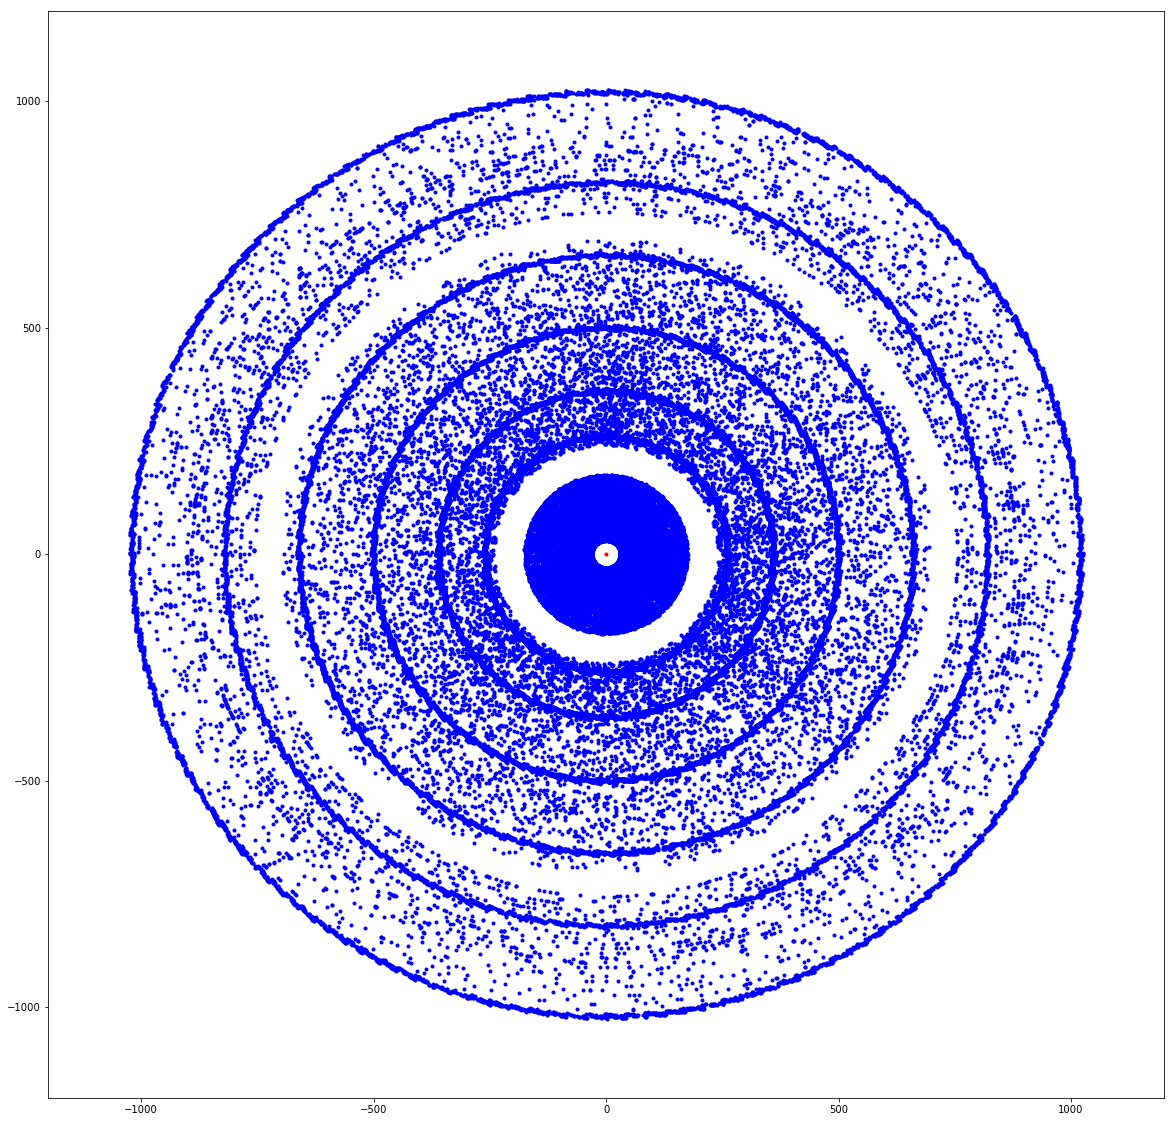

In [266]:
plt.figure(figsize = (20,20))
#plt.subplot(411)
plt.plot([i[1][0] for i in data], [i[1][1] for i in data], 'b.')
plt.plot([0], [0], 'r.')
for i in range(len(rotors)):
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.03
    #plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.axis([-1200,1200,-1200,1200])

In [267]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
#import hdbscan

class Clusterer(object):
    
    def __init__(self, eps):
        self.eps = eps
        
    
    def _preprocess(self, toScan):

        #ss = StandardScaler()
        #X = ss.fit_transform(toScan)
        X = toScan
        return X
    
    
    def scan(self, toScan):
        
        X = self._preprocess(toScan)
        
        #TODO: change min_samples (Determines how detailed the model is)
        #cl = hdbscan.HDBSCAN(min_cluster_size = 7, min_samples = 10)
        cl = DBSCAN(eps=self.eps, min_samples=2, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

clusterer = Clusterer(eps = 0.005)





  0%|          | 0/107830 [00:00<?, ?it/s]

<Figure size 2000x2000 with 0 Axes>

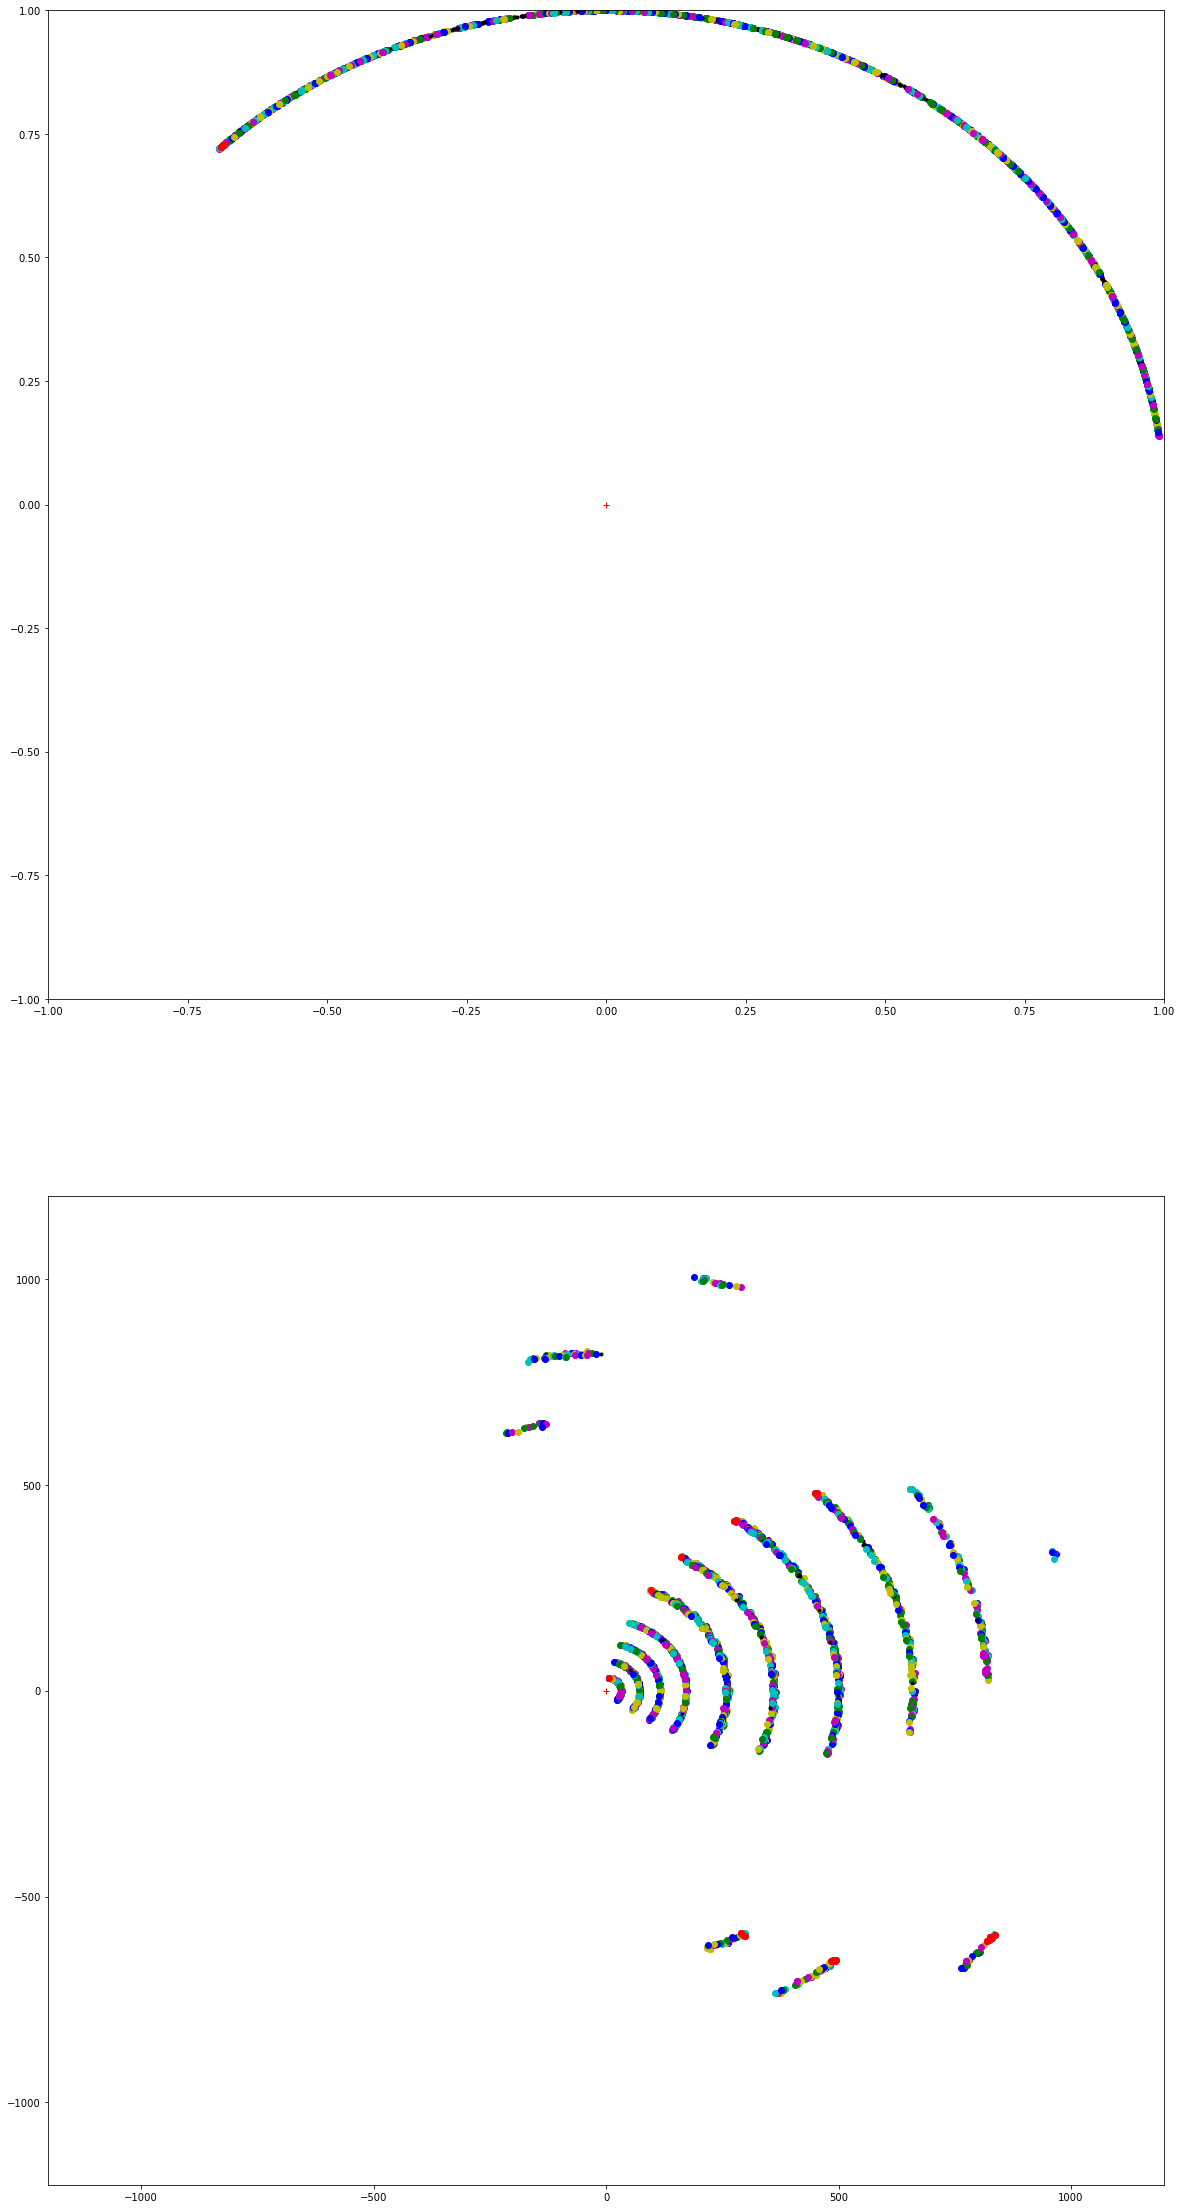





  0%|          | 1/107830 [00:16<484:29:10, 16.18s/it]



  0%|          | 2/107830 [00:16<245:59:50,  8.21s/it]



  0%|          | 3/107830 [00:16<166:34:47,  5.56s/it]



  0%|          | 4/107830 [00:16<126:48:53,  4.23s/it]



  0%|          | 5/107830 [00:17<103:50:18,  3.47s/it]



  0%|          | 6/107830 [00:17<88:15:08,  2.95s/it] 



  0%|          | 7/107830 [00:17<76:48:00,  2.56s/it]



  0%|          | 8/107830 [00:18<68:14:46,  2.28s/it]



  0%|          | 9/107830 [00:18<62:05:43,  2.07s/it]



  0%|          | 10/107830 [00:18<56:36:26,  1.89s/it]



  0%|          | 11/107830 [00:19<52:37:43,  1.76s/it]



  0%|          | 12/107830 [00:19<48:52:37,  1.63s/it]



  0%|          | 13/107830 [00:20<46:11:47,  1.54s/it]



  0%|          | 14/107830 [00:20<43:24:15,  1.45s/it]



  0%|          | 15/107830 [00:20<41:02:40,  1.37s/it]



  0%|          | 16/107830 [00:20<39:03:24,  1.30s/it]



  0%|          | 17/107830 [00:21<37:28:12,  1.25s/it]



  0%|        

KeyboardInterrupt: 

In [268]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from tqdm import tqdm


plt.figure(figsize = (20,20))

maxDist = math.sqrt(data[0][1][0]**2 + data[0][1][1]**2)

xyDistCache = [math.sqrt(i[1][0]**2 + i[1][1]**2) for i in data]
angleCache = [math.atan2(i[1][1], i[1][0]) for i in data]

zThreshold = 0.4
cutoff = 1.1

#TODO change to hits
visited = [False for i in range(len(data))]
unvisitedIndices = [i for i in range(len(data))]
clusters = [-1 for i in range(len(data))]

numClusters = 0
minBucket = 4

#print(len(data))
# change this to hits when submitting #TODO
for i in tqdm(range(len(data))):
    if visited[i]:
        continue
    toScan = []
    scanIndices = []
    
    xi, yi, zi = data[i][1]
    rix, riy, riz,rir = rotors[i]
    
    bearing = math.atan2(yi, xi)
    iDist = xyDistCache[i]
    # TODO
    #for j in range(len(data)):
    for j in unvisitedIndices:
        if visited[j]:
            continue
        #Old - replaced by bounding envelope
        '''
        if not (abs(angleCache[i] - angleCache[j]) < 1 or
                (((angleCache[i] > math.pi/2 and angleCache[j] < -math.pi/2) or
                  (angleCache[j] > math.pi/2 and angleCache[i] < -math.pi/2)) and
                 abs(abs(angleCache[i] - angleCache[j]) - 2*math.pi) < 1)):
            #if i == 0:
            #    print(angleCache[i], angleCache[j])
            #continue
            pass
        '''
        xj, yj, zj = data[j][1]
        rjx, rjy, rjz,rjr = rotors[j]

        if abs(rjz - riz) > zThreshold or abs(rir - rjr) > zThreshold or xi*xj + yi*yj < 0 or i == j:
            #if i == 0:
            #    print(abs(rjz - riz), abs(rir - rjr), xi*xj + yi*yj)
            continue

        jDist = xyDistCache[j]
        ijDist = math.sqrt((xj - xi)**2 + (yj - yi)**2)
        
        #Points which are very close, Bounding ellipse to remove circles extending far past i
        if abs(ijDist) < 0.0001 or (jDist + ijDist > math.sqrt(2)*iDist):
            continue
        
        cosSubAng = (jDist**2 + ijDist**2 - iDist**2)/(2 * jDist * ijDist)
        
        #Rare cases of floating point errors on very thin triangles
        if cosSubAng > 1:
            cosSubAng = 1
        if cosSubAng < -1:
            cosSubAng = -1
            
        subtendedAngle = math.acos(cosSubAng)

        jcloser = False
        if subtendedAngle > math.pi/2: #Means j lies closer to the origin (on the circle) than i
            jcloser = True
            subtendedAngle = math.pi - subtendedAngle

        if abs(subtendedAngle) < cutoff:
            crossProductSign = 1 if xi * yj - xj * yi > 0 else -1
            if jcloser:
                crossProductSign = -crossProductSign

            sugAngle = bearing + crossProductSign * subtendedAngle
            
            a = math.atan2(yi, xi)
            ra = sugAngle#math.atan2(math.sin(sugAngle), math.cos(sugAngle))
            #print(round(ra,3), round(a,3))

            if (yi * math.sin(sugAngle) > 0):
                centreAnglei = 2 * abs(ra) - 2 * abs(a)
            else:
                centreAnglei = 2*(2 * math.pi - abs(ra) - abs(a))

            while centreAnglei < -math.pi:
                centreAnglei += 2*math.pi
            while centreAnglei > math.pi:
                centreAnglei -= 2*math.pi

            centreAnglei = abs(centreAnglei)
            
            arcLengthi = 0
            if centreAnglei != 0:
                arcLengthi = xyDistCache[i] * centreAnglei / (2*math.sin(centreAnglei/2))
            else:
                arcLengthi = xyDistCache[i]
            
            ijAngle = math.atan2(yj-yi,xj-xi)
            sugAnglej = math.atan2(math.cos(sugAngle)*math.sin(2*ijAngle) - math.sin(sugAngle)*math.cos(2*ijAngle),
                                   math.cos(sugAngle)*math.cos(2*ijAngle) + math.sin(sugAngle)*math.sin(2*ijAngle))
            
            b = math.atan2(yj, xj)
            rb = math.atan2(math.sin(sugAnglej), math.cos(sugAnglej))
            #print(round(ra,3), round(a,3))

            if (yj * math.sin(sugAnglej) > 0):
                centreAnglej = 2 * abs(rb) - 2 * abs(b)
            else:
                centreAnglej = 2*(2 * math.pi - abs(rb) - abs(b))

            while centreAnglej < -math.pi:
                centreAnglej += 2*math.pi
            while centreAnglej > math.pi:
                centreAnglej -= 2*math.pi

            centreAnglej = abs(centreAnglej)
            
            arcLengthj = 0
            if centreAnglej != 0:
                arcLengthj = xyDistCache[j] * centreAnglej / (2*math.sin(centreAnglej/2))
            else:
                arcLengthj = xyDistCache[j]
            
            #if i == 1:
                #print(j, ijDist, xyDistCache[i])
                #print(zi/arcLengthi, '\t', (round(xj,3), round(yj,3), round(zj,3)), round(arcLengthj,3), '\t', zj/arcLengthj)

            toScan.append((math.sin(sugAngle), math.cos(sugAngle), rjz, rjr))
            scanIndices.append(j)
        #elif i == 0:
        #    print('Unlucky', subtendedAngle)
    #if i == 0:
    #    print(len(toScan))
    nBuckets = 1500
    buckets = [0 for q in range(nBuckets)]
    bucketScores = [0 for q in range(nBuckets)]
    for f in range(len(toScan)):
        x,y,z,r = toScan[f]
        index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
        score = 0.5 + (math.sqrt(data[scanIndices[f]][1][0]**2 + data[scanIndices[f]][1][1]**2))/maxDist
        buckets[index] += 1
        bucketScores[index] += score
        buckets[index - 1] += 1
        bucketScores[index - 1] += score
    
    mainTrack = bucketScores.index(max(bucketScores)) if max(bucketScores) > minBucket else None
    
    if mainTrack:
        for f in range(len(toScan)):
            x,y,z,r = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            if index == mainTrack or index == mainTrack+1:
                visited[scanIndices[f]] = True
                unvisitedIndices.remove(scanIndices[f])
                clusters[data[scanIndices[f]][0]] = numClusters

        visited[i] = True
        clusters[i] = numClusters
        unvisitedIndices.remove(i)

        numClusters += 1
    
    if i == 0:
        plt.figure(figsize = (20,40))
        plt.subplot(2,1,1)
        #plt.plot([x for x,y,z in toScan], [y for x,y,z in toScan], 'k.')
        colours = ['b', 'g', 'c', 'm', 'y', 'k']
        c = 0
        for f in range(len(toScan)):
            x,y,z,r = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            if buckets[index] >= 7 or buckets[index-1] >= 7:
                plt.plot([toScan[f][0]], [toScan[f][1]], colours[int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))%5] + 'o')
            else:
                plt.plot([toScan[f][0]], [toScan[f][1]], 'k.')
            c += 1
        for f in range(len(toScan)):
            x,y,z,r = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            if mainTrack and (index == mainTrack or index == mainTrack+1):
                #print("!!!")
                plt.plot([toScan[f][0]], [toScan[f][1]], 'ro')
        plt.plot([0], [0], 'r+')
        plt.axis([-1,1,-1,1])
        plt.subplot(2,1,2)
        #plt.plot([data[m][0] for m in scanIndices], [data[m][1] for m in scanIndices], 'k.')
        colours = ['b', 'g', 'c', 'm', 'y', 'k']
        c = 0
        for f in range(len(toScan)):
            x,y,z,r = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            if buckets[index] >= 7 or buckets[index-1] >= 7:
                plt.plot([data[scanIndices[f]][1][0]], [data[scanIndices[f]][1][1]], colours[int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))%5] + 'o')
            else:
                plt.plot([data[scanIndices[f]][1][0]], [data[scanIndices[f]][1][1]], 'k.')
            c += 1
        for f in range(len(toScan)):
            x,y,z,r = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            #print(index)
            if mainTrack and (index == mainTrack or index == mainTrack+1):
                plt.plot([data[scanIndices[f]][1][0]], [data[scanIndices[f]][1][1]], 'ro')
        plt.plot([data[i][1][0]], [data[i][1][1]], 'r+')
        plt.plot([0], [0], 'r+')
        plt.axis([-1200,1200,-1200,1200])
        plt.show()
    
    #old code:
    '''
    groups = clusterer.scan(toScan)
    groups = list(groups)
    #print(scanIndices)
    #print(groups)
    bestGroup = 0
    for k in range(max(groups)+1):
        if groups.count(k) > bestGroup:
            bestGroup = k
    
    group = [i]
    for j in range(len(groups)):
        if groups[j] == bestGroup:
            group.append(scanIndices[j])
            #visited[scanIndices[j]] = True
    clusters.append(group)
    
    iClusters = []
    for group in range(max(groups) + 1):
        cluster = []
        for hit in range(len(groups)):
            if groups[hit] == group:
                cluster.append(scanIndices[hit])
        iClusters.append(cluster)
    
    plt.figure(figsize = (20,40))
    plt.subplot(2,1,1)
    #plt.plot([x for x,y,z in toScan], [y for x,y,z in toScan], 'k.')
    colours = ['b', 'g', 'c', 'm', 'y', 'k']
    c = 0
    for f in range(len(toScan)):
        plt.plot([toScan[f][0]], [toScan[f][1]], colours[groups[f]%5] + '.')
        c += 1
    plt.plot([0], [0], 'r.')
    plt.axis([-1,1,-1,1])
    plt.subplot(2,1,2)
    #plt.plot([data[m][0] for m in scanIndices], [data[m][1] for m in scanIndices], 'k.')
    colours = ['b', 'g', 'c', 'm', 'y', 'k']
    c = 0
    for f in range(len(toScan)):
        plt.plot([data[scanIndices[f]][0]], [data[scanIndices[f]][1]], colours[groups[f]%5] + '.')
        c += 1
    plt.plot([data[i][0]], [data[i][1]], 'r.')
    plt.plot([0], [0], 'r.')
    plt.axis([-1200,1200,-1200,1200])
    plt.show()

    #print(iClusters)
    
    #clusters[i] = iClusters
    '''
print('re-sorting...')
data.sort(key = lambda pt: pt[0])
print('plotting result...')
plt.figure(figsize = (15,15))
colours = ['b', 'g', 'c', 'm', 'y', 'k']
shapes = ['o', '^', 'v', 's', 'p', 'P', 'x', 'd', '*', 'h', 'D']
for i in tqdm(range(len(data))):
    if clusters[i] != -1:
        plt.plot(data[i][1][0],
                 data[i][1][1],
                 'C' + str(clusters[i]%10) + shapes[clusters[i]%11])
    else:
        plt.plot(data[i][1][0],
                 data[i][1][1],
                 'k.')
plt.plot([0], [0], 'r.')
plt.axis([-1200,1200,-1200,1200])



In [84]:
def create_one_event_submission(event_id, hits, labels):
    sub_data = np.column_stack(([event_id]*len(hits), hits.hit_id.values, labels))
    submission = pd.DataFrame(data=sub_data, columns=["event_id", "hit_id", "track_id"]).astype(int)
    return submission

In [85]:
submission = create_one_event_submission(0, hits, clusters)
score = score_event(truth, submission)

In [86]:
print("Your score: ", score)

Your score:  0.214669182754


In [239]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import random

#Generates example helix

R=500 #Helix Radius

w=2*math.pi/3 #length of arc

v=0000 # velocity in Z

theta0=0.5 # angle at the origin

D=0 #D=500 - Use for helixes far from the origin

z0=0 #z0=200 - Z shifting


data = []

for i in range(50):
    t = random.uniform(0,1)
    
    X=-R*math.sin(w*t+theta0)+(R-D)*math.sin(theta0)

    Y=-R*math.cos(w*t+theta0)+(R-D)*math.cos(theta0)

    Z=z0+v*t
    
    data.append((X,Y,Z))
data.append((-1000,500,0))

data = list(enumerate(data))

#TOOD update data
data.sort(key = lambda pt: -math.sqrt(pt[1][0]**2 + pt[1][1]**2))